### General code

In [1]:
# import the models
from cobra.io import load_json_model
ecoli = load_json_model("../ecoli.json")
pf = load_json_model("../pf.json")
# print(ecoli.optimize())
# print(pf.optimize())
    
# load peripheral packages
import warnings
warnings.filterwarnings(action='once')
from pandas import set_option
set_option("display.max_rows", None)
from time import process_time

# Define the standard graphs from each simulation
graphs_list = [
    {
        'trial':'G48',
        "phenotype": '*',
        'content': 'biomass',
        'experimental_data': False
    },
    {
        'trial':'G48',
        'content': "conc",
    },
    {
        'trial':'G48',
        "phenotype": '*',
        "species":["ecoli"],
        'content': 'biomass'
    },
    {
        'trial':'G48',
        'content': 'total_biomass',
        'experimental_data': True
    }
]

def update_graphs(trial, conc):
    graphs = graphs_list.copy()
    for graph in graphs:
        graph["trial"] = trial
    return graphs

#### Maltose & 4HB conditions

In [2]:
species_abundances = {
    1:{"ecoli":0, "pf":1},
    2:{"ecoli":1, "pf":50},
    3:{"ecoli":1, "pf":20},
    4:{"ecoli":1, "pf":10},
    5:{"ecoli":1, "pf":3},
    6:{"ecoli":1, "pf":1},
    7:{"ecoli":3, "pf":1},
    8:{"ecoli":10, "pf":1},
    9:{"ecoli":20, "pf":1},
    10:{"ecoli":1, "pf":0},
    11:{"ecoli":0, "pf":0}
}
carbon_conc_series = {'rows': {
    'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
    'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
}}
species_identities_rows = {
    1:{"ecoli":"mRuby"},
    2:{"ecoli":"ACS"},
    3:{"ecoli":"mRuby"},
    4:{"ecoli":"ACS"},
    5:{"ecoli":"mRuby"},
    6:{"ecoli":"ACS"}
}

# Maltose

#### coculture

In [3]:
%run ../data/standardized_data/datastandardization.py
growth_data_path="../data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
time1 = process_time()
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, trial_name_conversion, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    community_members = {
        ecoli: {
            'name': 'ecoli', 
            'phenotypes': {
                'acetate': {"consumed":["cpd00029"]}, #kbase_api.get_from_ws('93465/13/1'), 
                'malt': {"consumed":["cpd00179"],
                         "excreted":["cpd00029"]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
                }
        },
        pf: {
            'name': 'pf',
            'phenotypes': {
                'acetate': {"consumed":["cpd00029"]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                '4HB': {"consumed":["cpd00136"]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
                }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
    species_abundances = species_abundances,
    carbon_conc_series = carbon_conc_series,
    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,4,6,7,8,9,10,11,12]},
    species_identities_rows = species_identities_rows
)
print(f"{(process_time()-time1)/60} minutes")

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:112: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


The model GCF_001612705.1.RAST.mdl is unable to be simulated with pFBA and yields a < None (infeasible). > error.
The ['B2', 'B3', 'B4', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The [141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166] timesteps (with [1.25743282 1.25756953 1.25646515 1.25160708 1.25131364 1.24656429
 1.23908944 1.24441001 1.24179058 1.23174872 1.2387953  1.23445973
 1.2314147  1.23049743 1.23039501 1.2257134  1.23015943 1.22885549
 1.23300364 1.28941374 1.36072636 1.3427020

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:79: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


Done with concentrations and biomass loops: 0.0015625 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0026041666666666665 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.08072916666666667 min
Done exporting the content: 0.012760416666666666 min
graph_0
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'acetate', 'malt', 'stationary', '4HB'},
 'species': ['pf', 'ecoli'],
 'trial': 'G4'}
graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00179'],
 'trial': 'G4'}
graph_2
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'acetate', 'malt', 'stationary'},
 'species': ['ecoli'],
 'trial': 'G4'}
graph_3
{'content': 'total_biomass',
 'experimental_data': True,
 'species': ['pf', 'ecoli'],
 'trial': 'G4'}


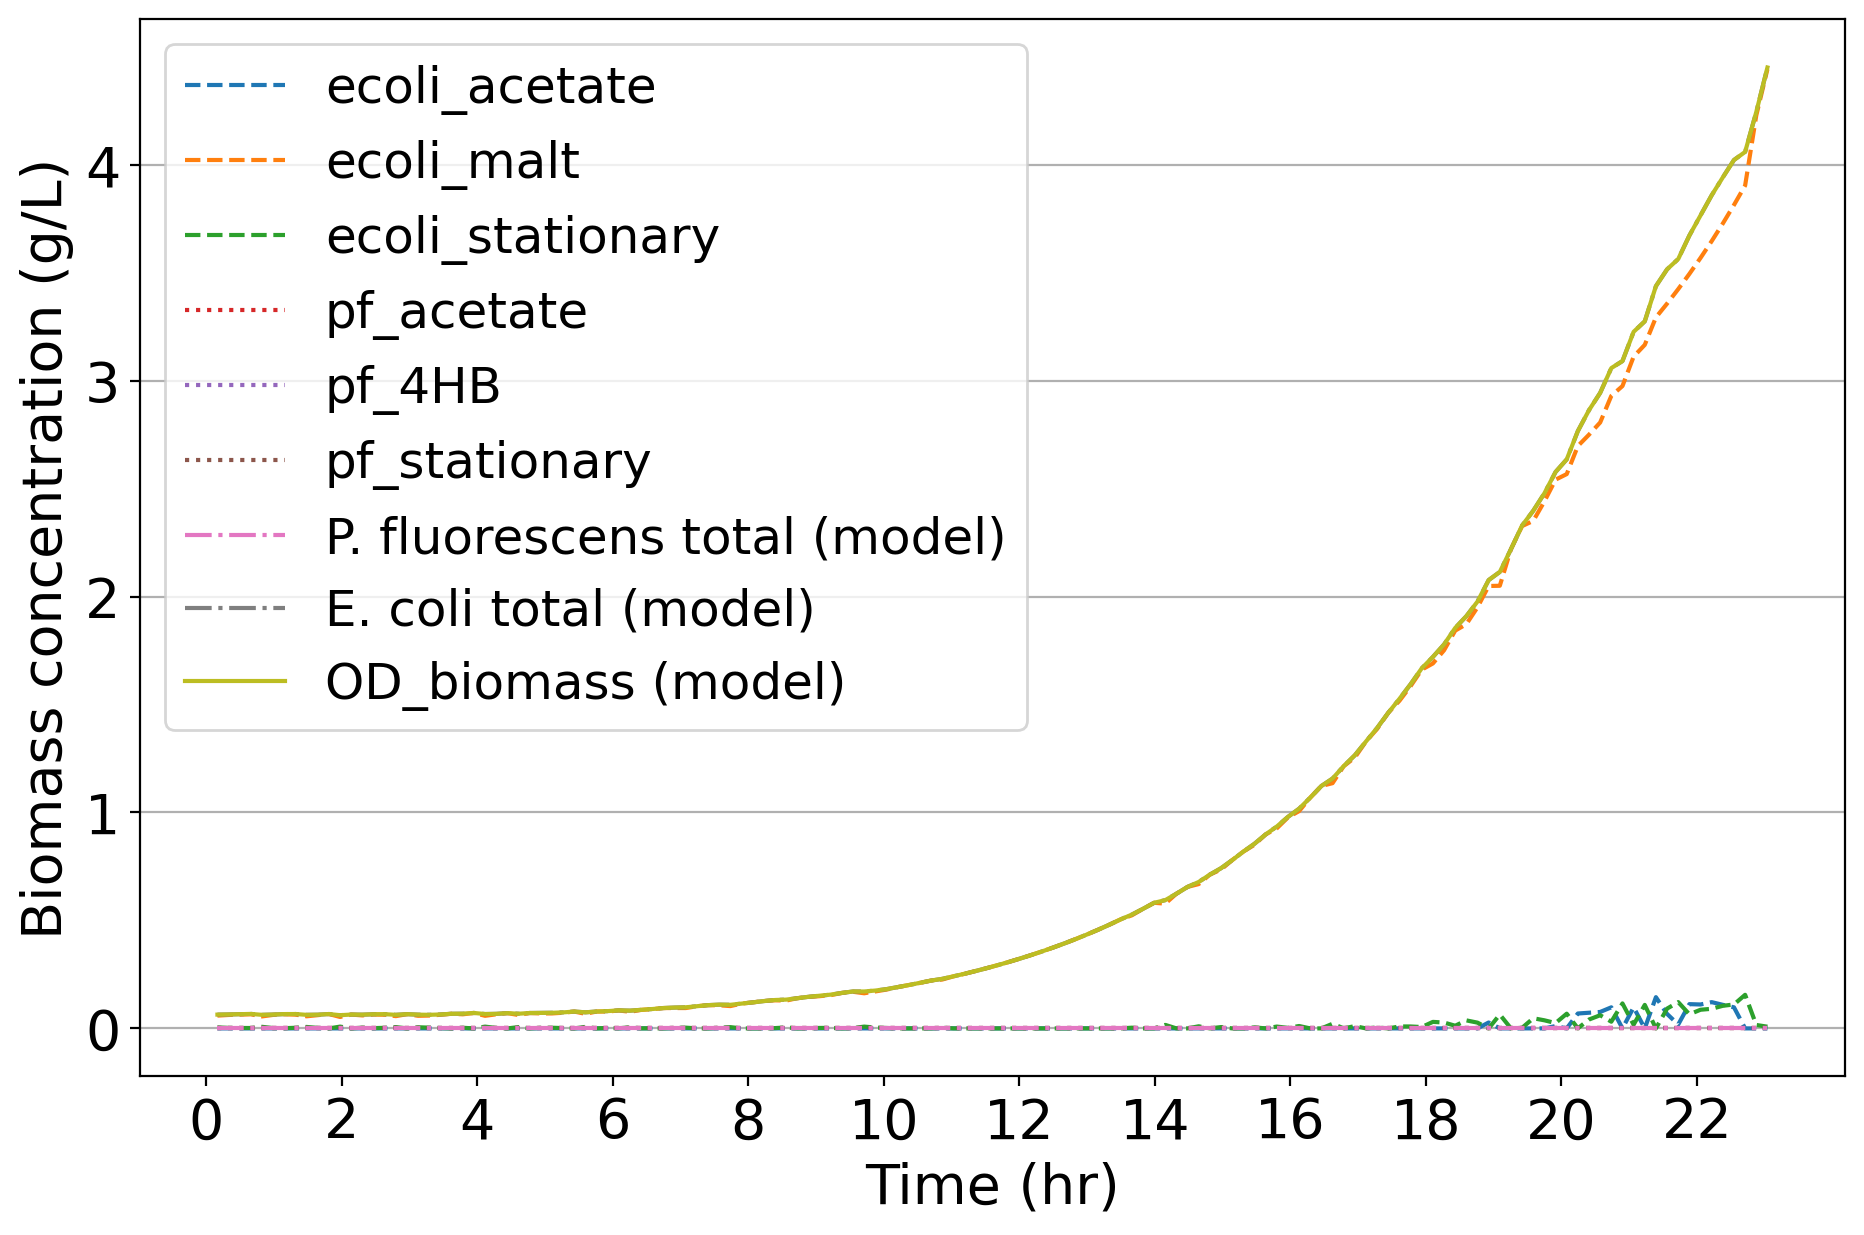

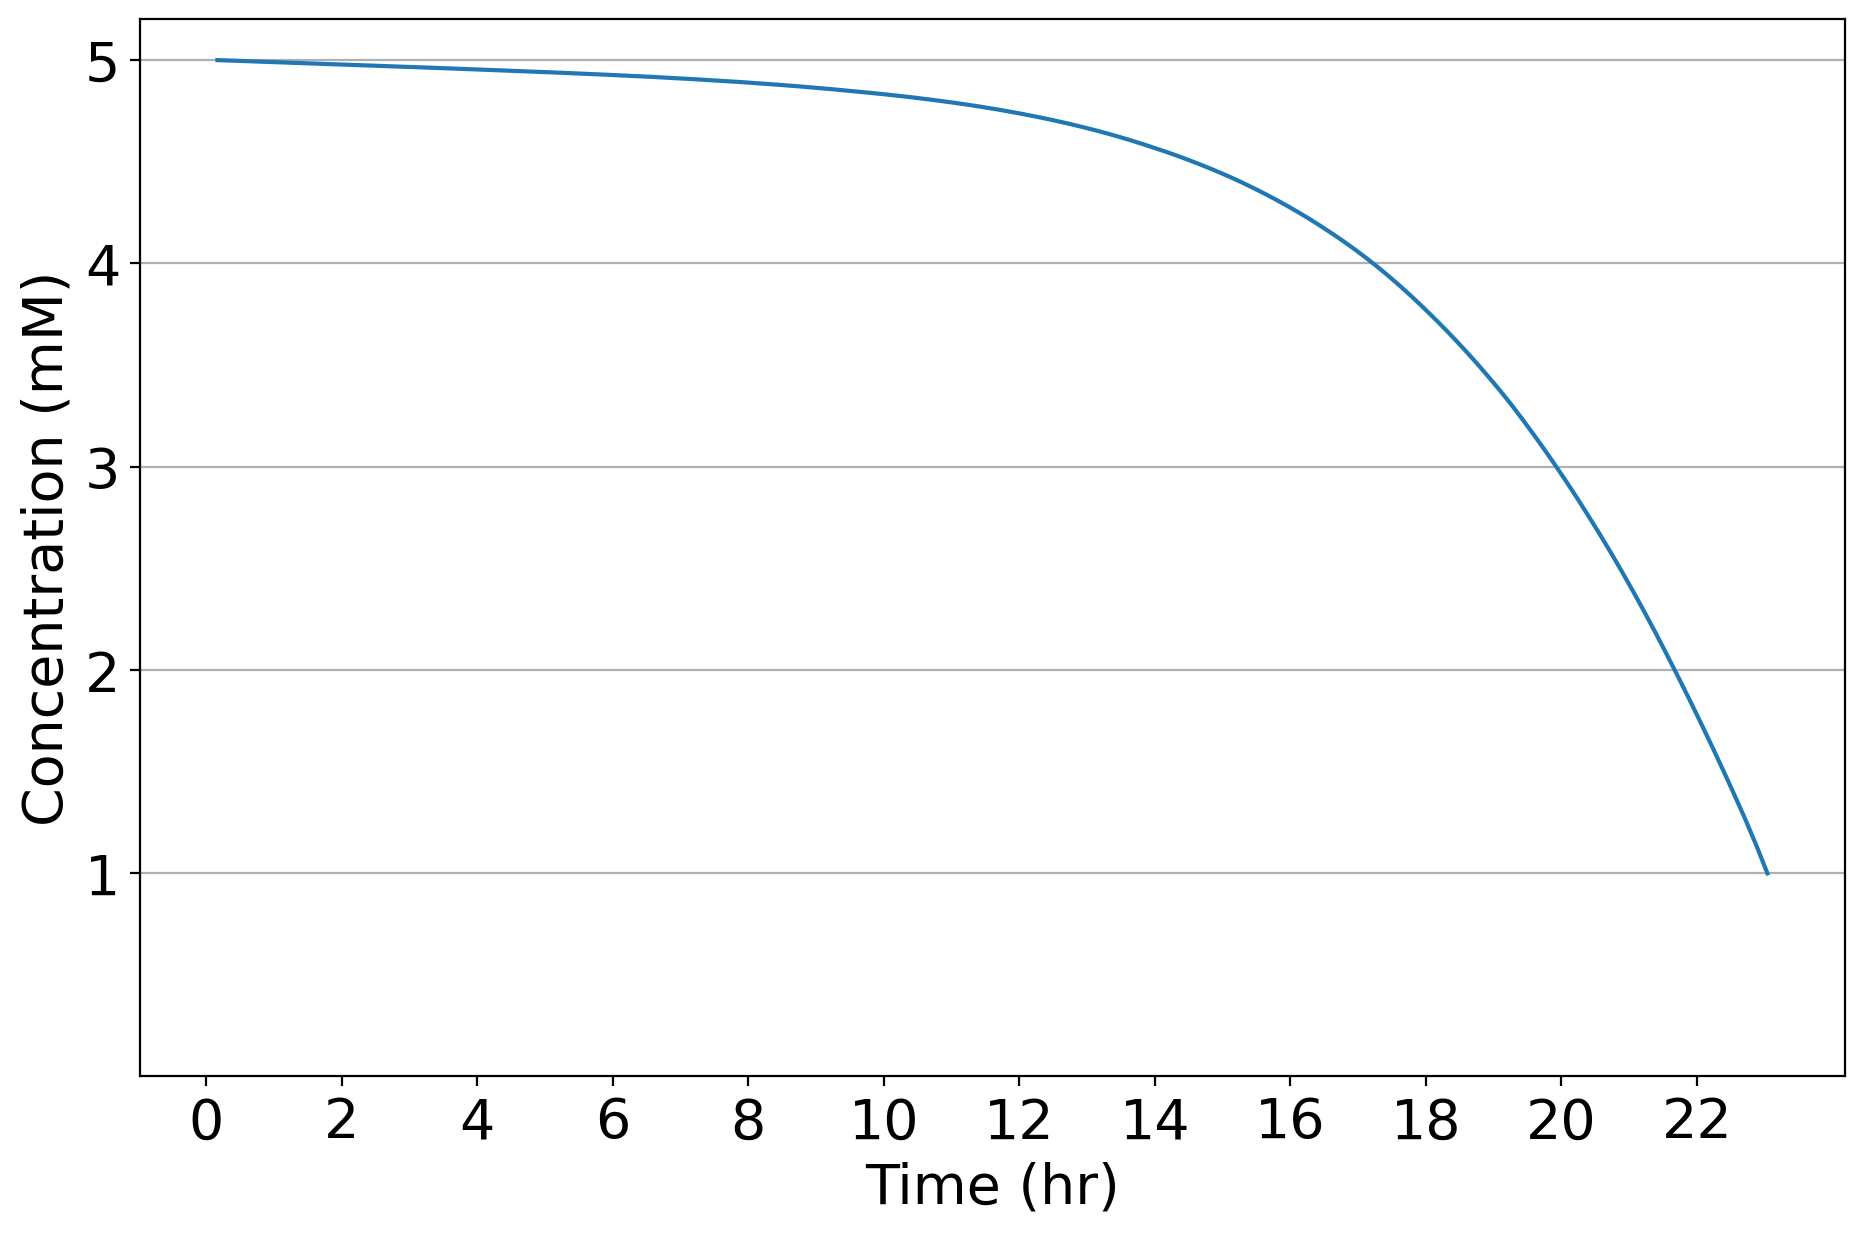

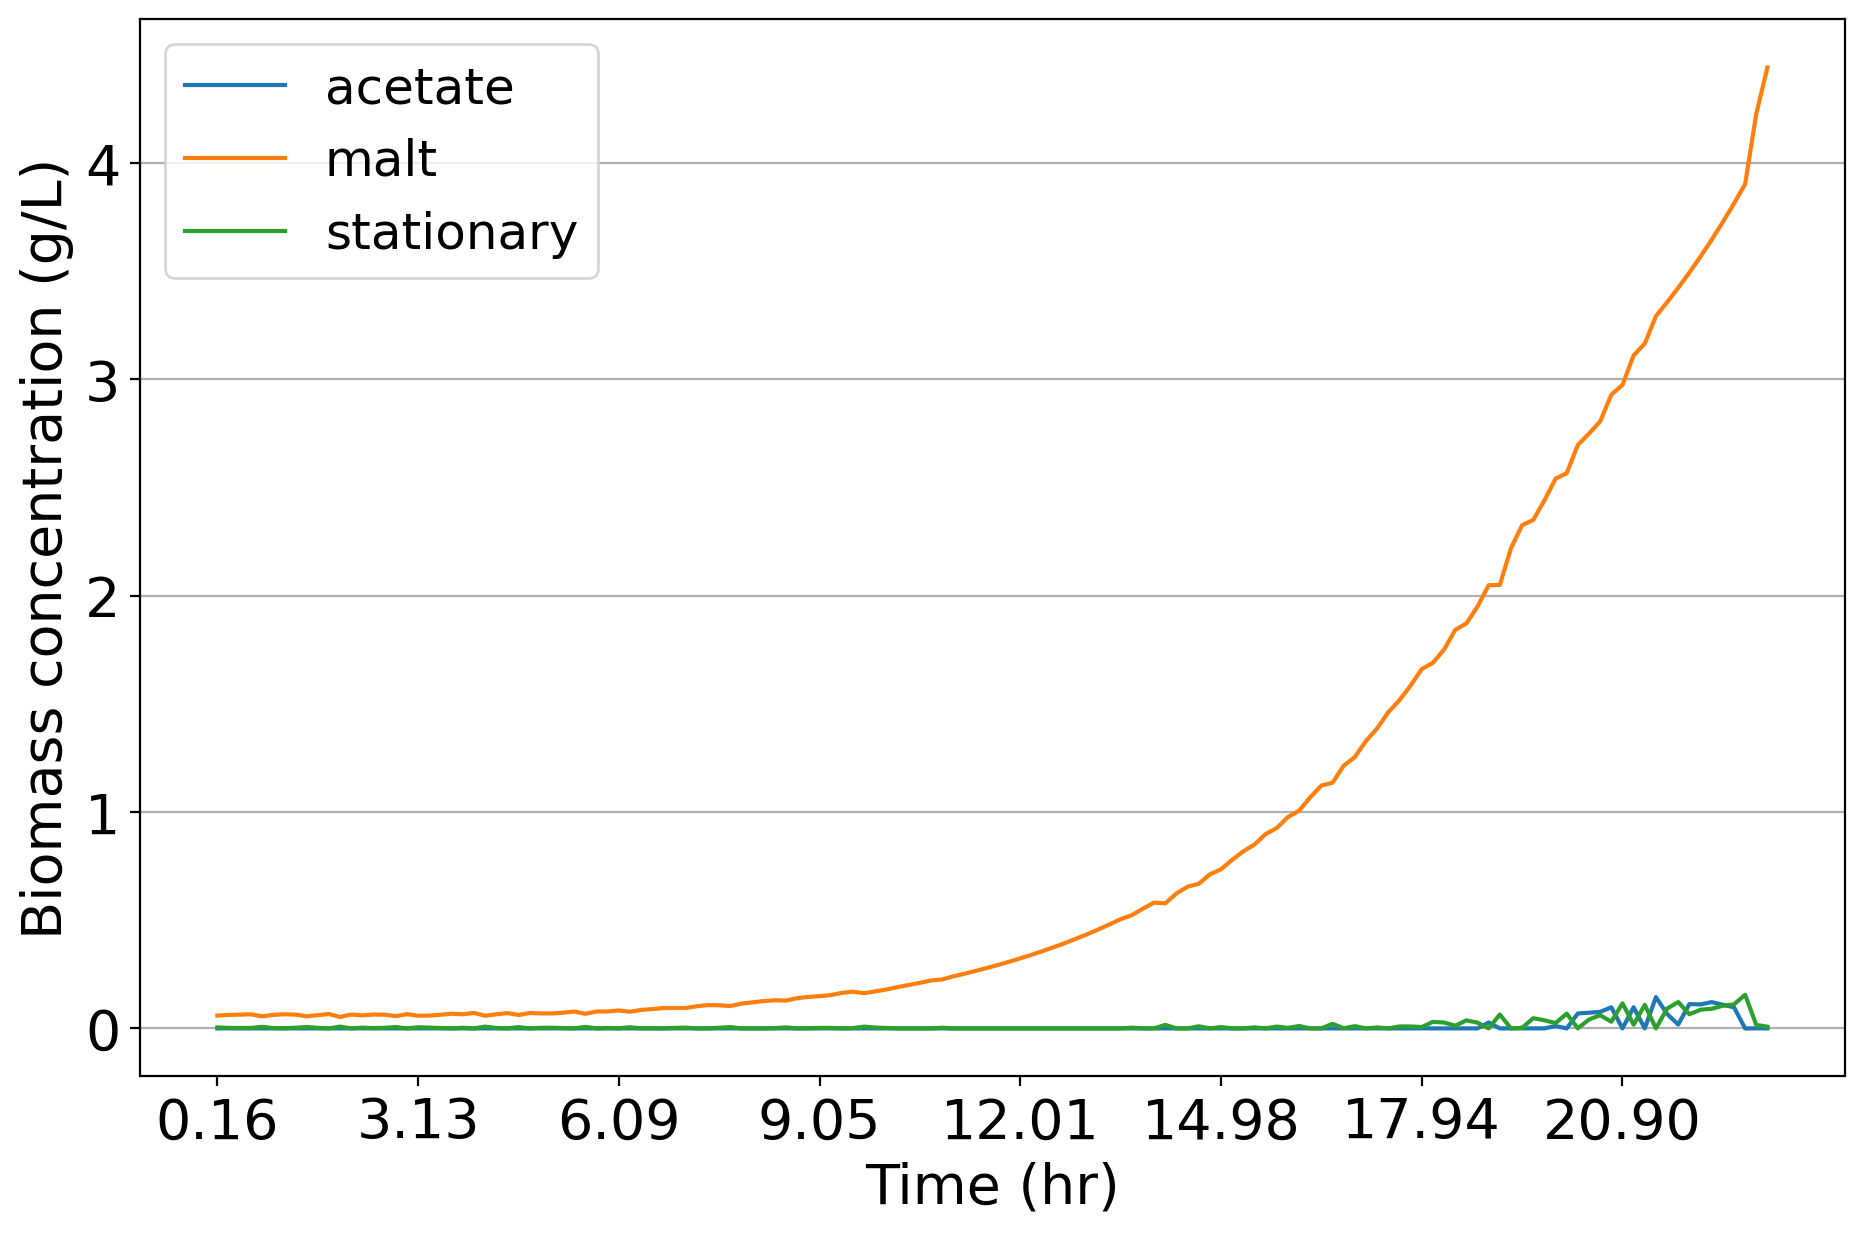

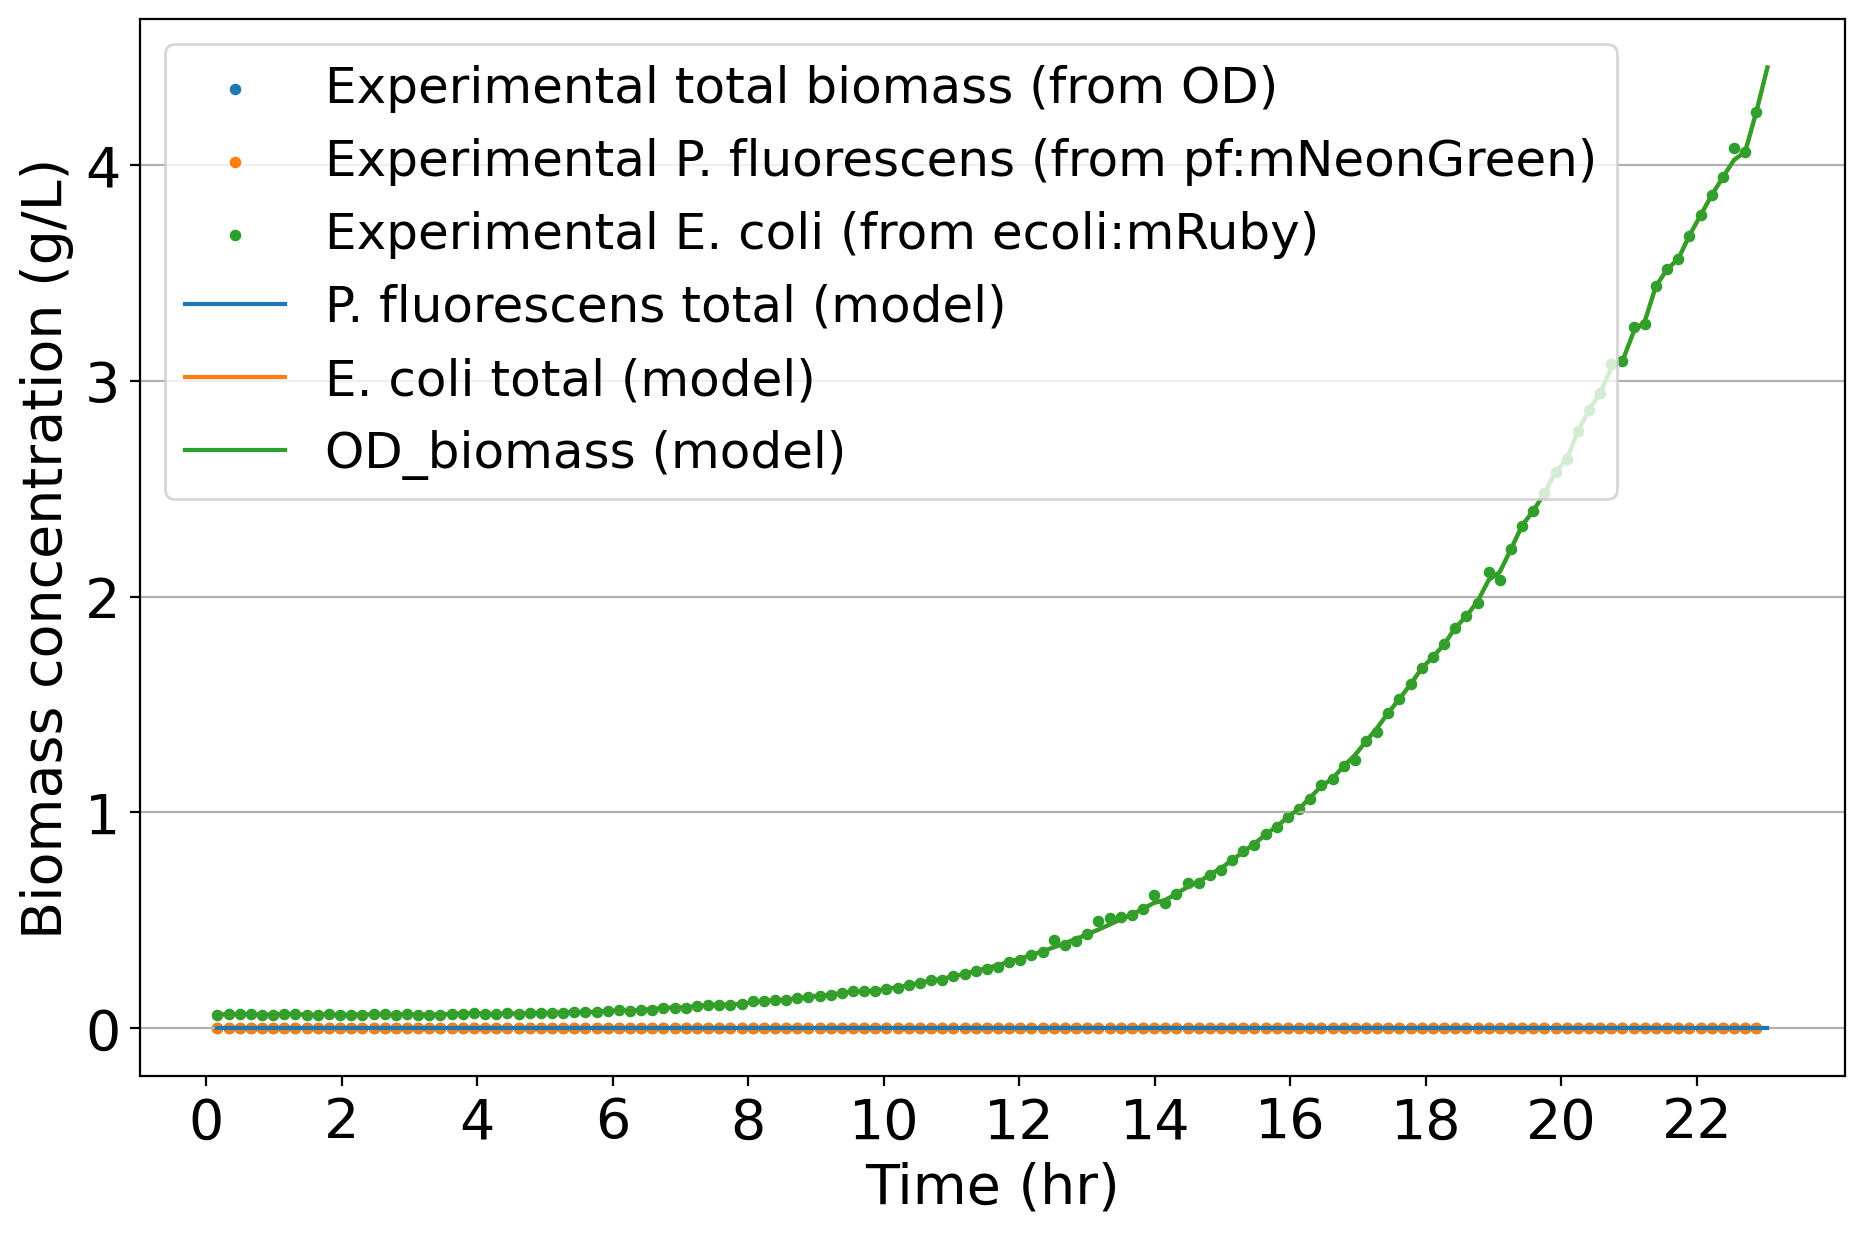

In [4]:
%run ../mscommfitting.py

maltose_co = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, growth_df, experimental_metadata)
maltose_co.fit(
    parameters={
        'v':.3,
        'cvmin': .1,
        'bcv': 0.0001,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00179","cpd00029"],
     rel_final_conc = {"cpd00179":0.2},
     zero_start=["cpd00029"],
    abs_final_conc={"cpd00029":0.5}, # metabolomics data
       graphs = update_graphs("G4", None), 
    msdb_path='../../../../ModelSEED/ModelSEEDDatabase',
    publishing=True,
    export_lp="maltose_coculture.lp")

#### Pseudomonas

In [5]:
%run ../data/standardized_data/datastandardization.py
growth_data_path="../data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
time1 = process_time()
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, trial_name_conversion, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    community_members = {
        pf: {
            'name': 'pf',
            'phenotypes': {
                'acetate': {"consumed":["cpd00029"]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                '4HB': {"consumed":["cpd00136"]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
                }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mNeonGreen':'pf'},
    species_abundances = species_abundances,
    carbon_conc_series = carbon_conc_series,
    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,3,4,5,6,7,8,9,10,11,12]},
    species_identities_rows = species_identities_rows,
    significant_deviation=None
)
print(f"{(process_time()-time1)/60} minutes")

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:112: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


The model GCF_001612705.1.RAST.mdl is unable to be simulated with pFBA and yields a < None (infeasible). > error.
The ['B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The ['B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G1

In [6]:
%run ../mscommfitting.py

maltose_4HB_commfit = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, growth_df, experimental_metadata)
try:
    maltose_4HB_commfit.fit(
        parameters={
            'v':.3,
            'cvmin': .1,
            'bcv': 0.0001,
            'diffpos': 100,
            'diffneg': 100
            }, 
         mets_to_track = ["cpd00179","cpd00029"],
         rel_final_conc = {"cpd00179":0.2},
         zero_start=["cpd00029"],
        abs_final_conc={"cpd00029":0.5}, # metabolomics data
           graphs = update_graphs("G1", None), 
        msdb_path='../../../../ModelSEED/ModelSEEDDatabase',
        publishing=True,
        export_lp="maltose_pf.lp")
except (NoFluxError) as e:
    print(e)

Done with concentrations and biomass loops: 0.0005208333333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0013020833333333333 min


C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:79: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.05911458333333333 min
Done exporting the content: 0.0078125 min
The simulation lacks any flux.


#### E. coli

In [7]:
%run ../data/standardized_data/datastandardization.py
growth_data_path="../data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
time1 = process_time()
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, trial_name_conversion, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    community_members = {
        ecoli: {
            'name': 'ecoli', 
            'phenotypes': {
                'acetate': {"consumed":["cpd00029"]}, #kbase_api.get_from_ws('93465/13/1'), 
                'malt': {"consumed":["cpd00179"],
                         "excreted":["cpd00029"]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
            }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mRuby':'ecoli'},
    species_abundances = species_abundances,
    carbon_conc_series = carbon_conc_series,
    ignore_trials = {'rows': ['C', 'D', 'E', 'F', 'G'], 'columns': [1,2,3,4,5,6,7,8,9,10,12]},
    species_identities_rows = species_identities_rows
)
print(f"{(process_time()-time1)/60} minutes")

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:112: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


The ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The [81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166] timesteps (with [1.11135657 1.11403494 1.10087516 1.1021111  1.14037094 1.13783236
 1.10900805

Done with concentrations and biomass loops: 0.00026041666666666666 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.00026041666666666666 min


C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:79: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.023697916666666666 min
Done exporting the content: 0.00390625 min
graph_0
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'acetate', 'malt', 'stationary', '4HB'},
 'species': ['pf', 'ecoli'],
 'trial': 'G10'}
graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00179'],
 'trial': 'G10'}
graph_2
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'acetate', 'malt', 'stationary'},
 'species': ['ecoli'],
 'trial': 'G10'}
graph_3
{'content': 'total_biomass',
 'experimental_data': True,
 'species': ['pf', 'ecoli'],
 'trial': 'G10'}


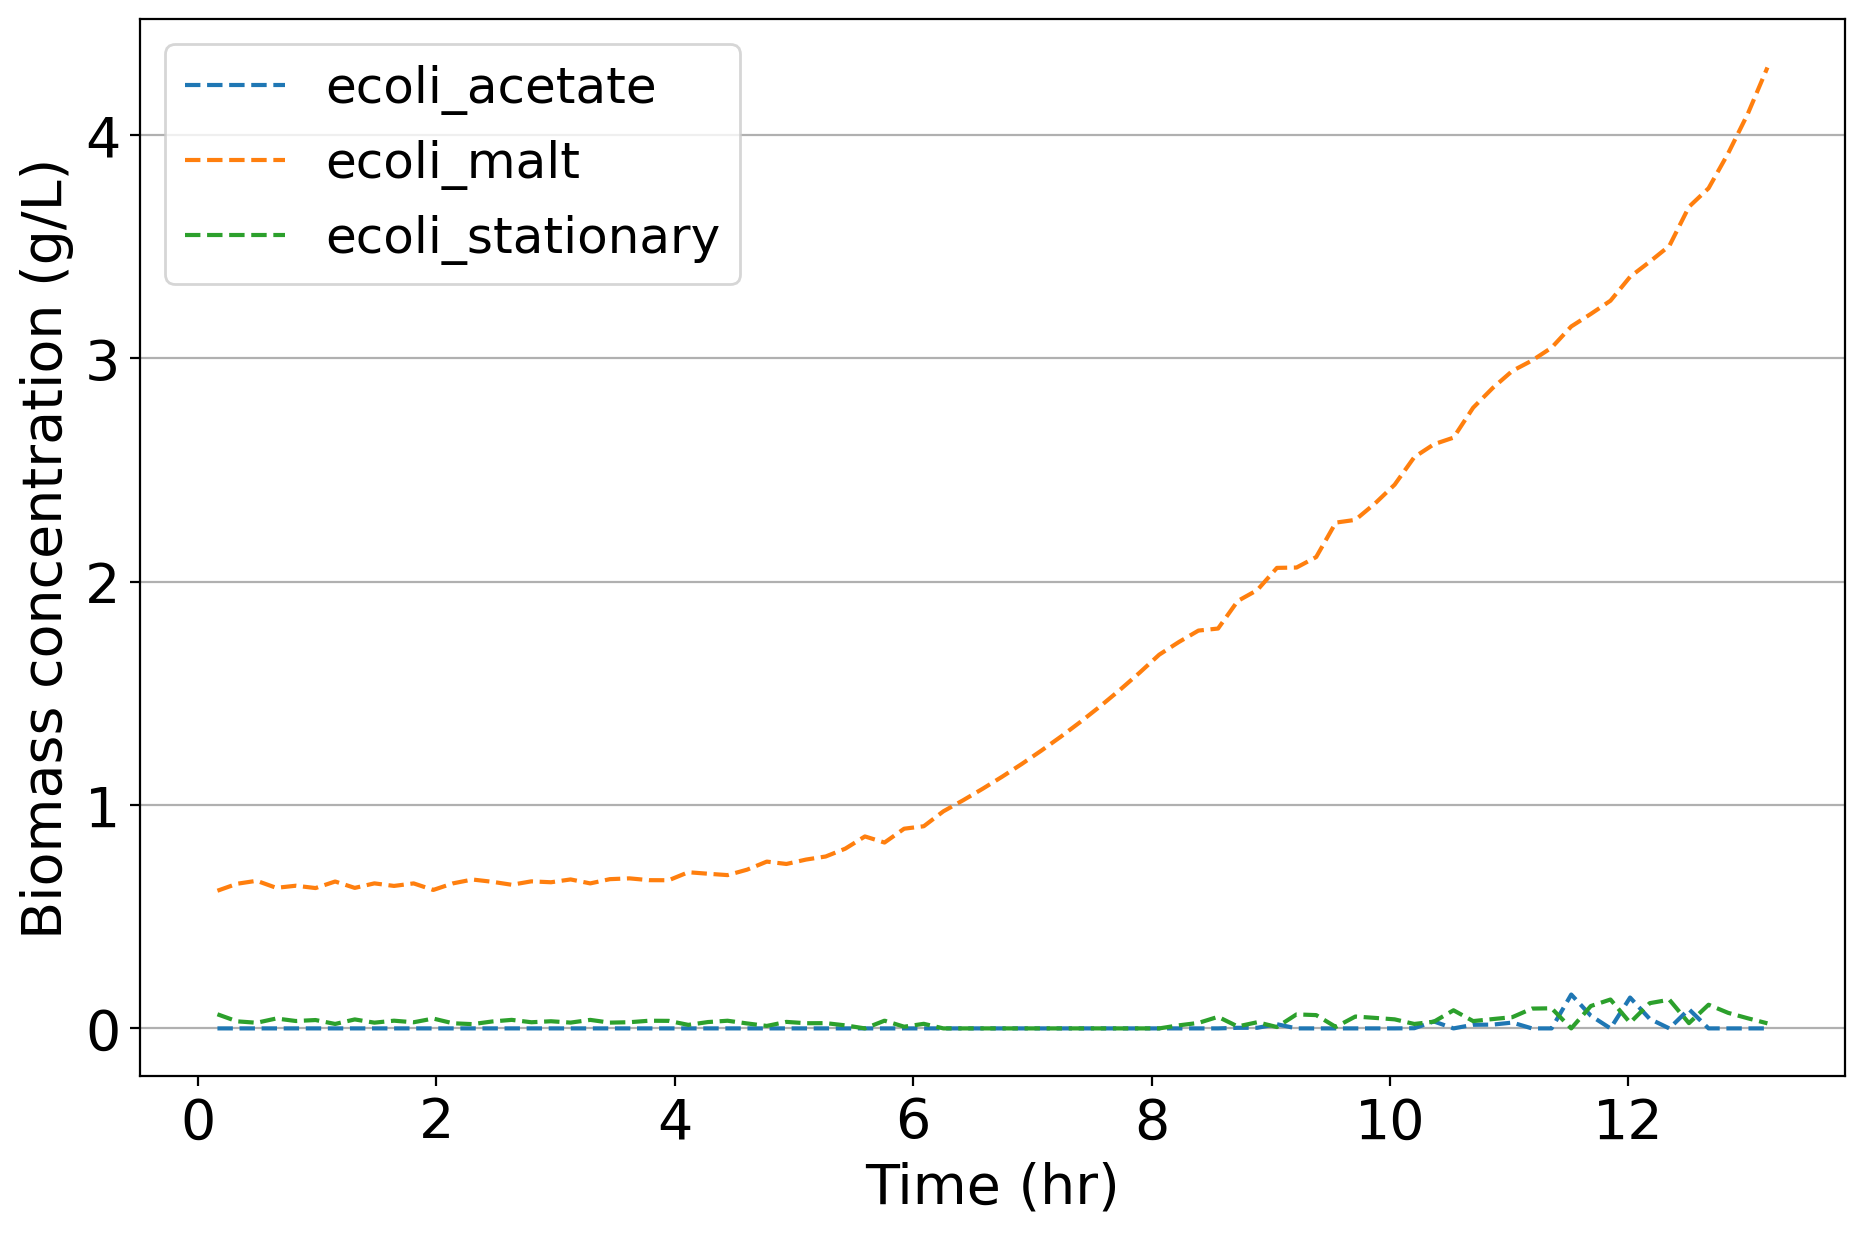

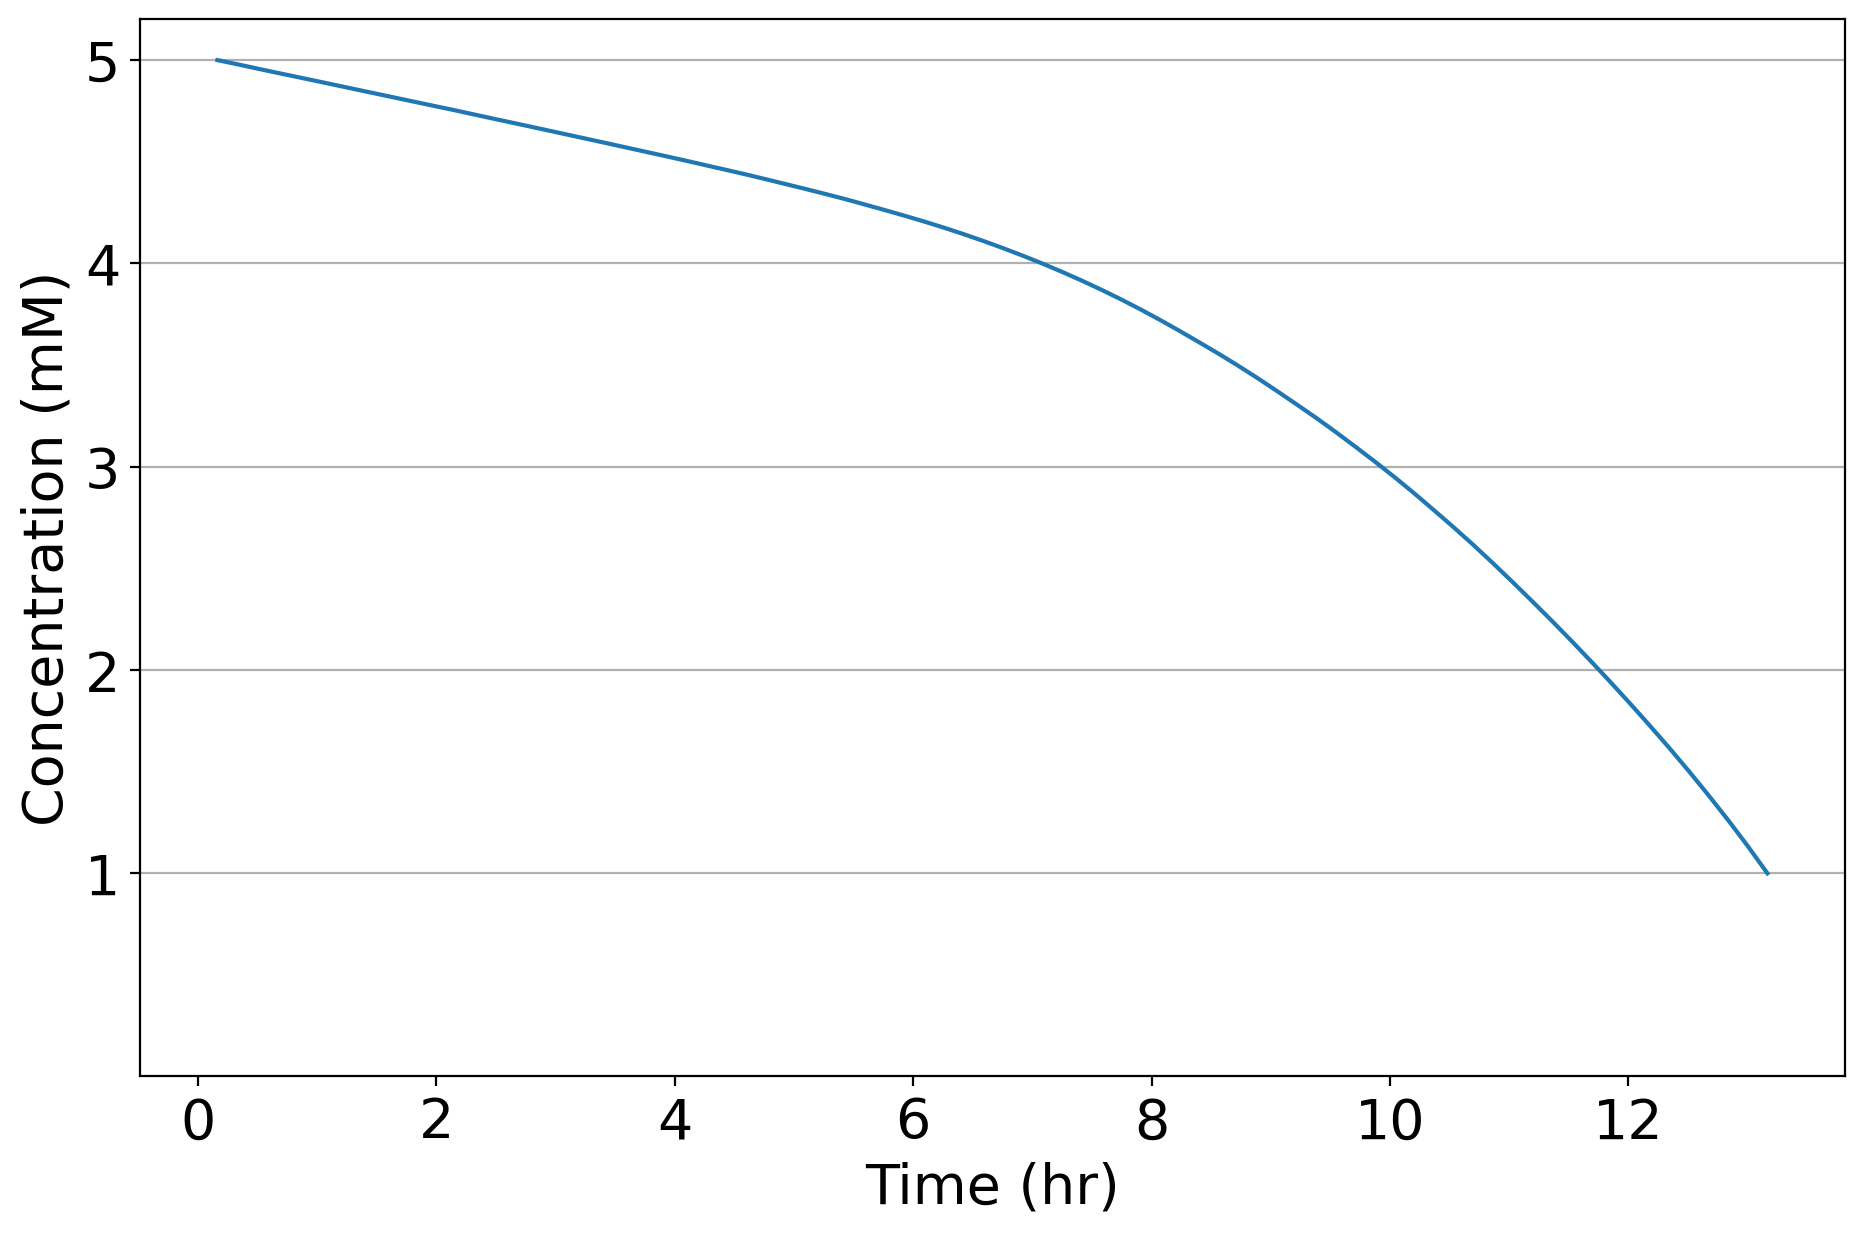

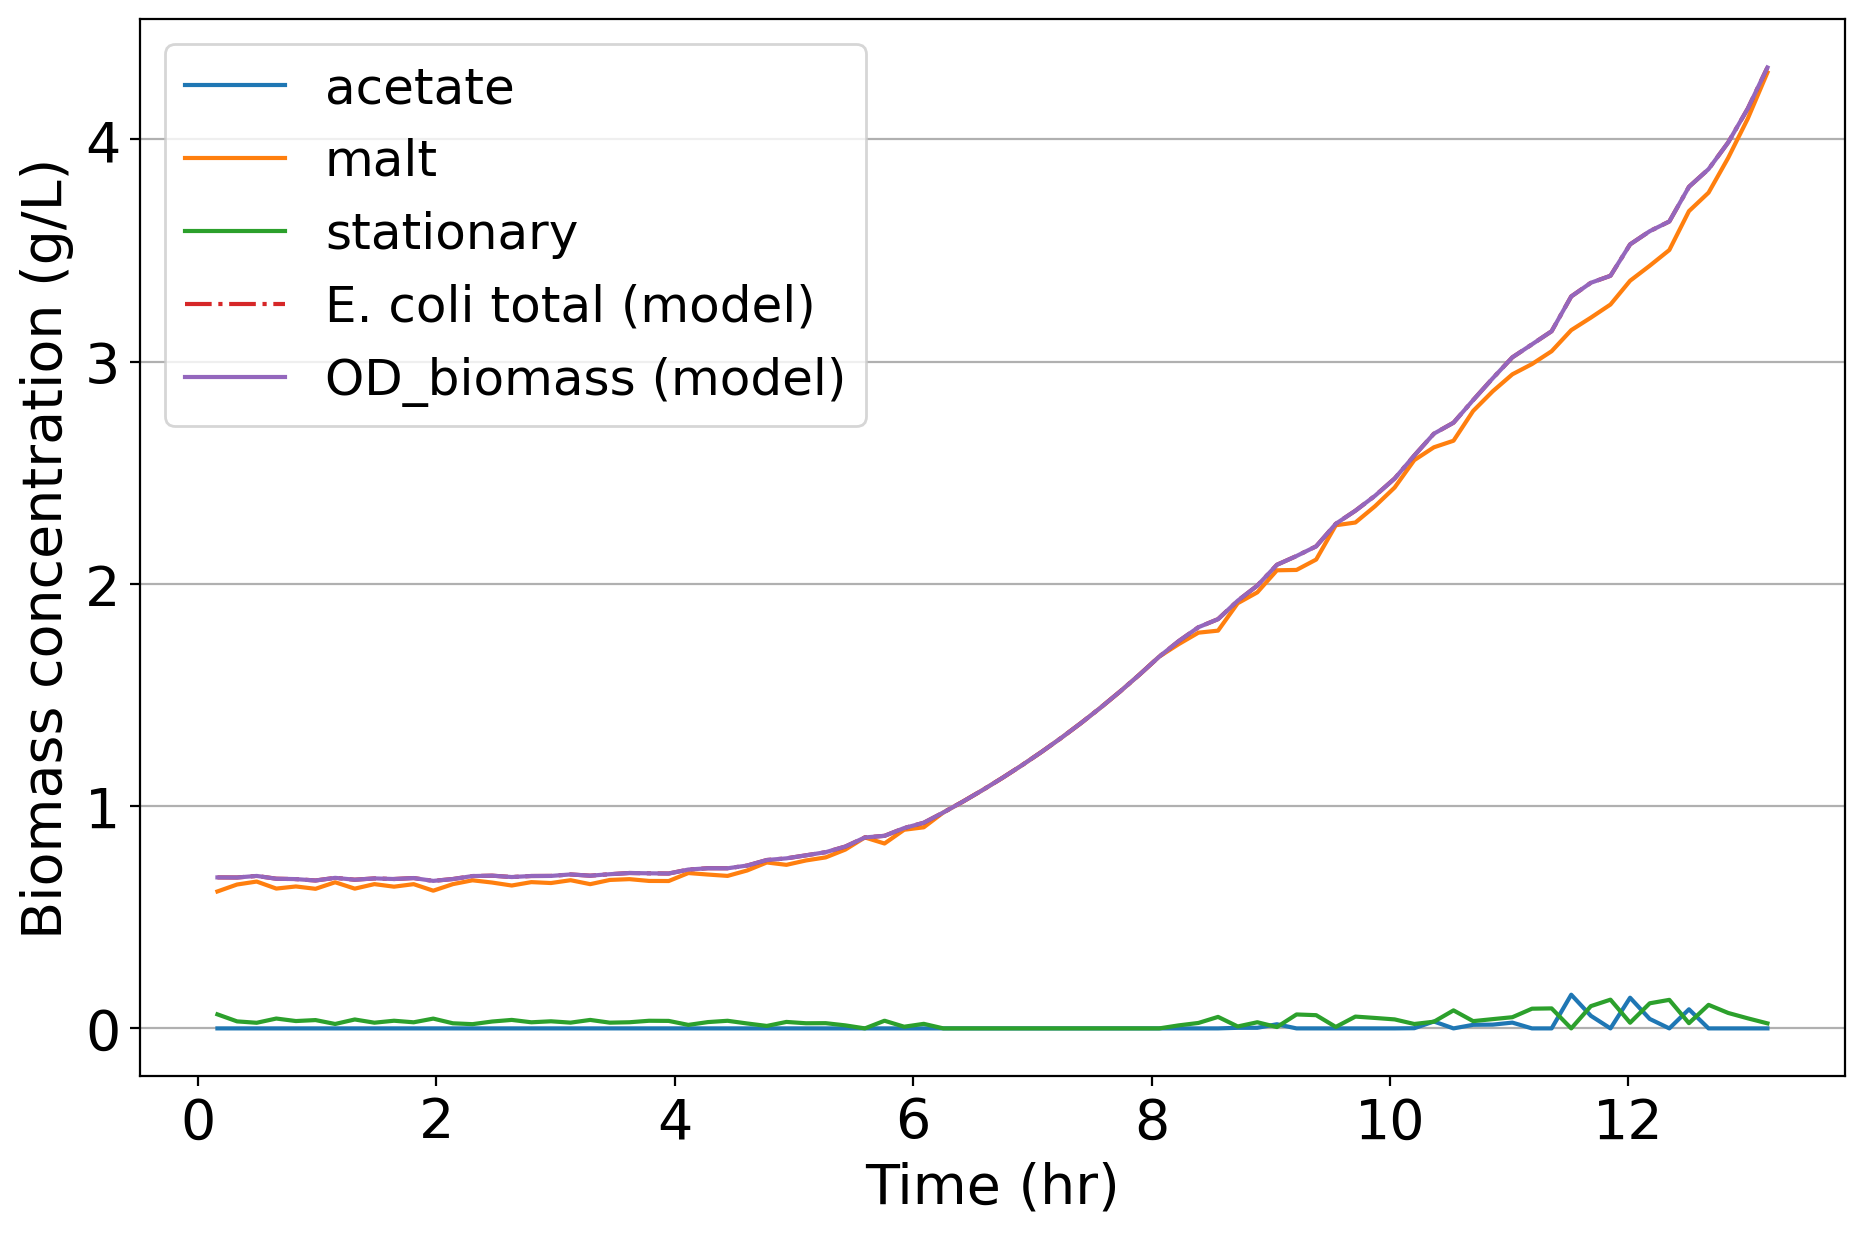

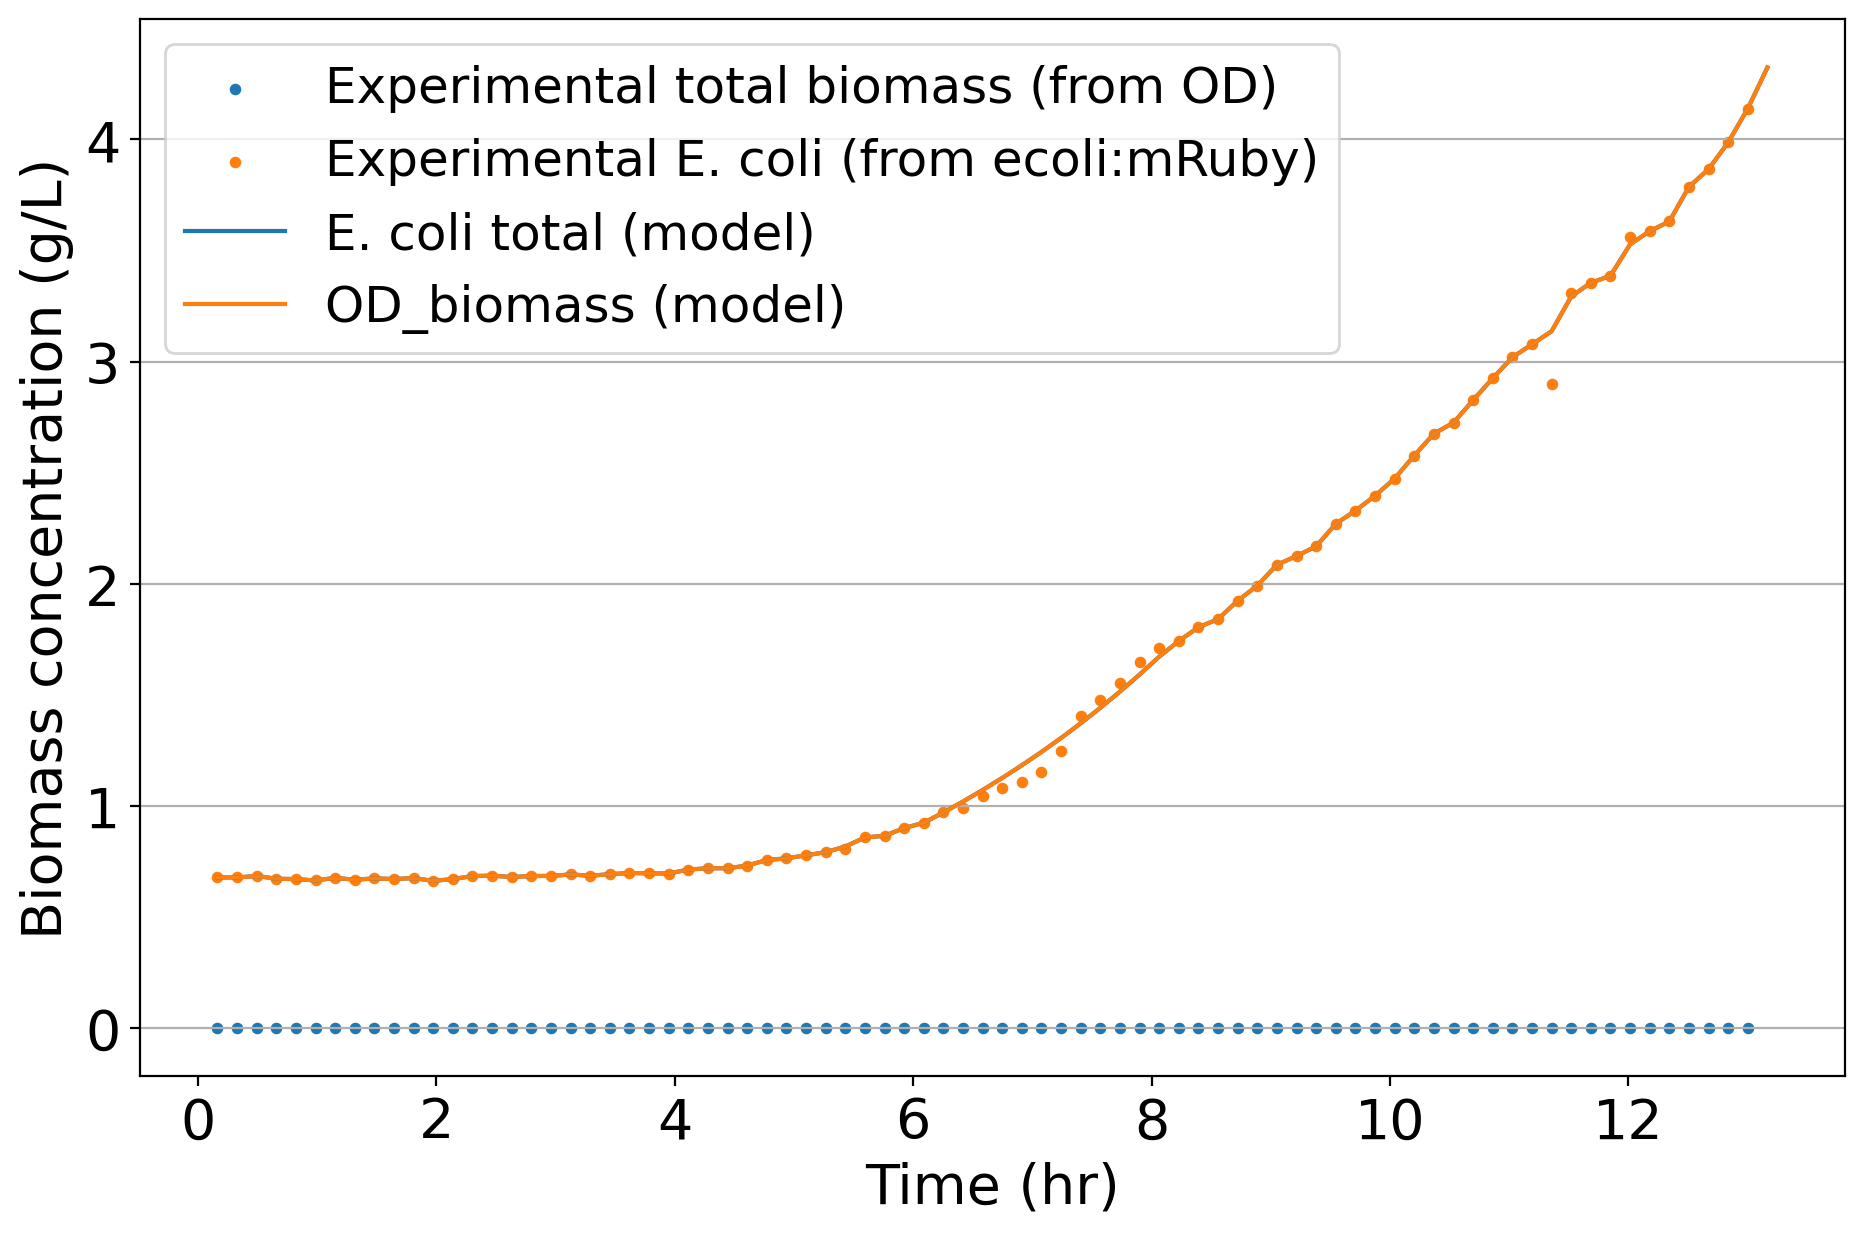

In [8]:
%run ../mscommfitting.py

maltose_4HB_commfit = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, growth_df, experimental_metadata)
maltose_4HB_commfit.fit(
    parameters={
        'v':.3,
        'cvmin': .1,
        'bcv': 0.0001,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00179","cpd00029"],
     rel_final_conc = {"cpd00179":0.2},
     zero_start=["cpd00029"],
    abs_final_conc={"cpd00029":0.5}, # metabolomics data
       graphs = update_graphs("G10", None), 
    msdb_path='../../../../ModelSEED/ModelSEEDDatabase',
    publishing=True,
    export_lp="maltose_ecoli.lp")

# Maltose + 4HB

#### Coculture

In [9]:
%run ../data/standardized_data/datastandardization.py
growth_data_path="../data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
time1 = process_time()
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, trial_name_conversion, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    community_members = {
        ecoli: {
            'name': 'ecoli', 
            'phenotypes': {
                'acetate': {"consumed":["cpd00029"]}, #kbase_api.get_from_ws('93465/13/1'), 
                'malt': {"consumed":["cpd00179"],
                         "excreted":["cpd00029"]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
                }
        },
        pf: {
            'name': 'pf',
            'phenotypes': {
                'acetate': {"consumed":["cpd00029"]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                '4HB': {"consumed":["cpd00136"]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
                }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mNeonGreen':'pf', 'mRuby':'ecoli'},
    species_abundances = species_abundances,
    carbon_conc_series = carbon_conc_series,
    ignore_trials = {'rows': ['C', 'D', 'E', 'B', 'G'], 'columns': [1,2,3,4,6,7,8,9,10,11,12]},
    species_identities_rows = species_identities_rows
)
print(f"{(process_time()-time1)/60} minutes")

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:112: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


The model GCF_001612705.1.RAST.mdl is unable to be simulated with pFBA and yields a < None (infeasible). > error.
The ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The [126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166] timesteps (with [1.29390945 1.29168894 1.29108779 1.28948634 1.28672094 1.28586984
 1.28528969 1.28971436 1.28630483 1.2871134  1.28394065 1.28340311
 1.28816919 1.2845139  1.28026211 1

In [10]:
trial_name_conversion

{'B': {'2': ('G1', 'r1_pf-5_ecoli'),
  '3': ('G2', 'r1_ecoli_mRuby-r50_pf-5_ecoli'),
  '4': ('G3', 'r1_ecoli_mRuby-r20_pf-5_ecoli'),
  '5': ('G4', 'r1_ecoli_mRuby-r10_pf-5_ecoli'),
  '6': ('G5', 'r1_ecoli_mRuby-r3_pf-5_ecoli'),
  '7': ('G6', 'r1_ecoli_mRuby-r1_pf-5_ecoli'),
  '8': ('G7', 'r3_ecoli_mRuby-r1_pf-5_ecoli'),
  '9': ('G8', 'r10_ecoli_mRuby-r1_pf-5_ecoli'),
  '10': ('G9', 'r20_ecoli_mRuby-r1_pf-5_ecoli'),
  '11': ('G10', 'r1_ecoli_mRuby-5_ecoli'),
  '12': ('G11', '5_ecoli')},
 'C': {'2': ('G12', 'r1_pf-5_ecoli'),
  '3': ('G13', 'r1_ecoli_ACS-r50_pf-5_ecoli'),
  '4': ('G14', 'r1_ecoli_ACS-r20_pf-5_ecoli'),
  '5': ('G15', 'r1_ecoli_ACS-r10_pf-5_ecoli'),
  '6': ('G16', 'r1_ecoli_ACS-r3_pf-5_ecoli'),
  '7': ('G17', 'r1_ecoli_ACS-r1_pf-5_ecoli'),
  '8': ('G18', 'r3_ecoli_ACS-r1_pf-5_ecoli'),
  '9': ('G19', 'r10_ecoli_ACS-r1_pf-5_ecoli'),
  '10': ('G20', 'r20_ecoli_ACS-r1_pf-5_ecoli'),
  '11': ('G21', 'r1_ecoli_ACS-5_ecoli'),
  '12': ('G22', '5_ecoli')},
 'D': {'2': ('G23', 'r1_pf-

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:79: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


Done with concentrations and biomass loops: 0.0013020833333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.00234375 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06536458333333334 min
Done exporting the content: 0.01171875 min
graph_0
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'acetate', 'malt', 'stationary', '4HB'},
 'species': ['pf', 'ecoli'],
 'trial': 'G48'}
graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00179'],
 'trial': 'G48'}
graph_2
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'acetate', 'malt', 'stationary'},
 'species': ['ecoli'],
 'trial': 'G48'}
graph_3
{'content': 'total_biomass',
 'experimental_data': True,
 'species': ['pf', 'ecoli'],
 'trial': 'G48'}


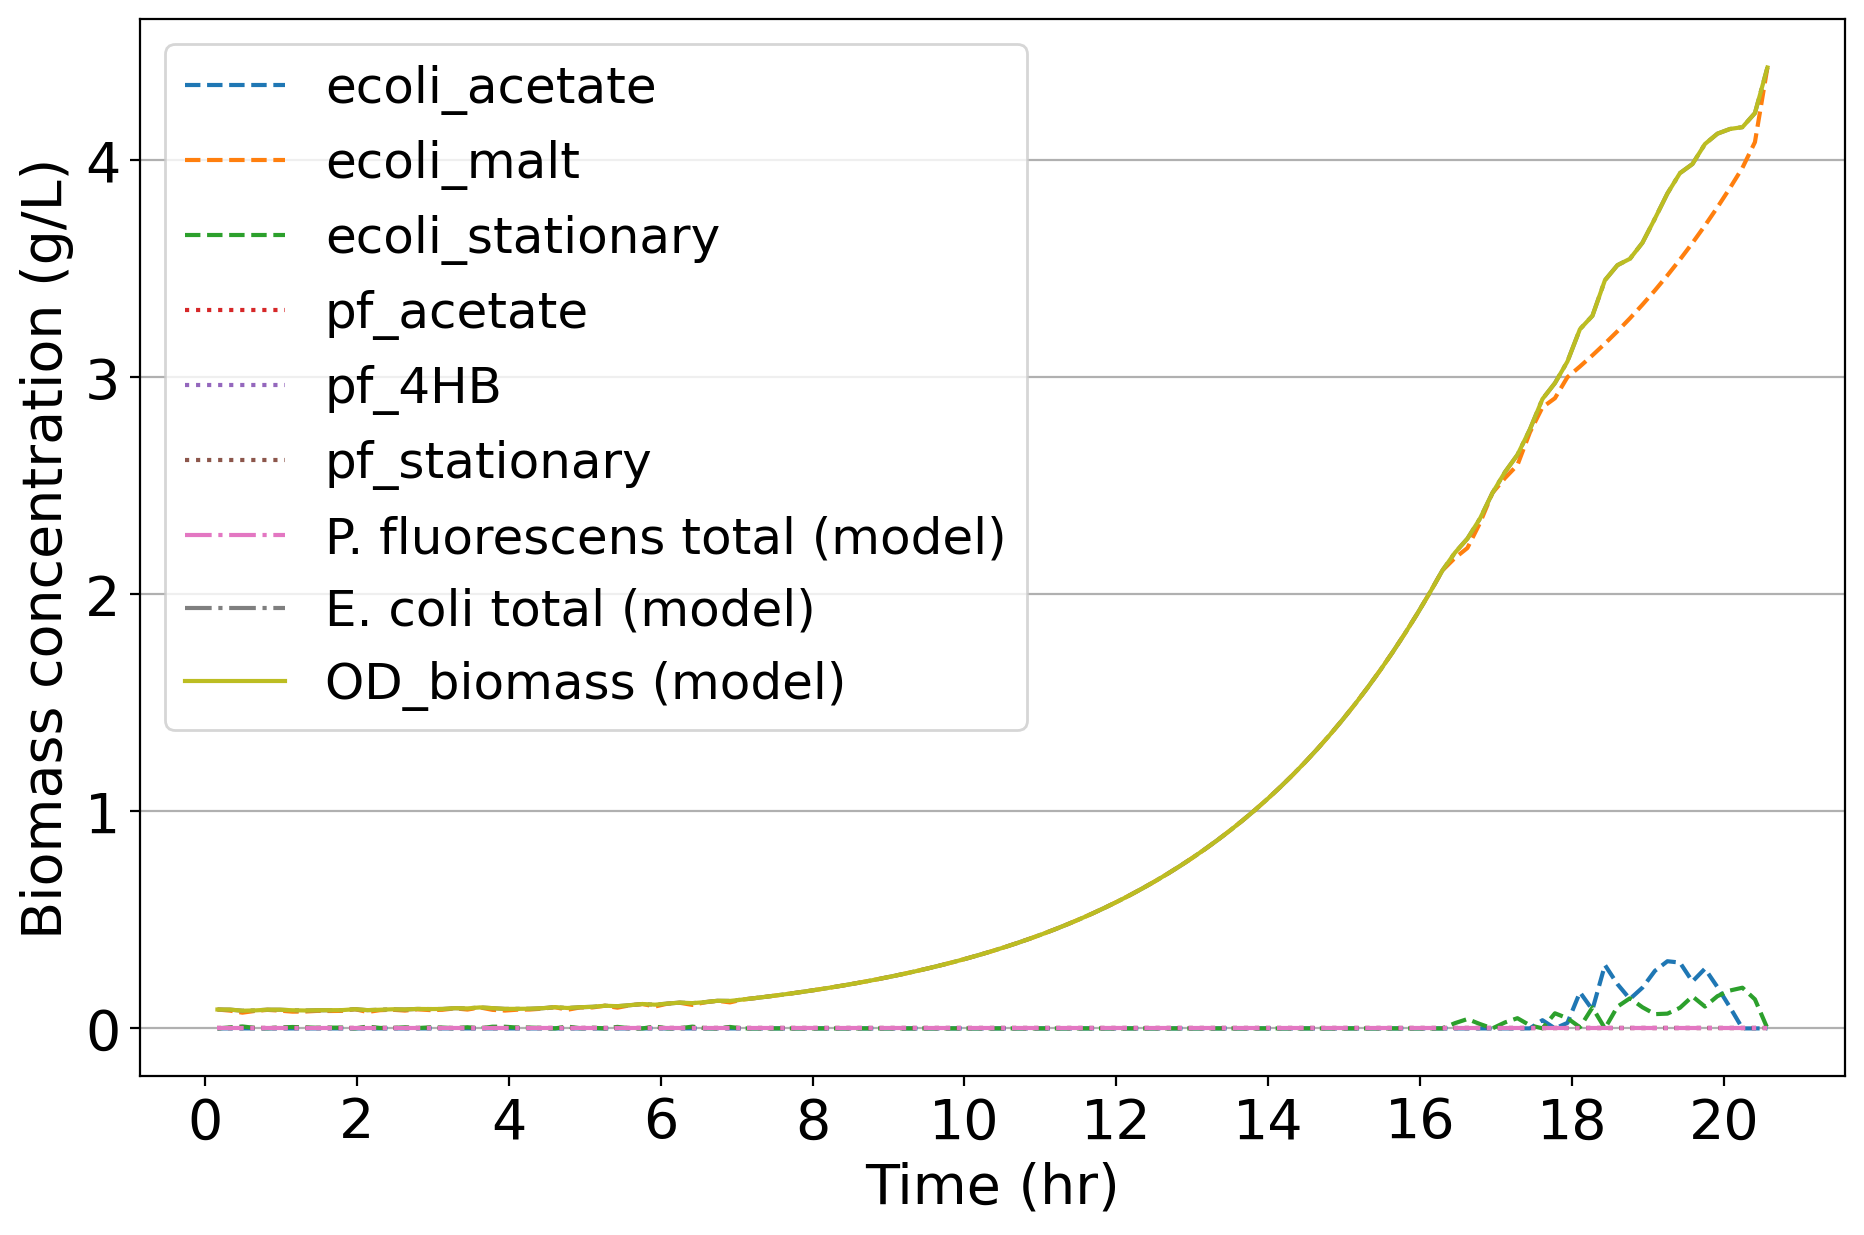

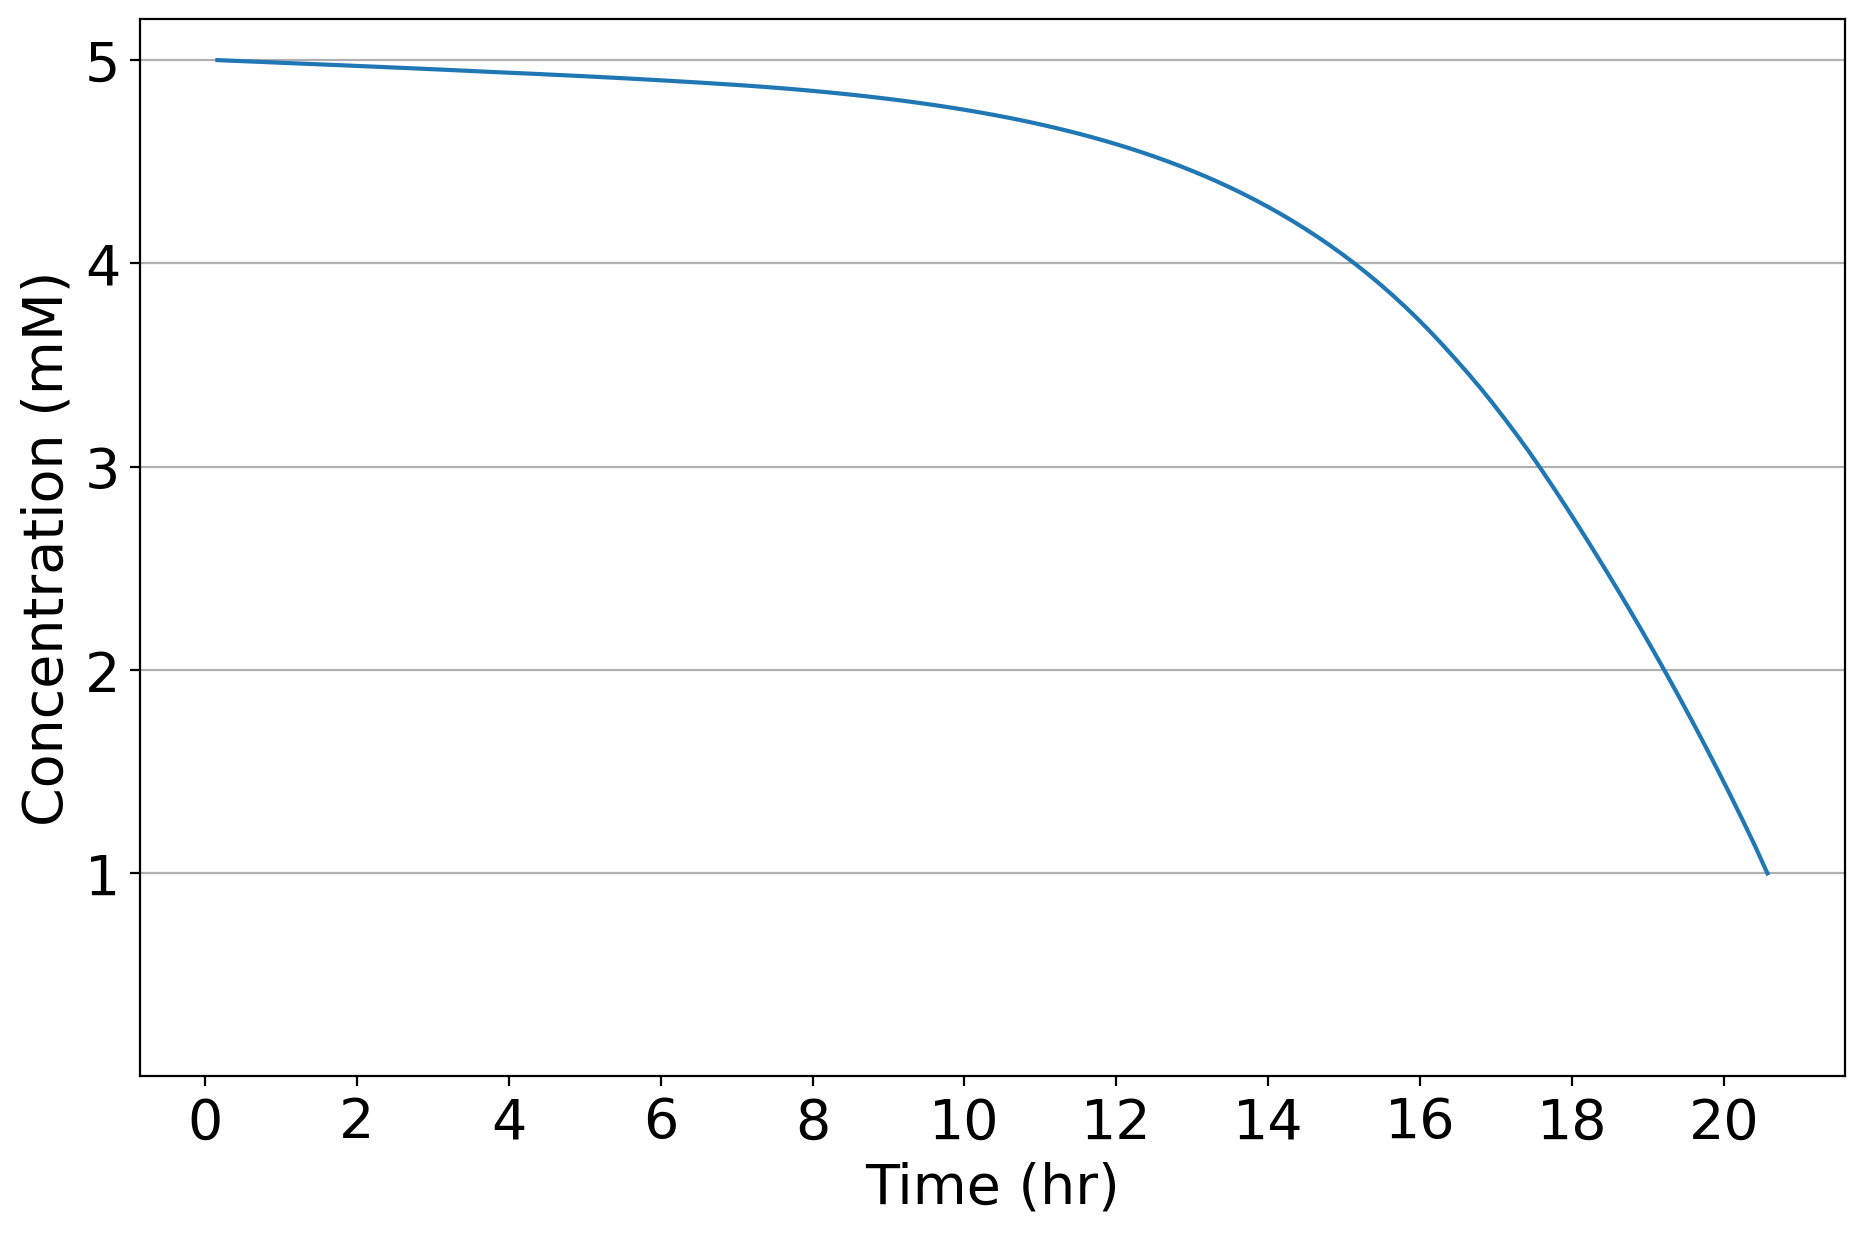

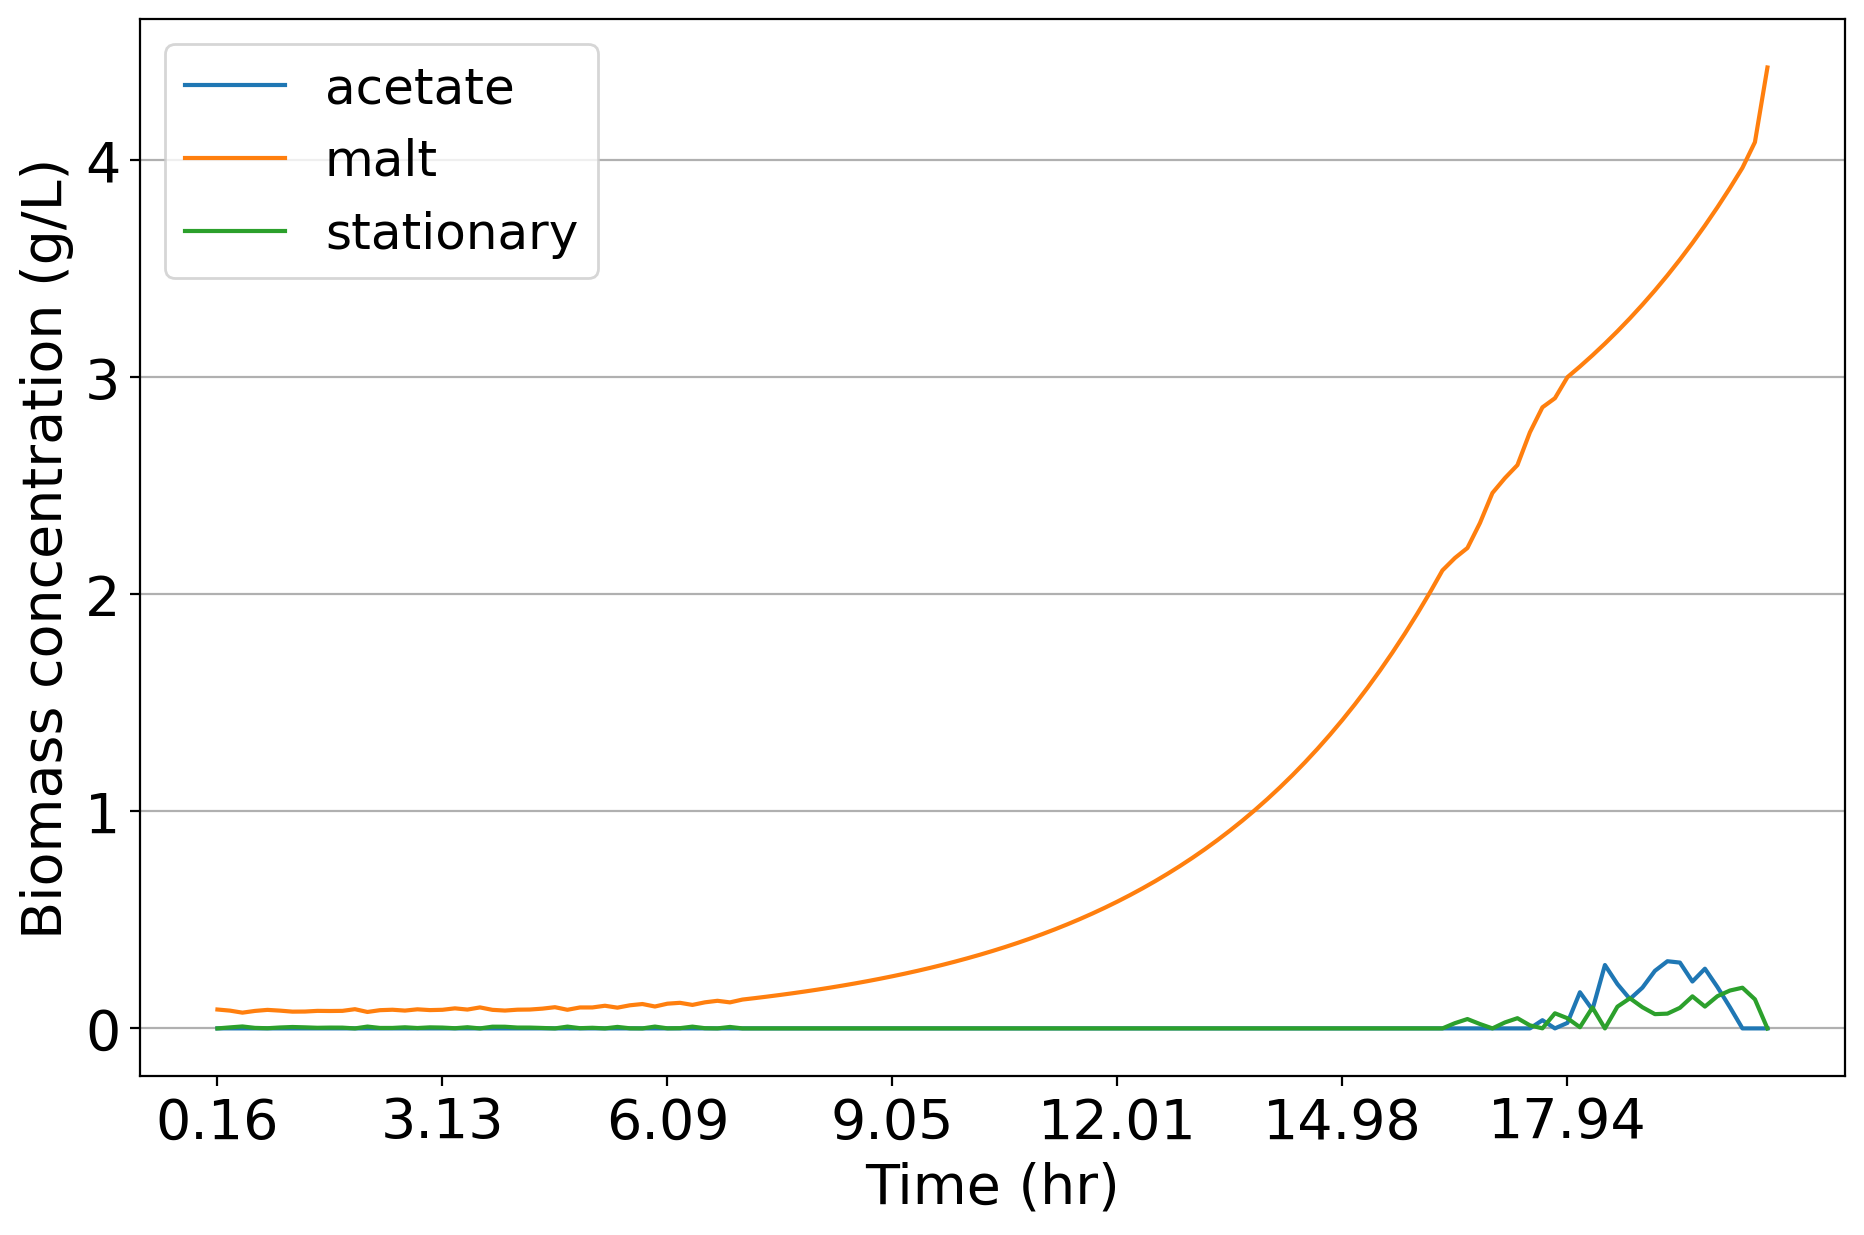

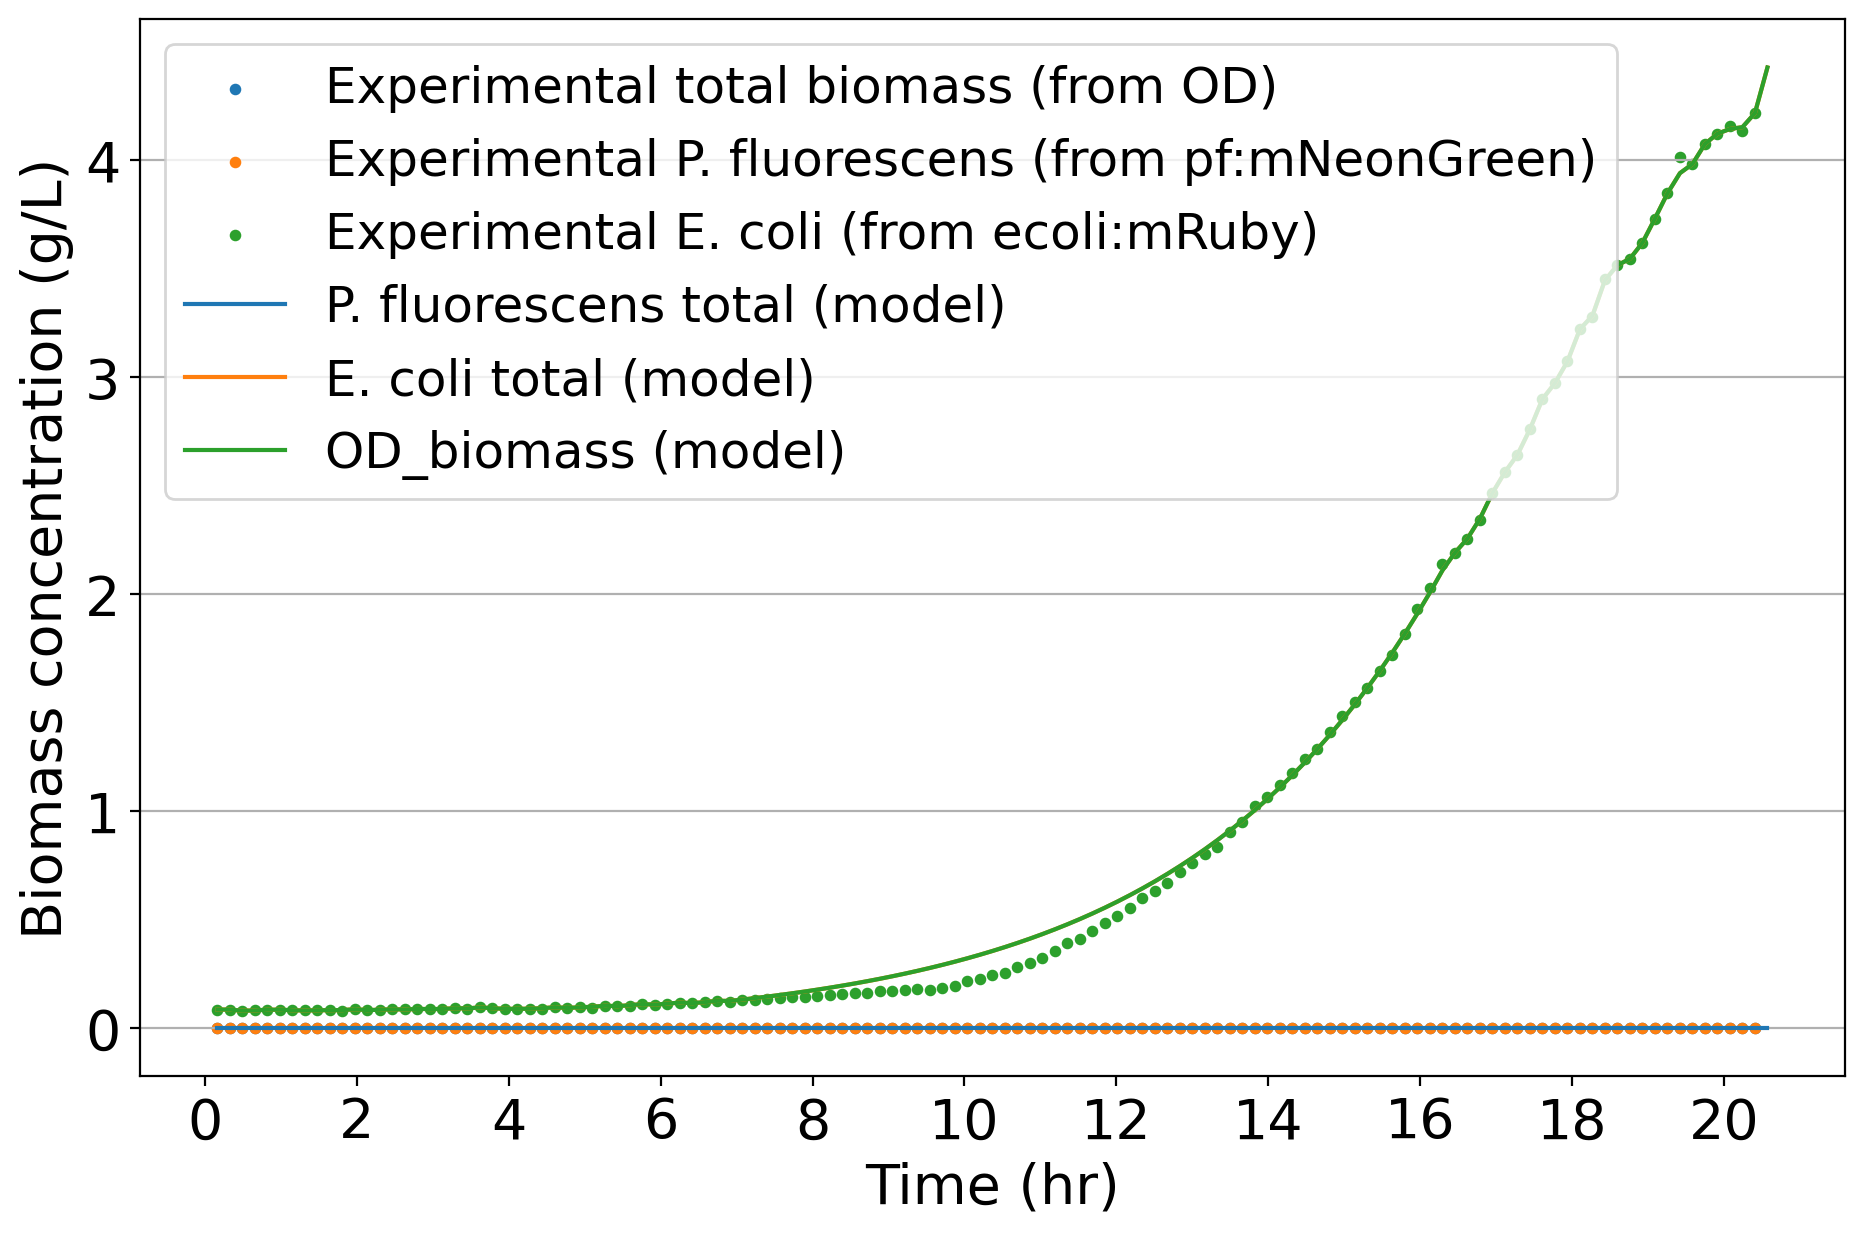

In [11]:
%run ../mscommfitting.py

maltose_4HB_commfit = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, growth_df, experimental_metadata)
maltose_4HB_commfit.fit(
    parameters={
        'v':.3,
        'cvmin': .1,
        'bcv': 0.0001,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00179","cpd00029"],
     rel_final_conc = {"cpd00179":0.2},
     zero_start=["cpd00029"],
    abs_final_conc={"cpd00029":0.5}, # metabolomics data
       graphs = update_graphs("G48", None), 
    msdb_path='../../../../ModelSEED/ModelSEEDDatabase',
    publishing=True,
    export_lp="maltose_4HB_coculture.lp")

#### Pseudomonas

In [12]:
%run ../data/standardized_data/datastandardization.py
growth_data_path="../data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
time1 = process_time()
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, trial_name_conversion, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    community_members = {
        pf: {
            'name': 'pf',
            'phenotypes': {
                'acetate': {"consumed":["cpd00029"]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                '4HB': {"consumed":["cpd00136"]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
                }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mNeonGreen':'pf'},
    species_abundances = species_abundances,
    carbon_conc_series = carbon_conc_series,
    ignore_trials = {'rows': ['C', 'D', 'E', 'B', 'G'], 'columns': [1,3,4,5,6,7,8,9,10,11,12]},
    species_identities_rows = species_identities_rows
)
print(f"{(process_time()-time1)/60} minutes")

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:112: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


The model GCF_001612705.1.RAST.mdl is unable to be simulated with pFBA and yields a < None (infeasible). > error.
The ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147

Done with concentrations and biomass loops: 0.0 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.00026041666666666666 min


C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:79: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.017447916666666667 min
Done exporting the content: 0.00390625 min
graph_0
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'acetate', 'malt', 'stationary', '4HB'},
 'species': ['pf', 'ecoli'],
 'trial': 'G45'}
graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00179'],
 'trial': 'G45'}
graph_2
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'acetate', 'malt', 'stationary'},
 'species': ['ecoli'],
 'trial': 'G45'}
graph_3
{'content': 'total_biomass',
 'experimental_data': True,
 'species': ['pf', 'ecoli'],
 'trial': 'G45'}


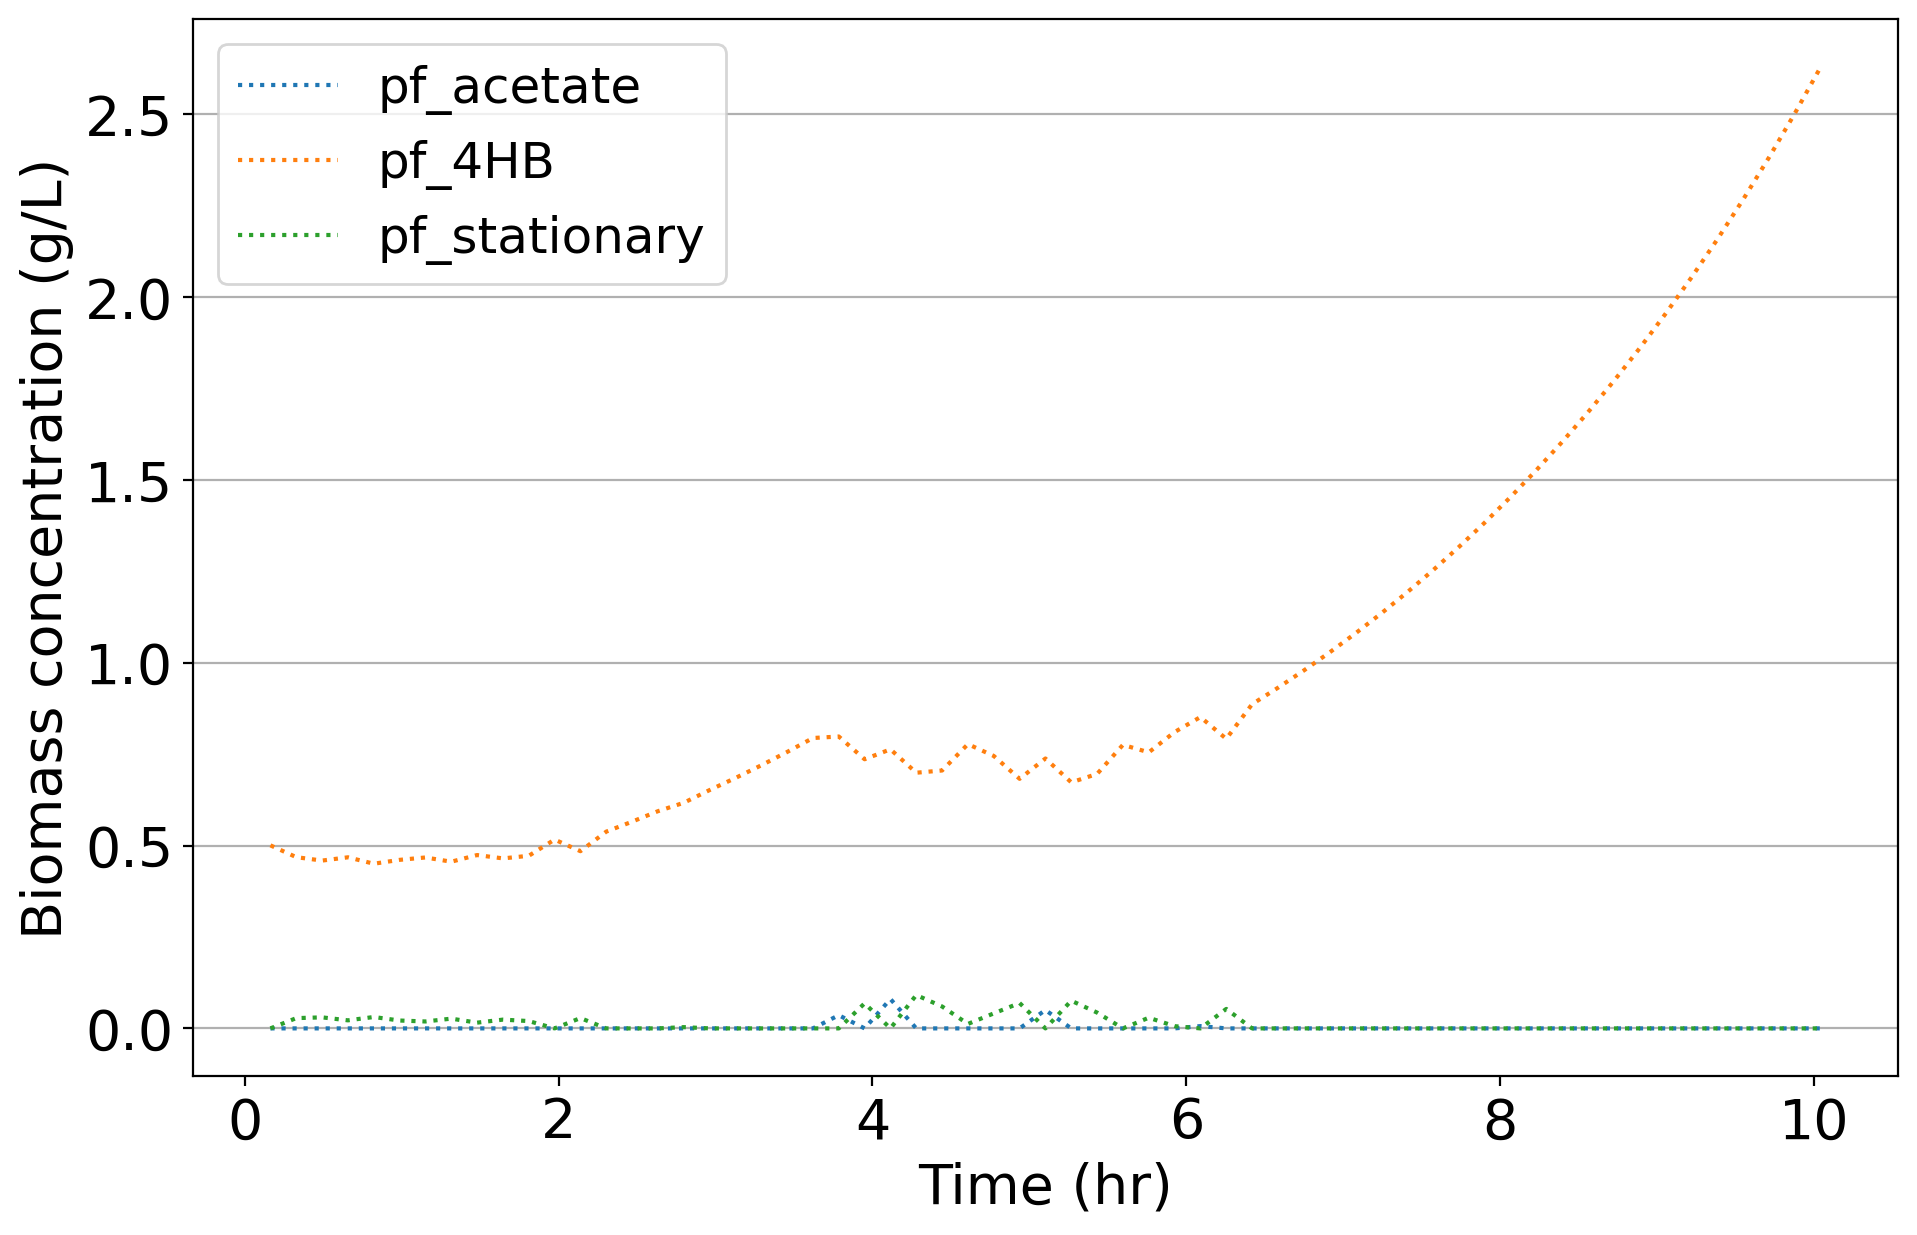

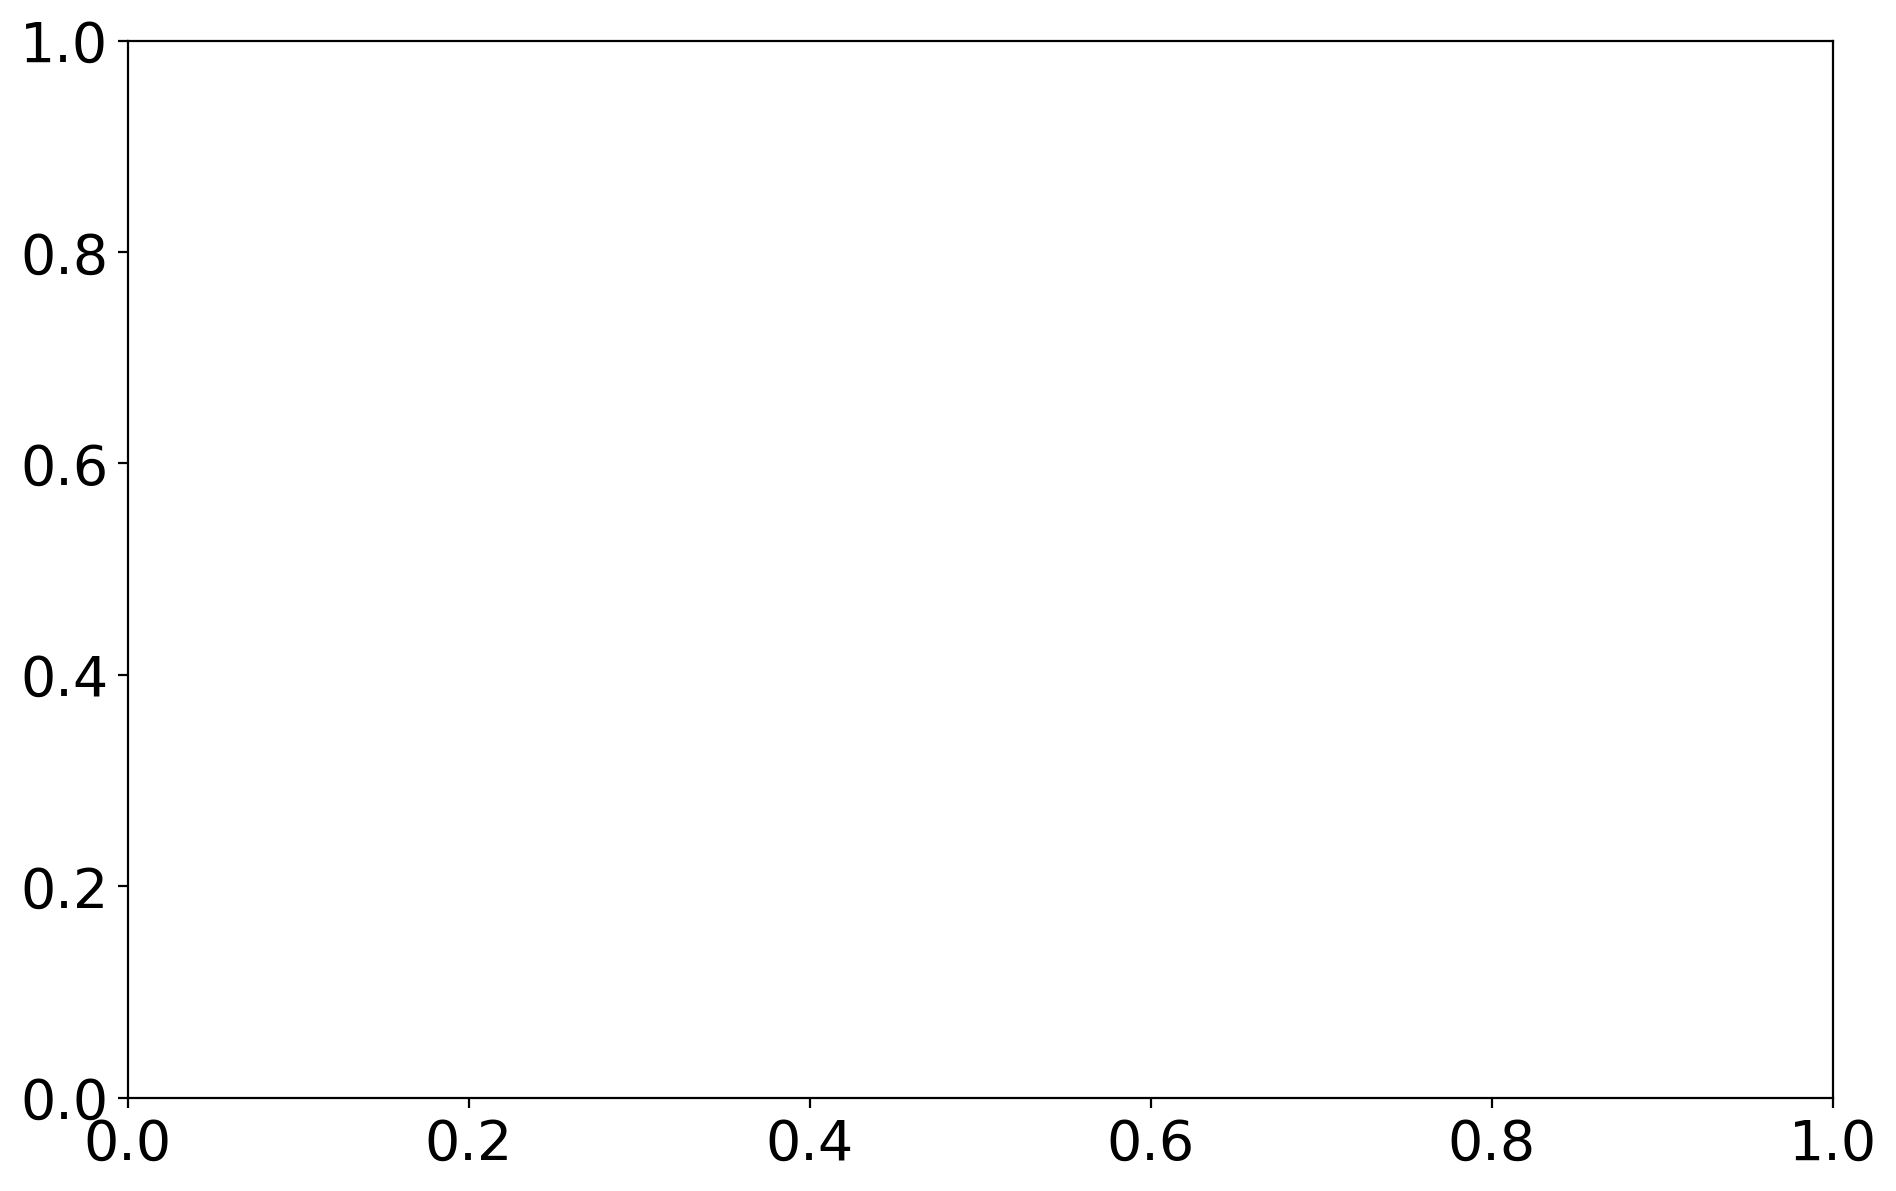

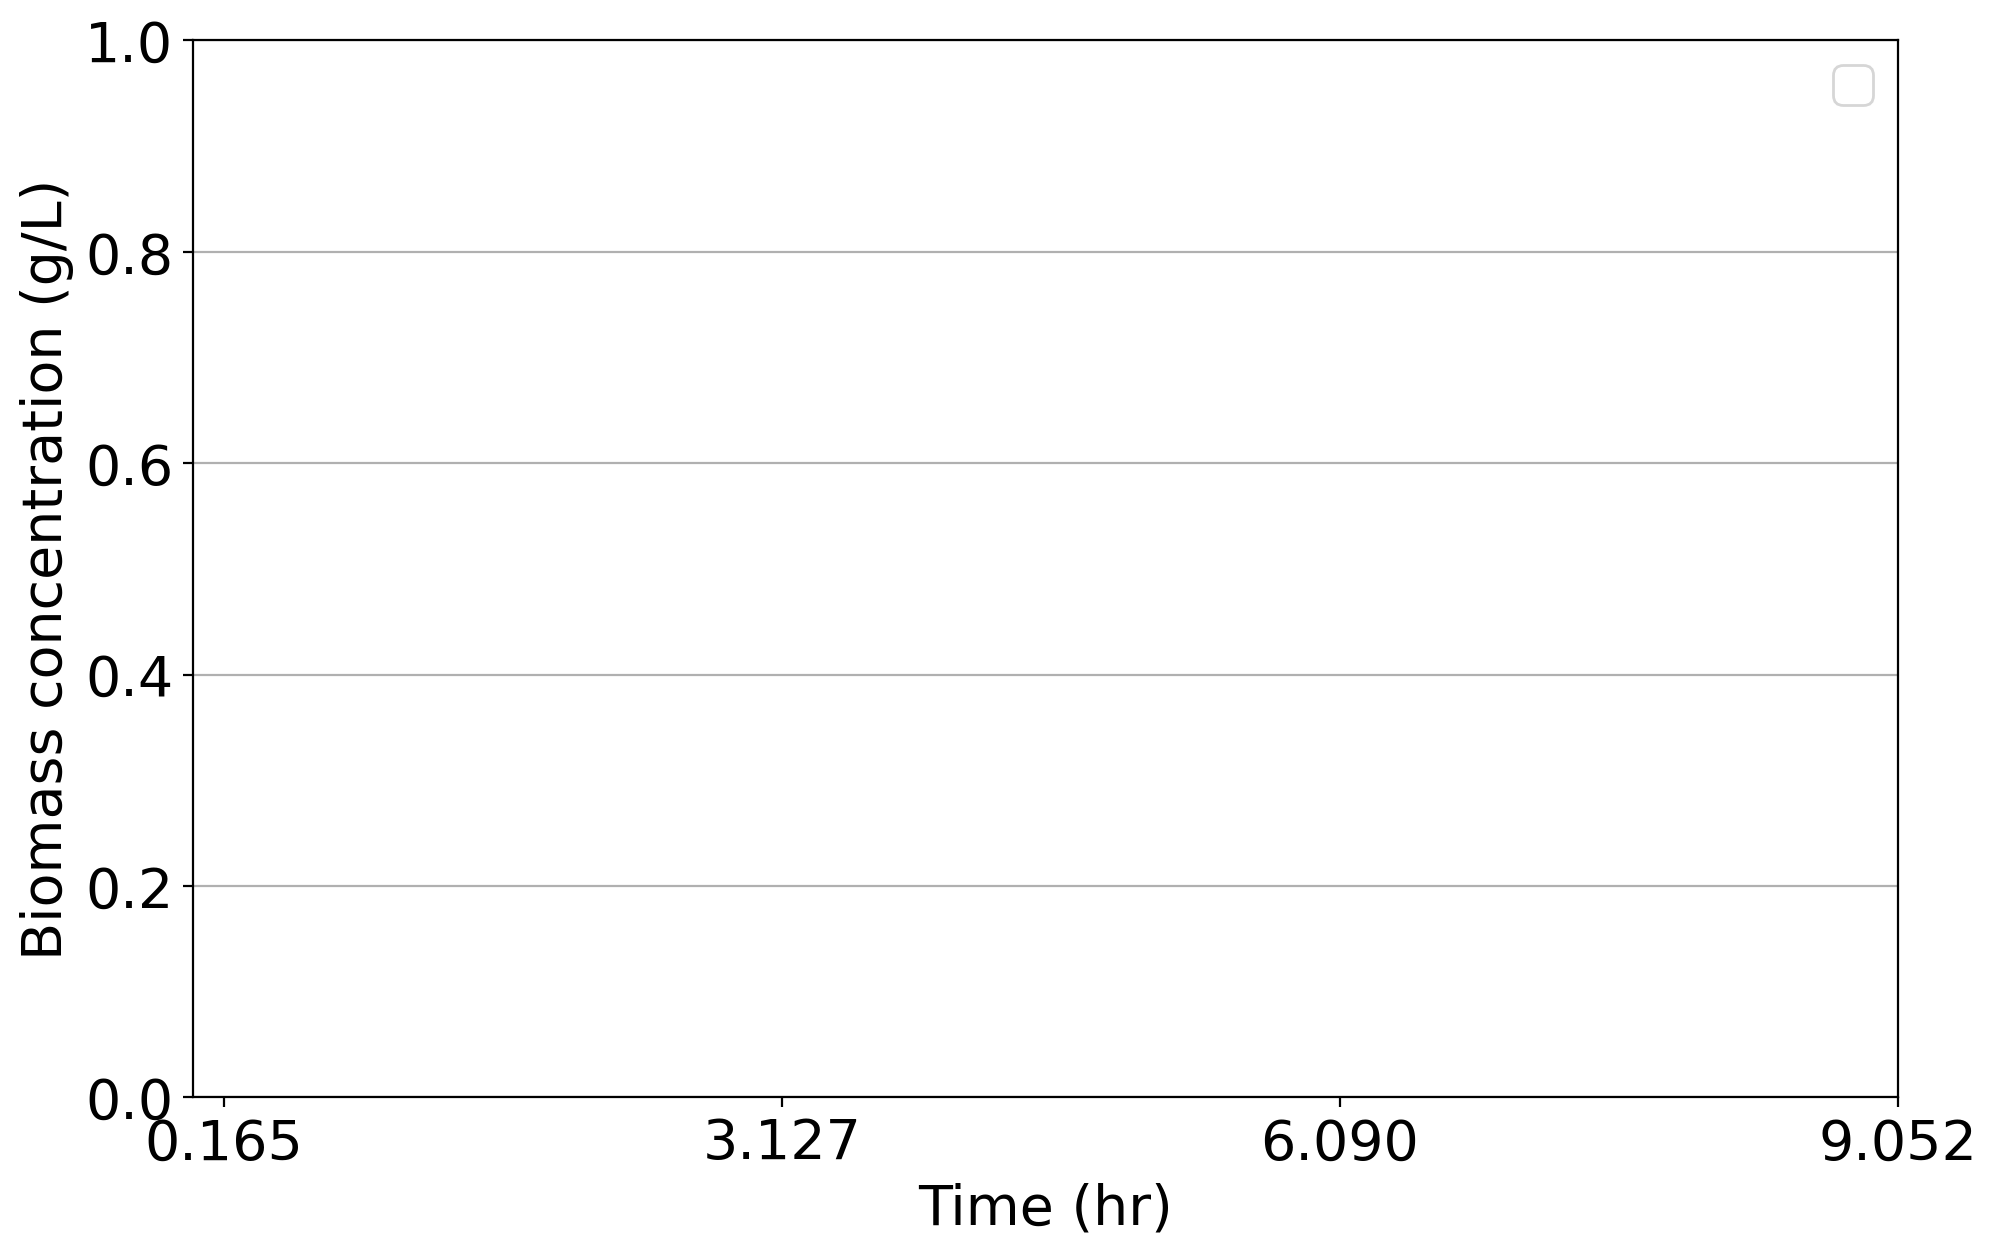

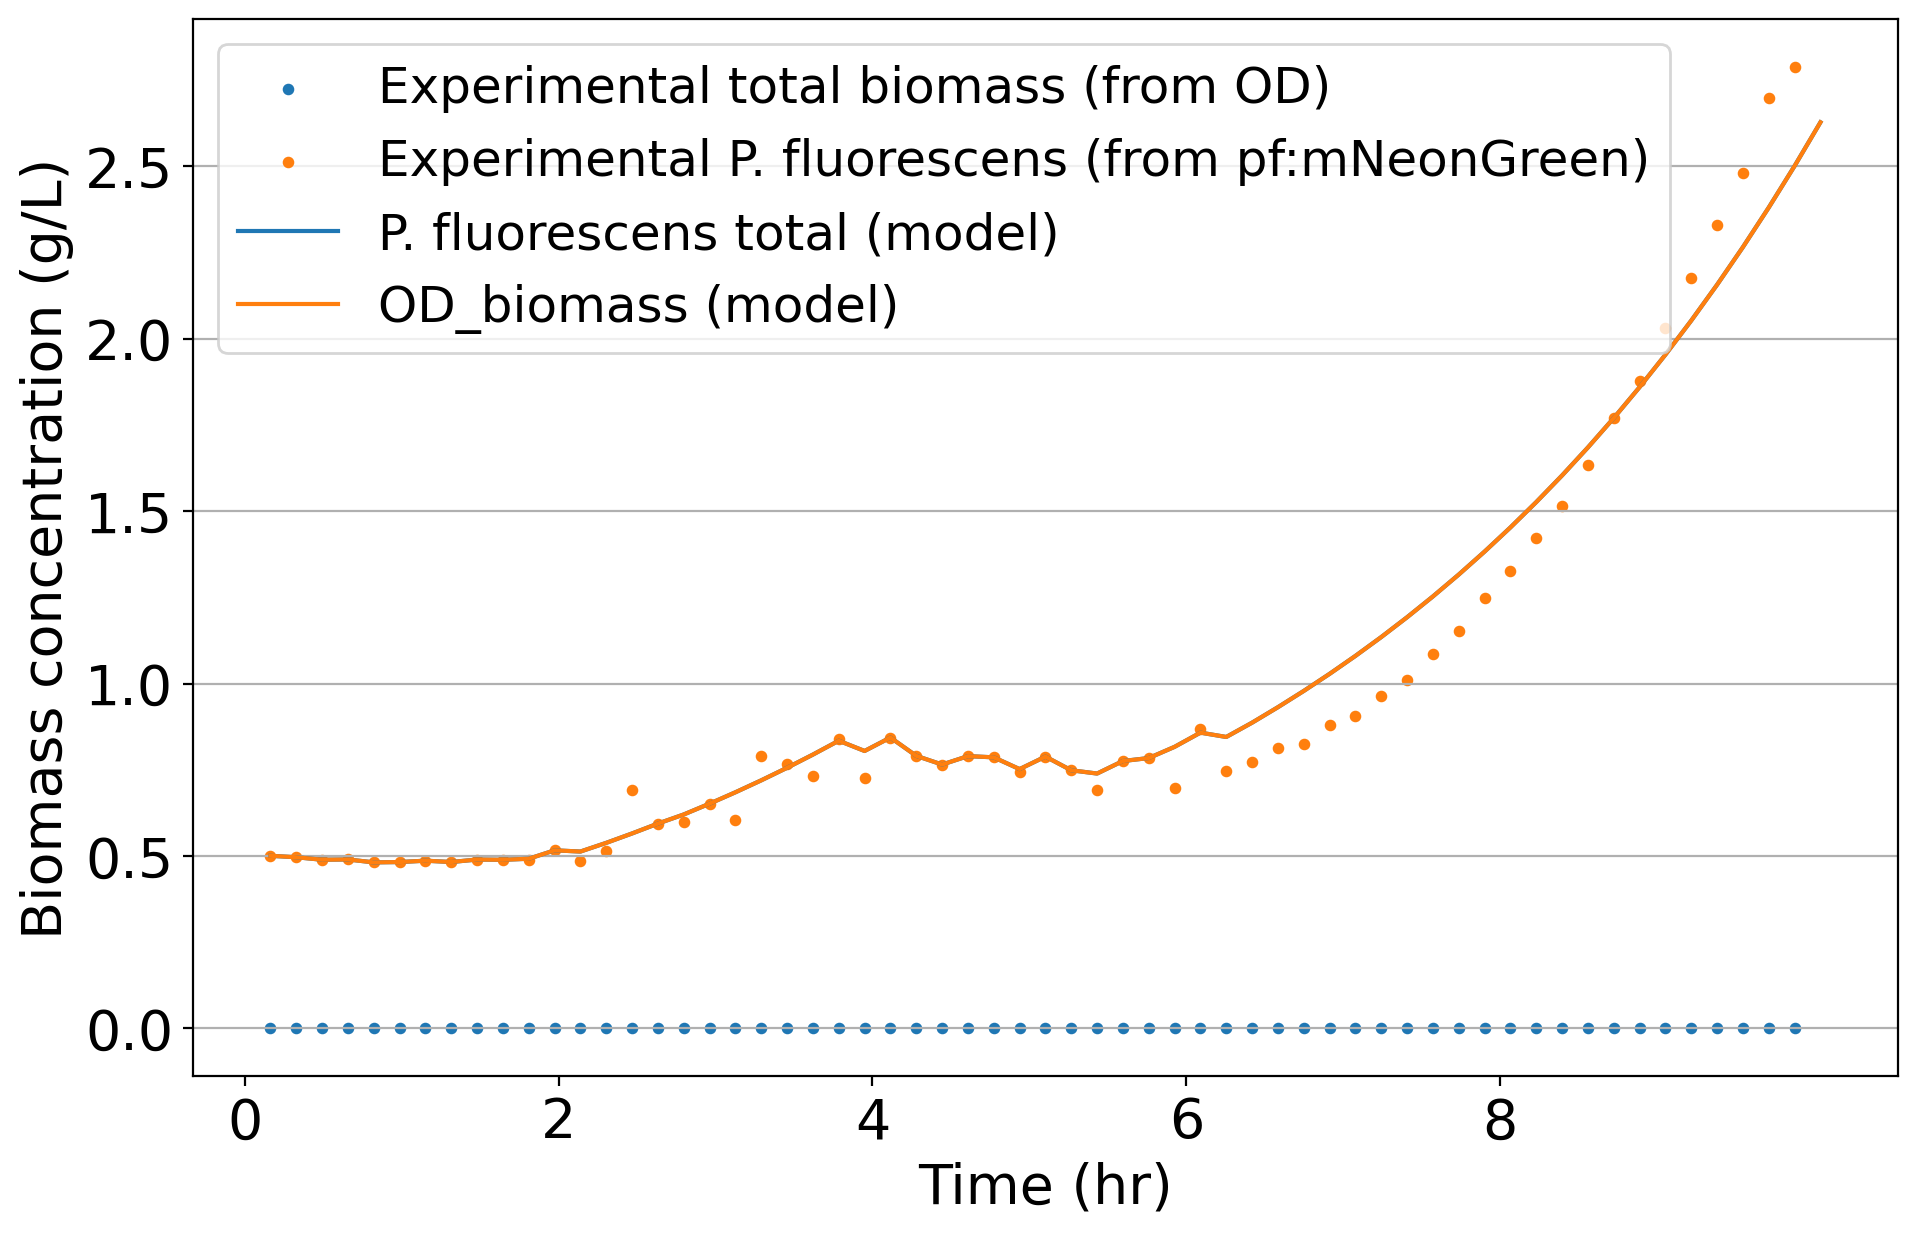

In [13]:
%run ../mscommfitting.py
maltose_4HB_commfit = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, growth_df, experimental_metadata)
maltose_4HB_commfit.fit(
    parameters={
        'v':.3,
        'cvmin': .1,
        'bcv': 0.0001,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00179","cpd00029","cpd00136"],
       graphs = update_graphs("G45", None), 
     rel_final_conc = {"cpd00179":.01, "cpd00136":0.01},
     zero_start=["cpd00029"],
    abs_final_conc={"cpd00029":0.5}, # metabolomics data
    msdb_path='../../../../ModelSEED/ModelSEEDDatabase',
    publishing=True,
    export_lp="maltose_4HB_pf.lp")

#### E. coli

In [14]:
%run ../data/standardized_data/datastandardization.py
growth_data_path="../data/Jeffs_data/PF-EC 4-29-22 ratios and 4HB changes.xlsx"
time1 = process_time()
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, trial_name_conversion, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    community_members = {
    ecoli: {
        'name': 'ecoli', 
        'phenotypes': {
            'acetate': {"consumed":["cpd00029"]}, #kbase_api.get_from_ws('93465/13/1'), 
            'malt': {"consumed":["cpd00179"],
                     "excreted":["cpd00029"]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
            }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'mRuby':'ecoli'},
    species_abundances = species_abundances,
    carbon_conc_series = carbon_conc_series,
    ignore_trials = {'rows': ['C', 'D', 'E', 'B', 'G'], 'columns': [1,2,3,4,5,6,7,8,9,10,12]},
    species_identities_rows = species_identities_rows
)
print(f"{(process_time()-time1)/60} minutes")

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:112: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


The ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166] timesteps (with [1.15536203 1.16174438 1.03174849 0.99776876 1.0127485  1.00792632
 1.02045772 1.01705697 1.02153077 1.02011271 1.02883294 1.0316031
 1.03786495 1.0387100

Done with concentrations and biomass loops: 0.00026041666666666666 min
Done with DCC loop: 0.0 min


C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:79: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


Done with the dbc & diffc loop: 0.0005208333333333333 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.029427083333333333 min
Done exporting the content: 0.005729166666666666 min
graph_0
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'acetate', 'malt', 'stationary', '4HB'},
 'species': ['pf', 'ecoli'],
 'trial': 'G54'}
graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00179'],
 'trial': 'G54'}
graph_2
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'acetate', 'malt', 'stationary'},
 'species': ['ecoli'],
 'trial': 'G54'}
graph_3
{'content': 'total_biomass',
 'experimental_data': True,
 'species': ['pf', 'ecoli'],
 'trial': 'G54'}


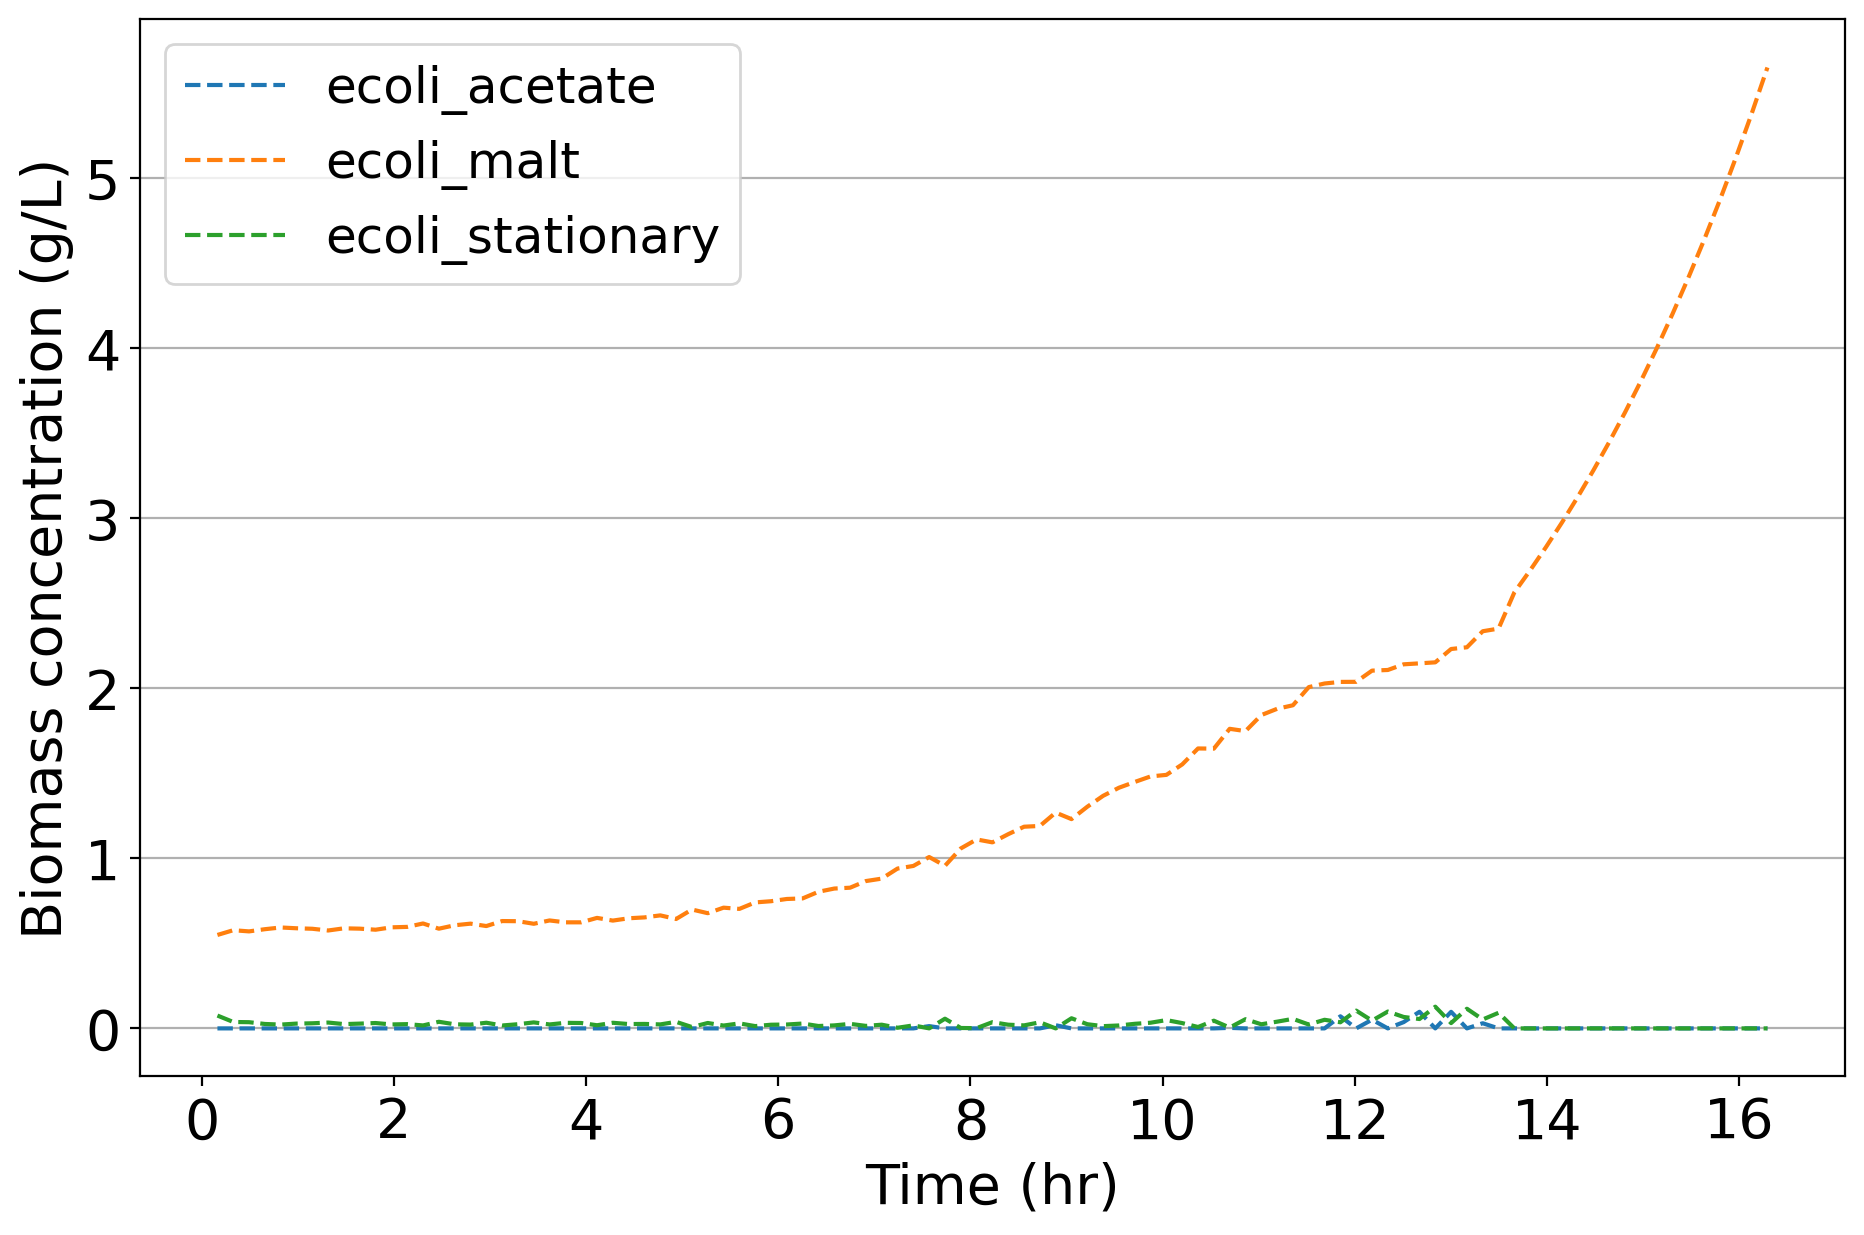

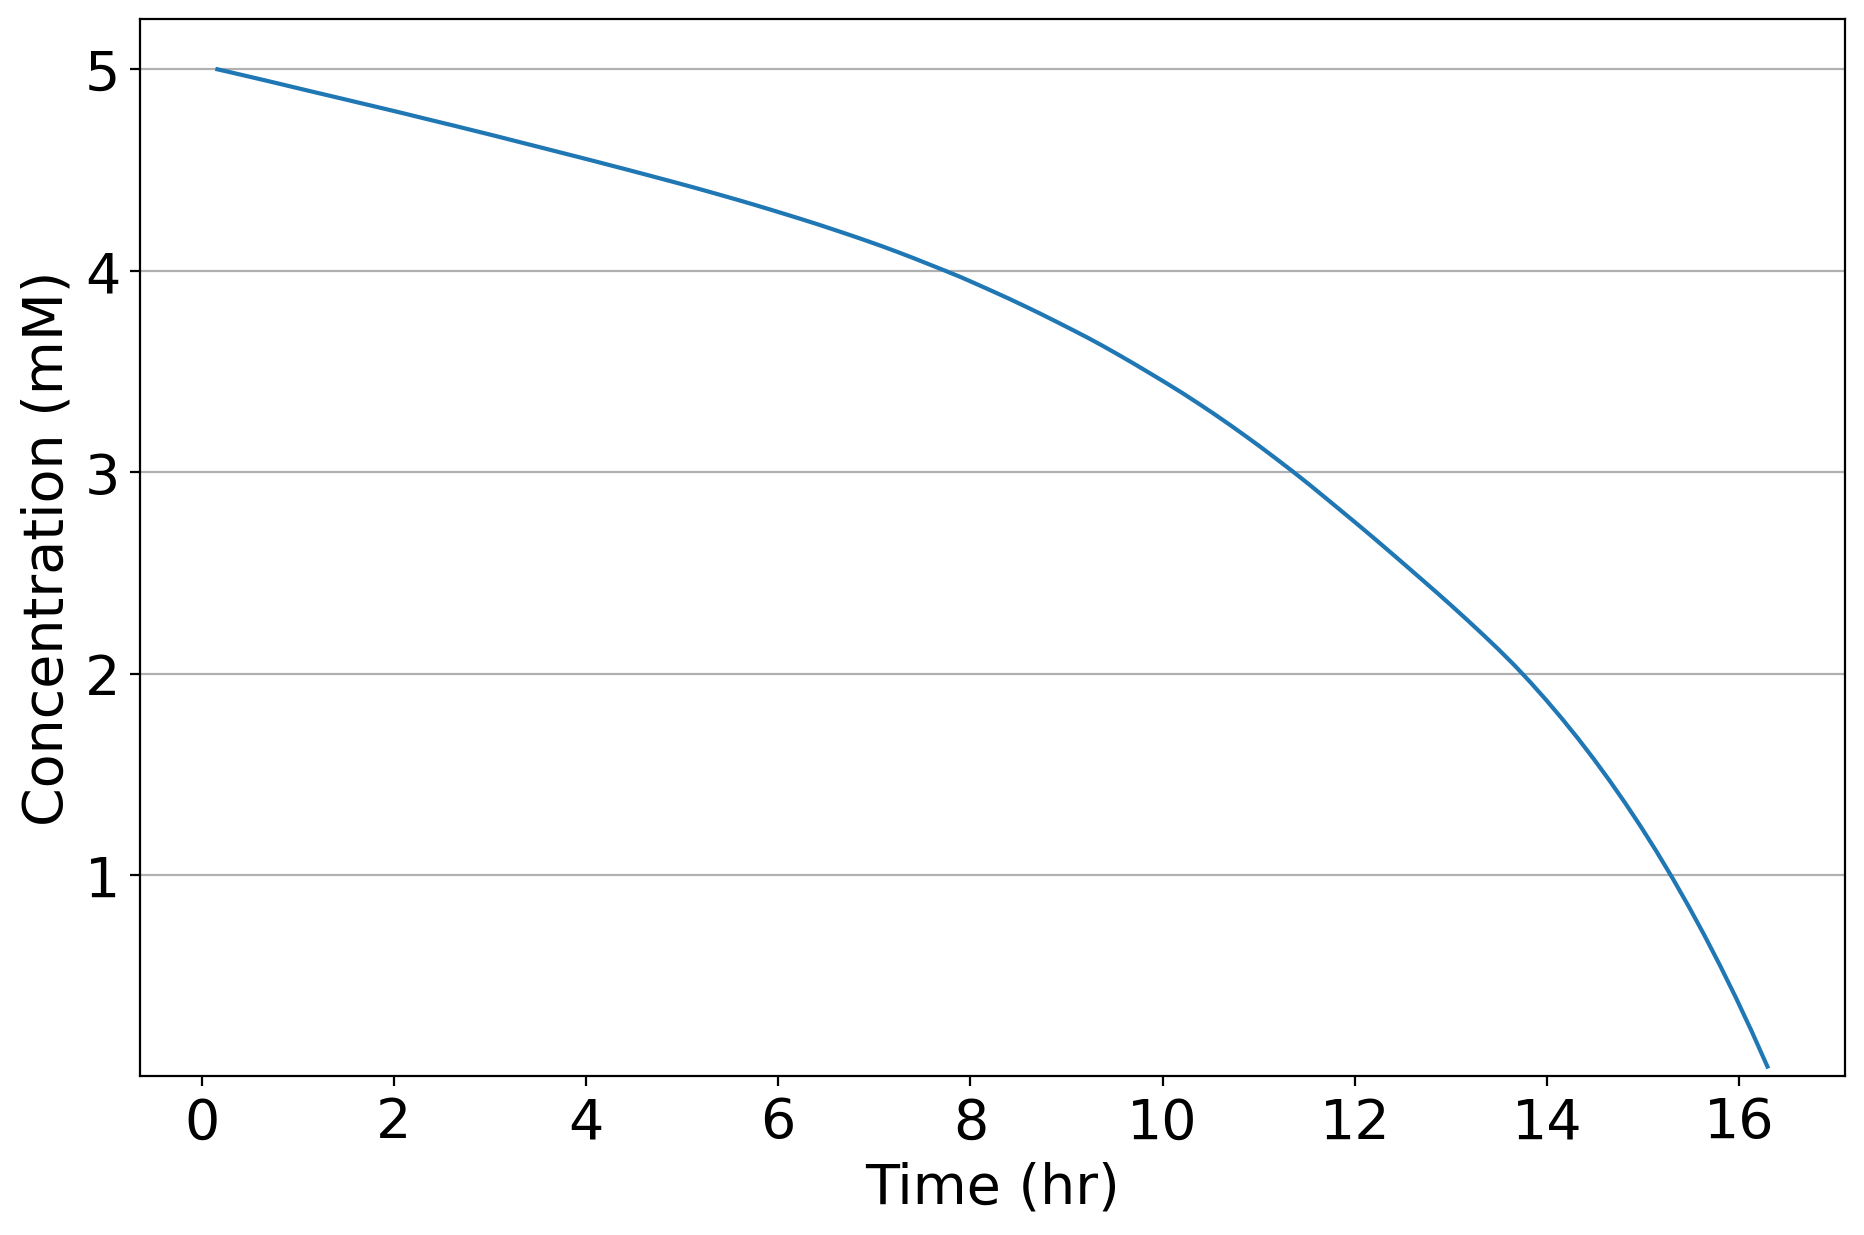

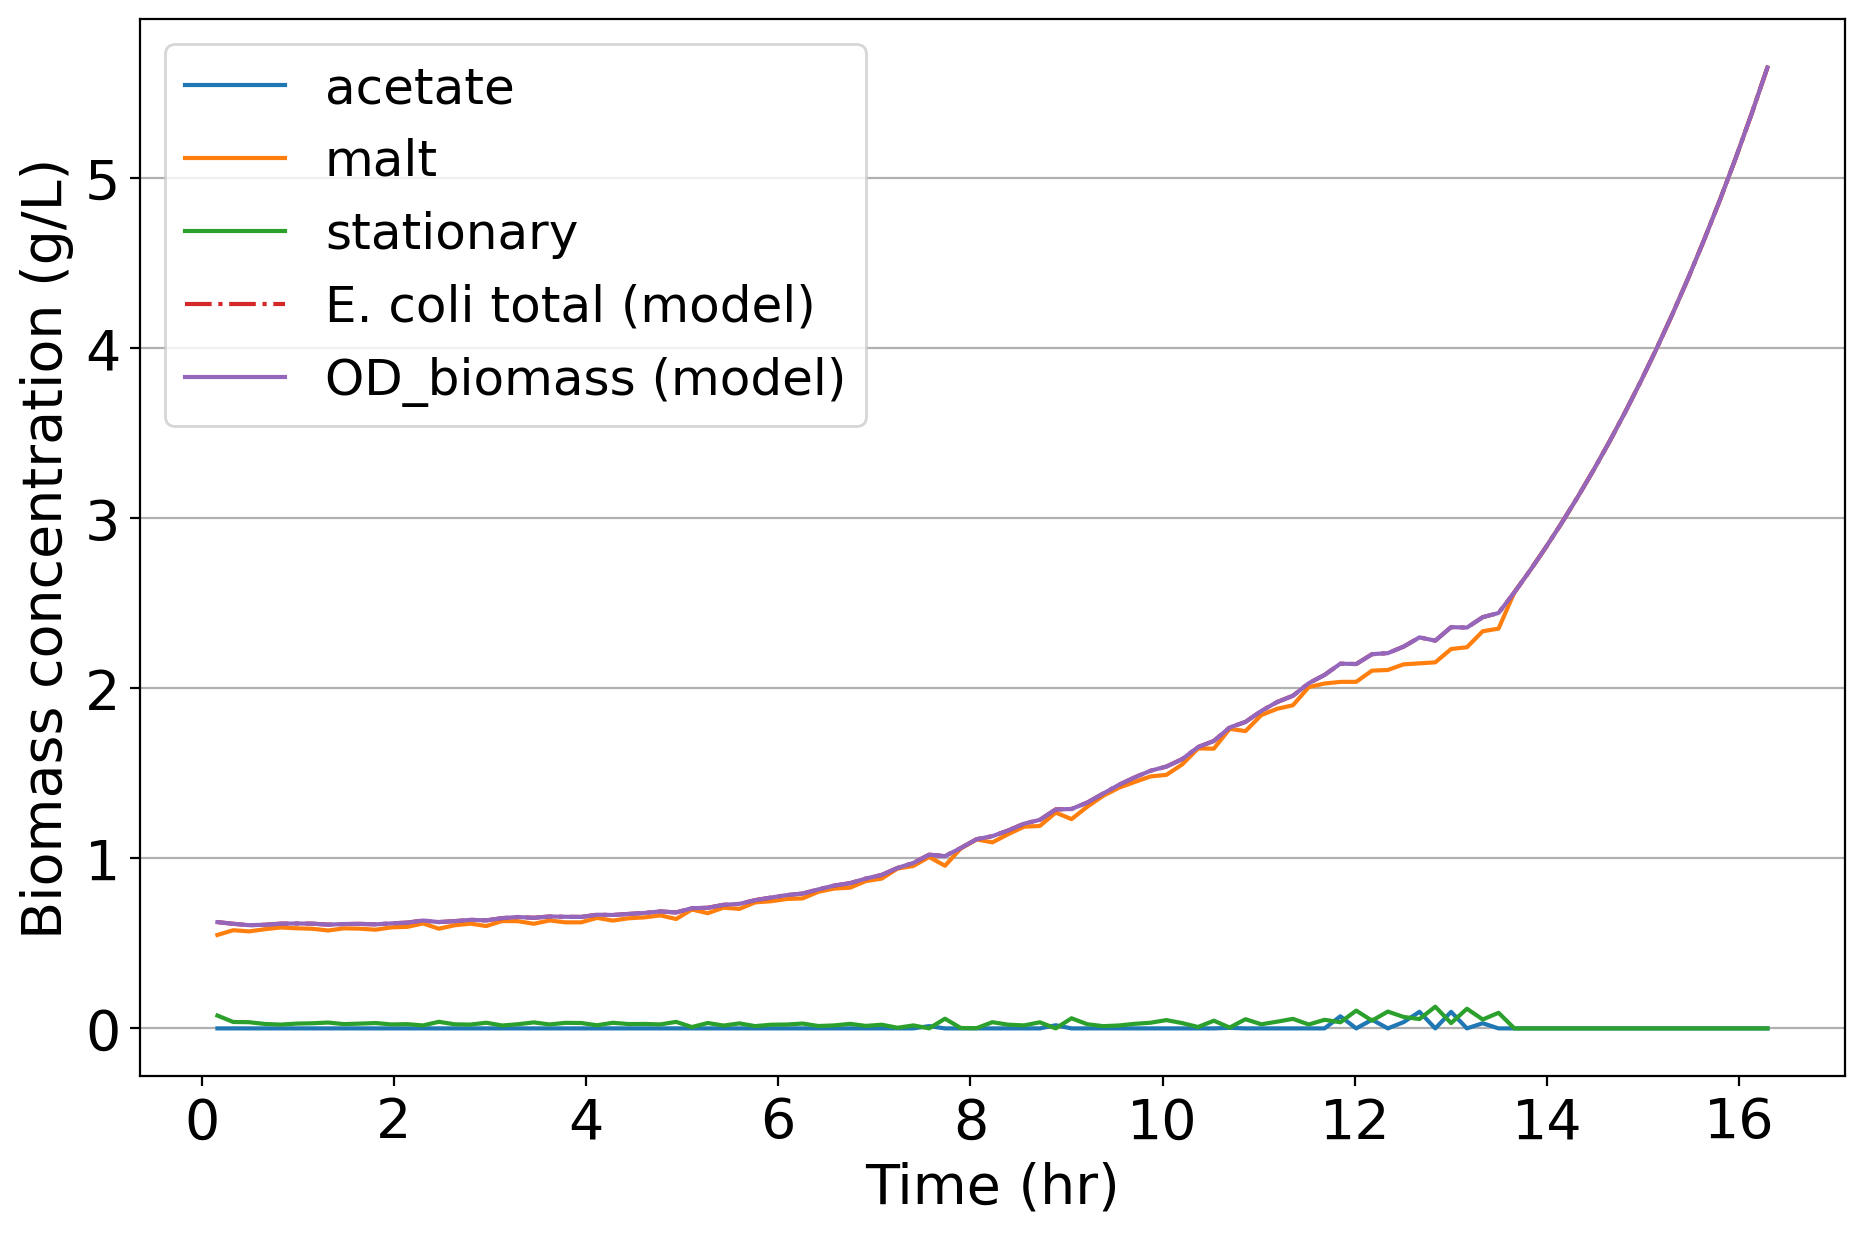

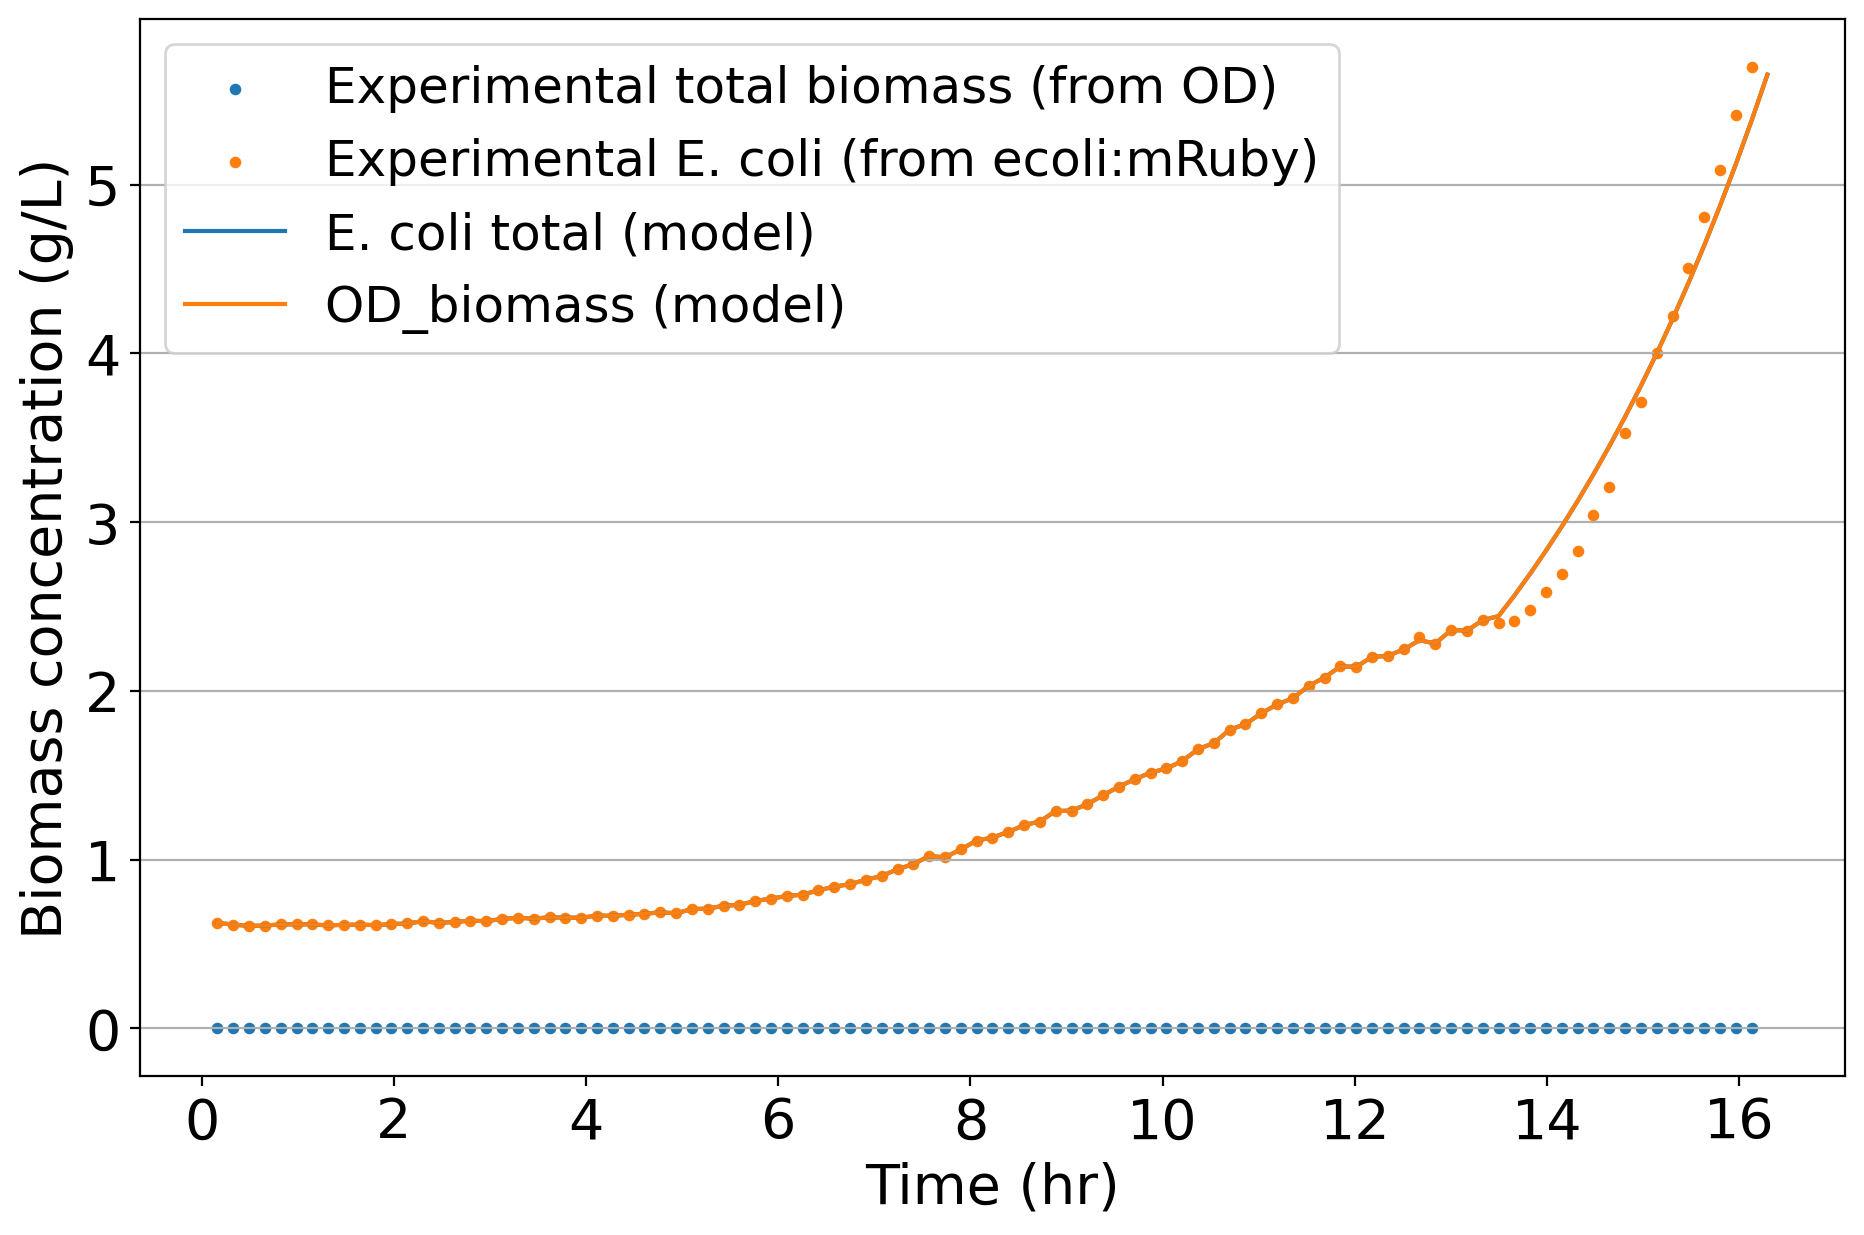

In [15]:
%run ../mscommfitting.py
maltose_4HB_commfit = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, growth_df, experimental_metadata)
maltose_4HB_commfit.fit(
    parameters={
        'v':.3,
        'cvmin': .1,
        'bcv': 0.0001,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00179","cpd00029","cpd00136"],
       graphs = update_graphs("G54", None), 
     rel_final_conc = {"cpd00179":.01, "cpd00136":0.01},
     zero_start=["cpd00029"],
    abs_final_conc={"cpd00029":0.5}, # metabolomics data
    msdb_path='../../../../ModelSEED/ModelSEEDDatabase',
    publishing=True,
    export_lp="maltose_4HB_ecoli.lp")

# Acetate

#### Coculture

In [16]:
%run ../data/standardized_data/datastandardization.py
growth_data_path="../data/Jeffs_data/PF-EC-PFEC on Acetate 6-17-22.xlsx"
time1 = process_time()
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, trial_name_conversion, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    community_members = {
        ecoli: {
            'name': 'ecoli', 
            'phenotypes': {
                'acetate': {"consumed":["cpd00029"]}, #kbase_api.get_from_ws('93465/13/1'), 
                'malt': {"consumed":["cpd00179"],
                         "excreted":["cpd00029"]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
                }
        },
        pf: {
            'name': 'pf',
            'phenotypes': {
                'acetate': {"consumed":["cpd00029"]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                '4HB': {"consumed":["cpd00136"]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
                }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'Fluorescence':'pf', 'Fluorescence 1':'ecoli'},
    species_abundances = {num:{"ecoli":1, "pf":1} for num in range(1,13)},
    carbon_conc_series = {'columns': {'cpd00029': {2:100, 3: 50, 4: 25, 5: 12.5, 6: 6.25, 7: 3}}},
    ignore_trials = {'rows': ['C', 'D', 'B', 'F'], 'columns': [1,2,4,5,6,7,8,9,10,11,12]},
    species_identities_rows = {
        1:{"ecoli":"mRuby"},
        2:{"ecoli":"ACS"},
        3:{"pf":""},
        4:{"ecoli":"mRuby"},
        5:{"ecoli":"ACS"},
    },
    significant_deviation=None
)
print(f"{(process_time()-time1)/60} minutes")

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:112: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


The model GCF_001612705.1.RAST.mdl is unable to be simulated with pFBA and yields a < None (infeasible). > error.
The ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The [109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159] timesteps (with [0.55664943 0.5585803  0.54911776 0.54616618 0.54806124 0.54696361
 0.54835377 0.54954046 0.5475263  0.55053545 0.5512014  0.

In [17]:
trial_name_conversion

{'B': {'2': ('G1', 'r1_ecoli_mRuby-r1_pf'),
  '3': ('G2', 'r1_ecoli_mRuby-r1_pf'),
  '4': ('G3', 'r1_ecoli_mRuby-r1_pf'),
  '5': ('G4', 'r1_ecoli_mRuby-r1_pf'),
  '6': ('G5', 'r1_ecoli_mRuby-r1_pf'),
  '7': ('G6', 'r1_ecoli_mRuby-r1_pf'),
  '8': ('G7', 'r1_ecoli_mRuby-r1_pf'),
  '9': ('G8', 'r1_ecoli_mRuby-r1_pf'),
  '10': ('G9', 'r1_ecoli_mRuby-r1_pf'),
  '11': ('G10', 'r1_ecoli_mRuby-r1_pf'),
  '12': ('G11', 'r1_ecoli_mRuby-r1_pf'),
  '13': ('G12', 'r1_ecoli_mRuby-r1_pf')},
 'C': {'2': ('G13', 'r1_ecoli_ACS-r1_pf'),
  '3': ('G14', 'r1_ecoli_ACS-r1_pf'),
  '4': ('G15', 'r1_ecoli_ACS-r1_pf'),
  '5': ('G16', 'r1_ecoli_ACS-r1_pf'),
  '6': ('G17', 'r1_ecoli_ACS-r1_pf'),
  '7': ('G18', 'r1_ecoli_ACS-r1_pf'),
  '8': ('G19', 'r1_ecoli_ACS-r1_pf'),
  '9': ('G20', 'r1_ecoli_ACS-r1_pf'),
  '10': ('G21', 'r1_ecoli_ACS-r1_pf'),
  '11': ('G22', 'r1_ecoli_ACS-r1_pf'),
  '12': ('G23', 'r1_ecoli_ACS-r1_pf'),
  '13': ('G24', 'r1_ecoli_ACS-r1_pf')},
 'D': {'2': ('G25', 'r1_ecoli-r1_pf_'),
  '3': ('G26'

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:79: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


Done with concentrations and biomass loops: 0.0005208333333333333 min
Done with DCC loop: 0.00026041666666666666 min
Done with the dbc & diffc loop: 0.0015625 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.08333333333333333 min
Done exporting the content: 0.010416666666666666 min
graph_0
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'acetate', 'malt', 'stationary', '4HB'},
 'species': ['pf', 'ecoli'],
 'trial': 'G38'}
graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00179'],
 'trial': 'G38'}
graph_2
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'acetate', 'malt', 'stationary'},
 'species': ['ecoli'],
 'trial': 'G38'}
graph_3
{'content': 'total_biomass',
 'experimental_data': True,
 'species': ['pf', 'ecoli'],
 'trial': 'G38'}


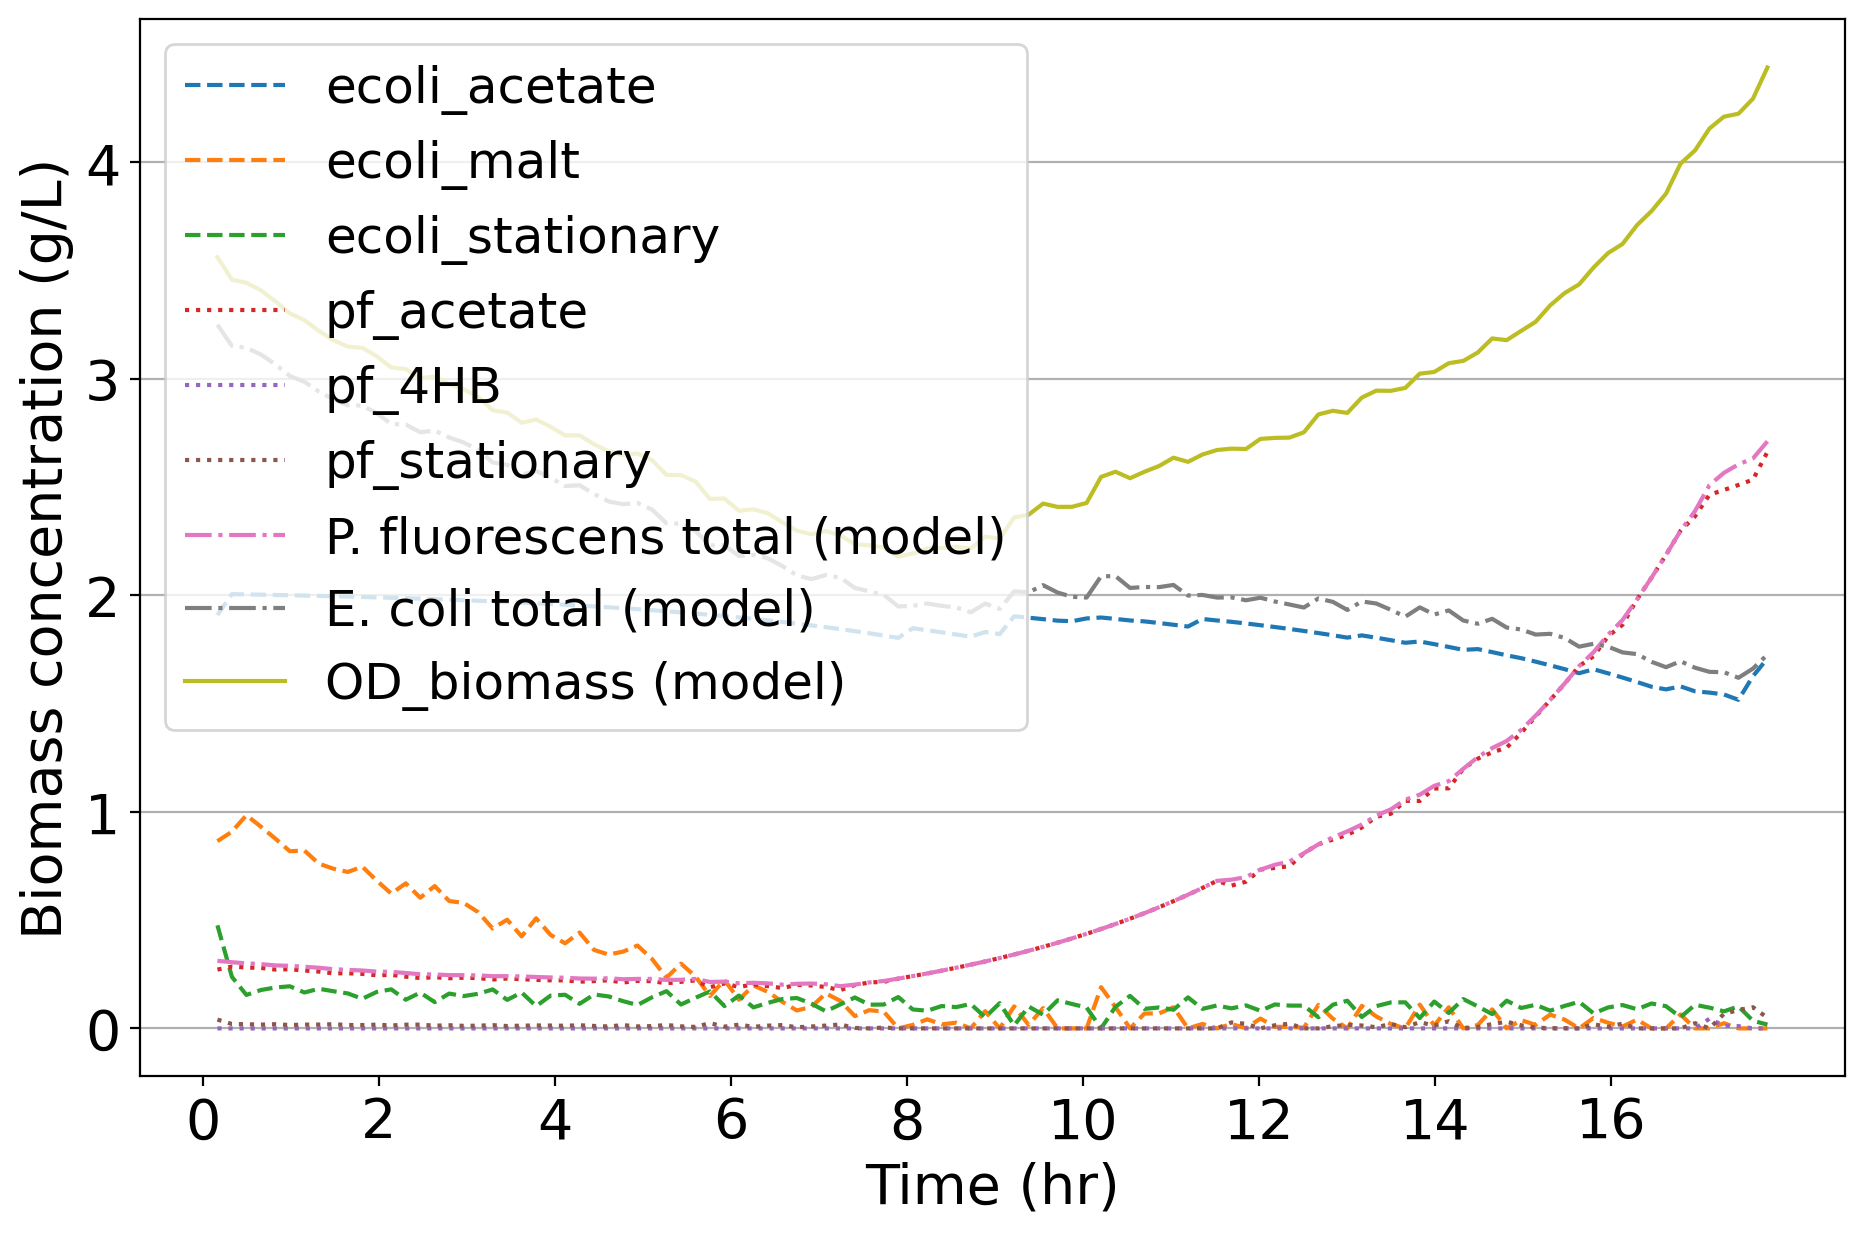

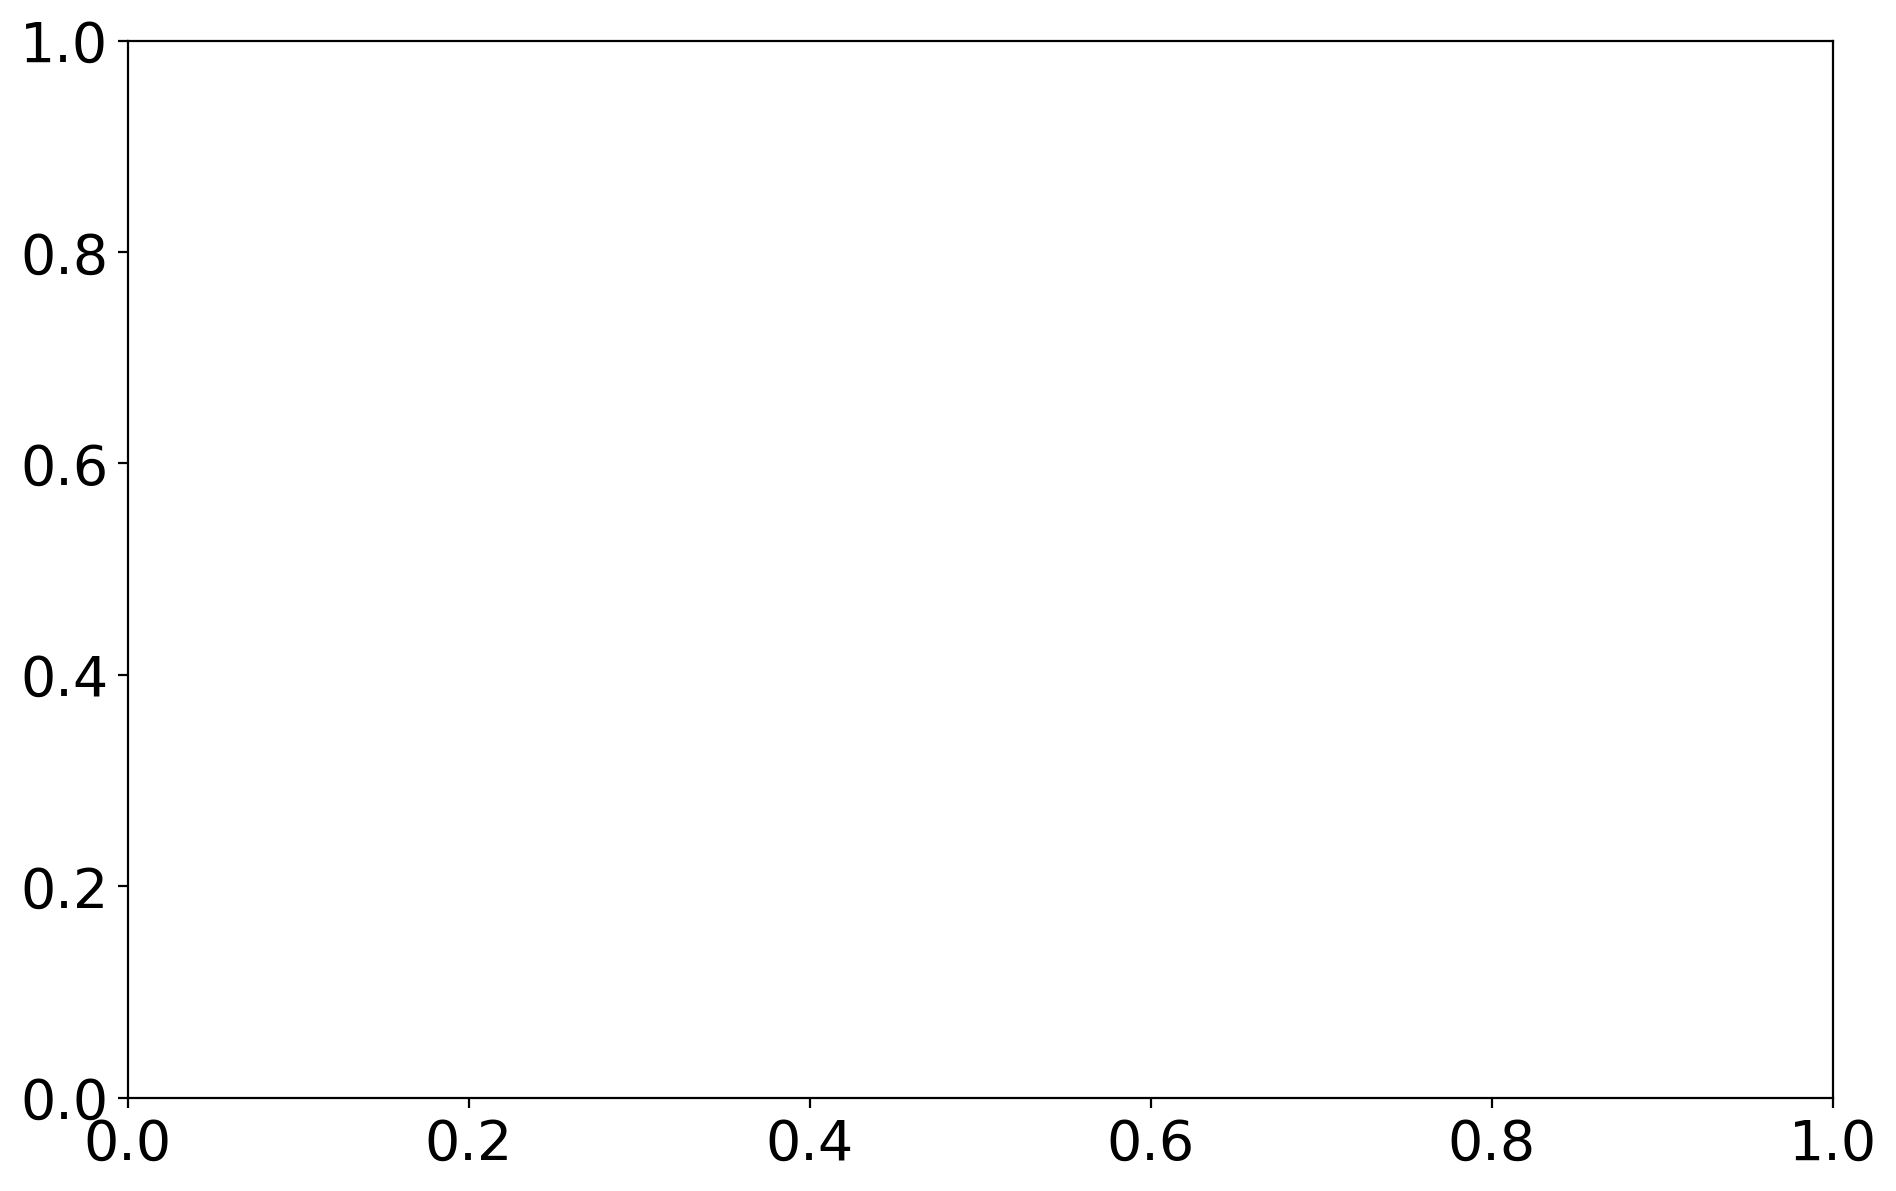

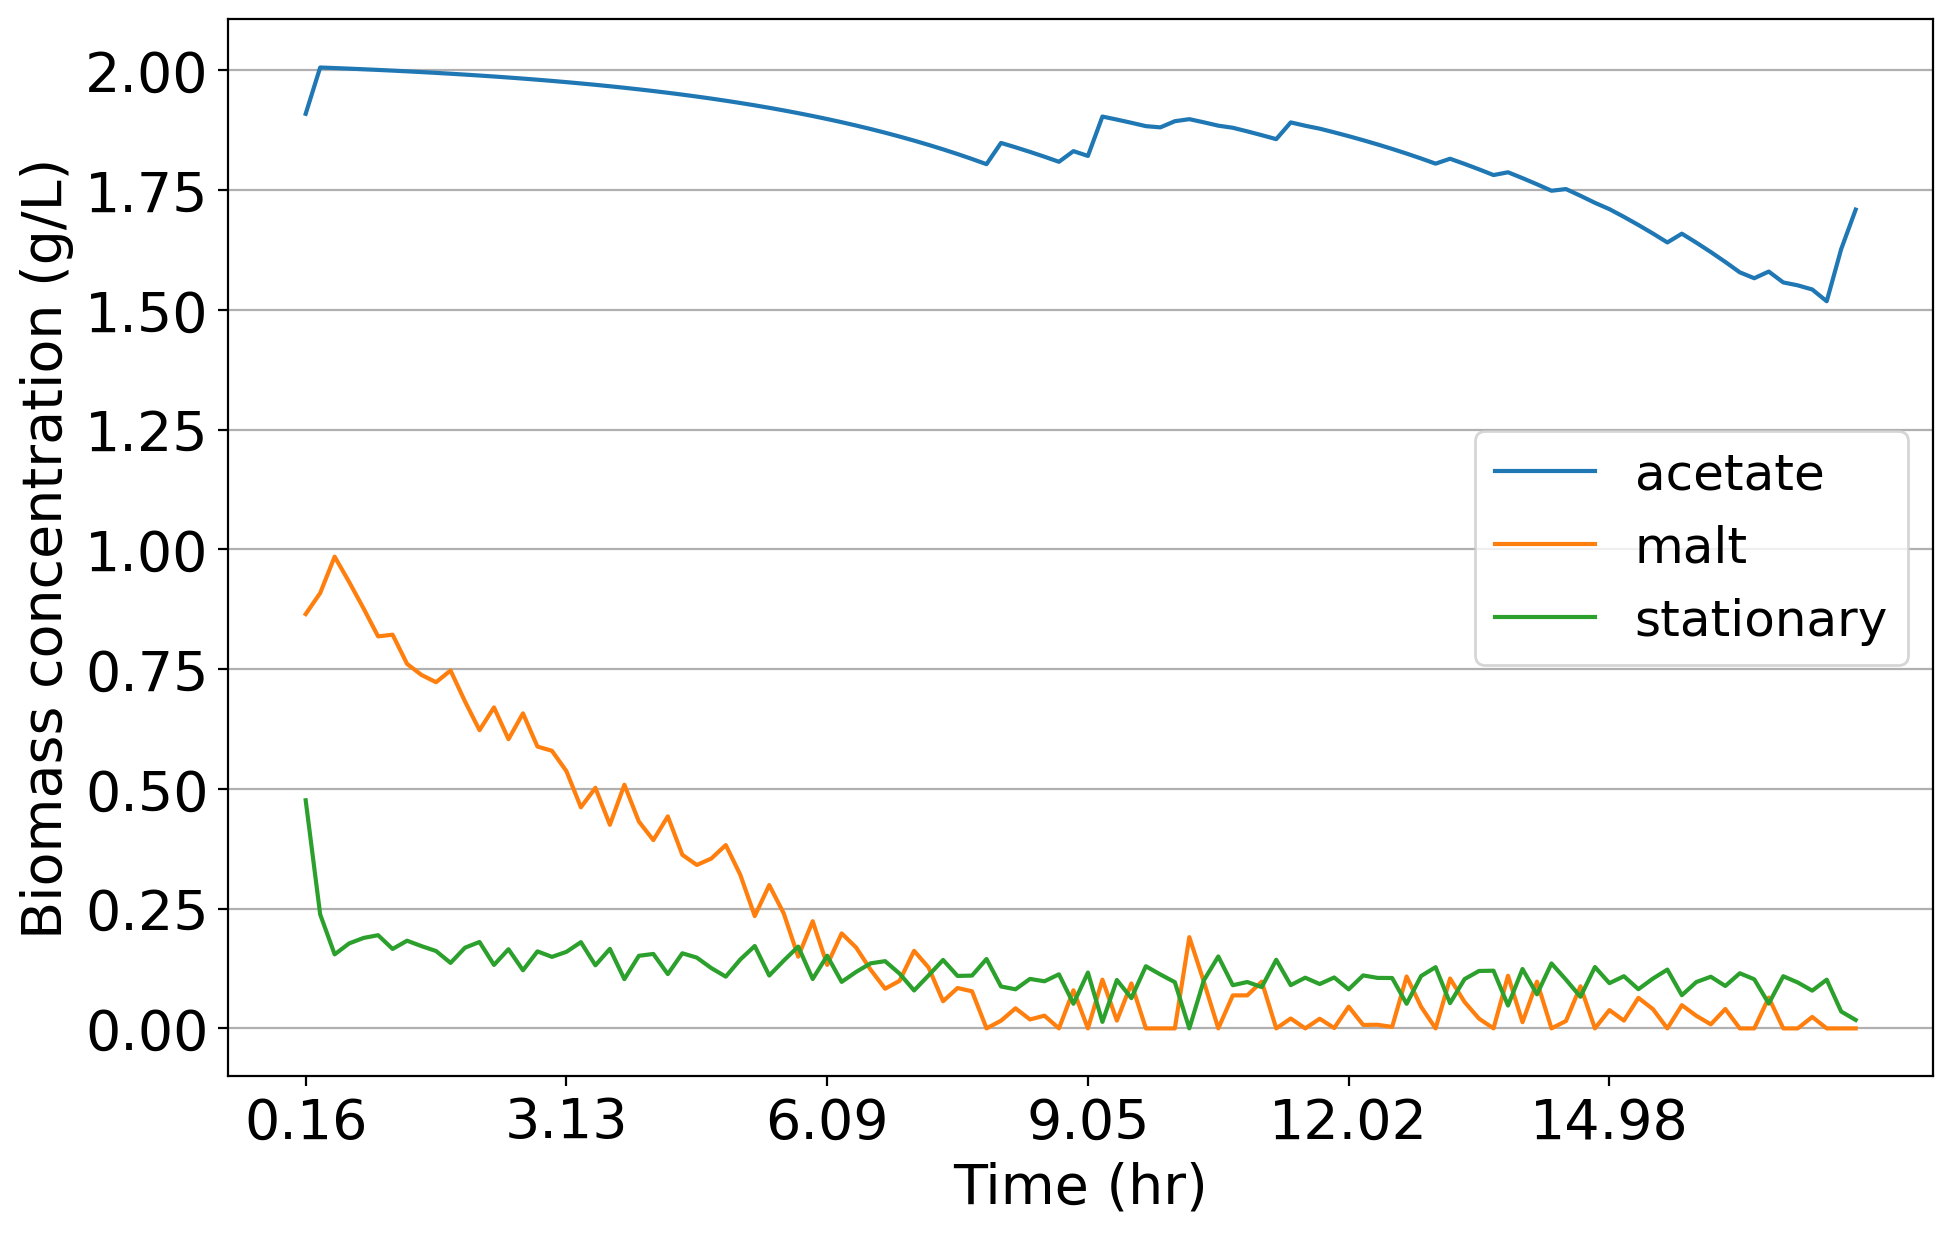

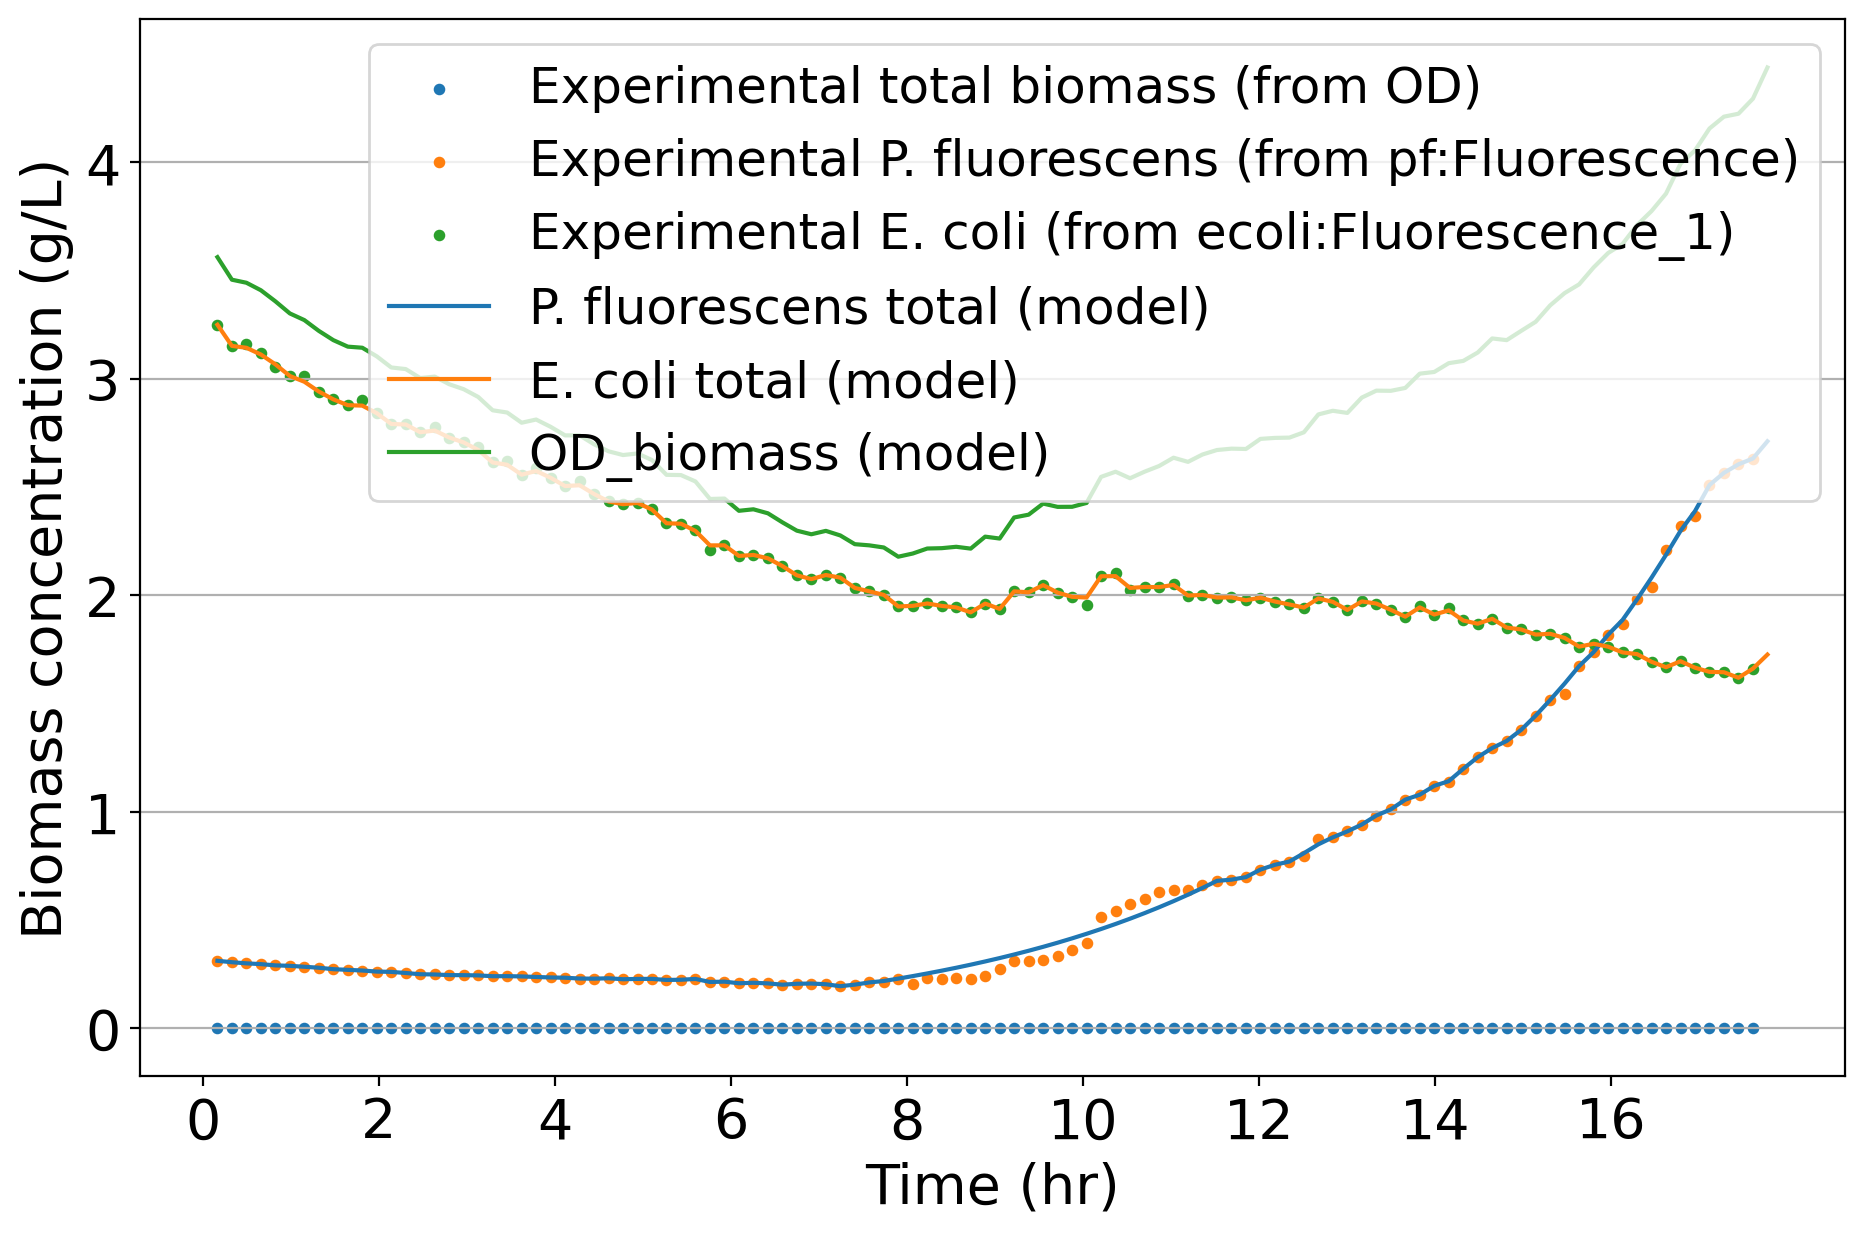

In [18]:
%run ../mscommfitting.py

acetate_commfit = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, growth_df, experimental_metadata)
acetate_commfit.fit(
    parameters={
        'v':.3,
        'cvmin': .1,
        'bcv': 0.0001,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00029"],
       graphs = update_graphs("G38", None), 
     rel_final_conc = {"cpd00029":0.2},
    msdb_path='../../../../ModelSEED/ModelSEEDDatabase',
    publishing=True,
    export_lp="acetate_coculture.lp")

#### Pseudomonas

In [19]:
%run ../data/standardized_data/datastandardization.py
growth_data_path="../data/Jeffs_data/PF-EC-PFEC on Acetate 6-17-22.xlsx"
time1 = process_time()
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, trial_name_conversion, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    community_members = {
        pf: {
            'name': 'pf',
            'phenotypes': {
                'acetate': {"consumed":["cpd00029"]}, # kbase_api.get_from_ws("93465/25/1"), #'93465/11/1'), 
                '4HB': {"consumed":["cpd00136"]} # kbase_api.get_from_ws('	93465/27/1')} #93465/15/1')}
                }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD', 'Fluorescence':'pf'},
    species_abundances = {num:{"ecoli":1, "pf":1} for num in range(1,13)},
    carbon_conc_series = {'columns': {'cpd00029': {2:100, 3: 50, 4: 25, 5: 12.5, 6: 6.25, 7: 3}}},
    ignore_trials = {'rows': ['C', 'E', 'B', 'F'], 'columns': [1,2,4,5,6,7,8,9,10,11,12]},
    species_identities_rows = {
        1:{"ecoli":"mRuby"},
        2:{"ecoli":"ACS"},
        3:{"pf":""},
        4:{"ecoli":"mRuby"},
        5:{"ecoli":"ACS"},
    },
    significant_deviation=None
)
print(f"{(process_time()-time1)/60} minutes")

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:112: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


The model GCF_001612705.1.RAST.mdl is unable to be simulated with pFBA and yields a < None (infeasible). > error.
The ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The [104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159] timesteps (with [0.52237614 0.51705334 0.50796007 0.50580504 0.50618839 0.5080599
 0.50908431 0.51173426 0.51083939 

Done with concentrations and biomass loops: 0.00026041666666666666 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0005208333333333333 min


C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:79: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.06432291666666666 min
Done exporting the content: 0.005729166666666666 min
graph_0
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'acetate', 'malt', 'stationary', '4HB'},
 'species': ['pf', 'ecoli'],
 'trial': 'G26'}
graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00179'],
 'trial': 'G26'}
graph_2
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'acetate', 'malt', 'stationary'},
 'species': ['ecoli'],
 'trial': 'G26'}
graph_3
{'content': 'total_biomass',
 'experimental_data': True,
 'species': ['pf', 'ecoli'],
 'trial': 'G26'}


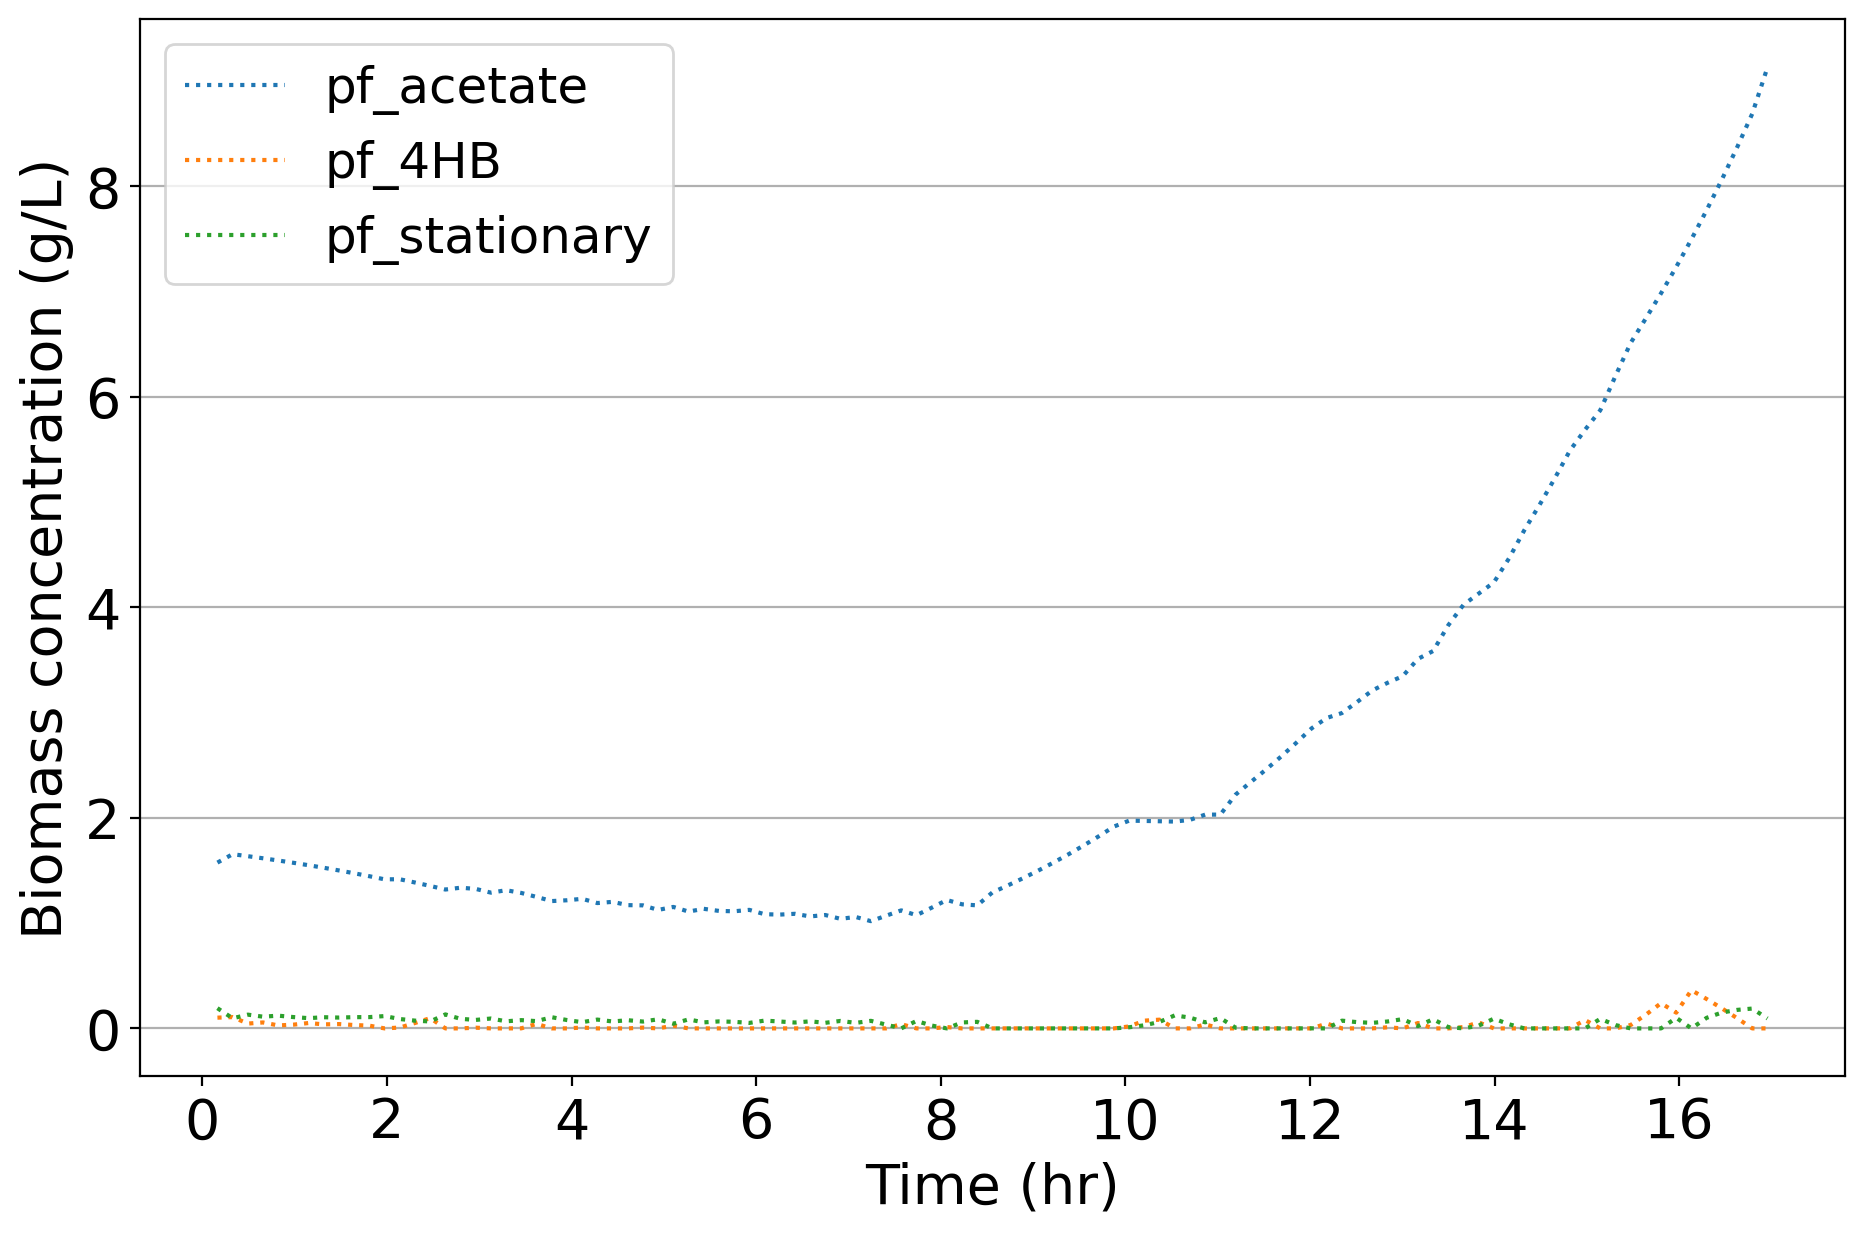

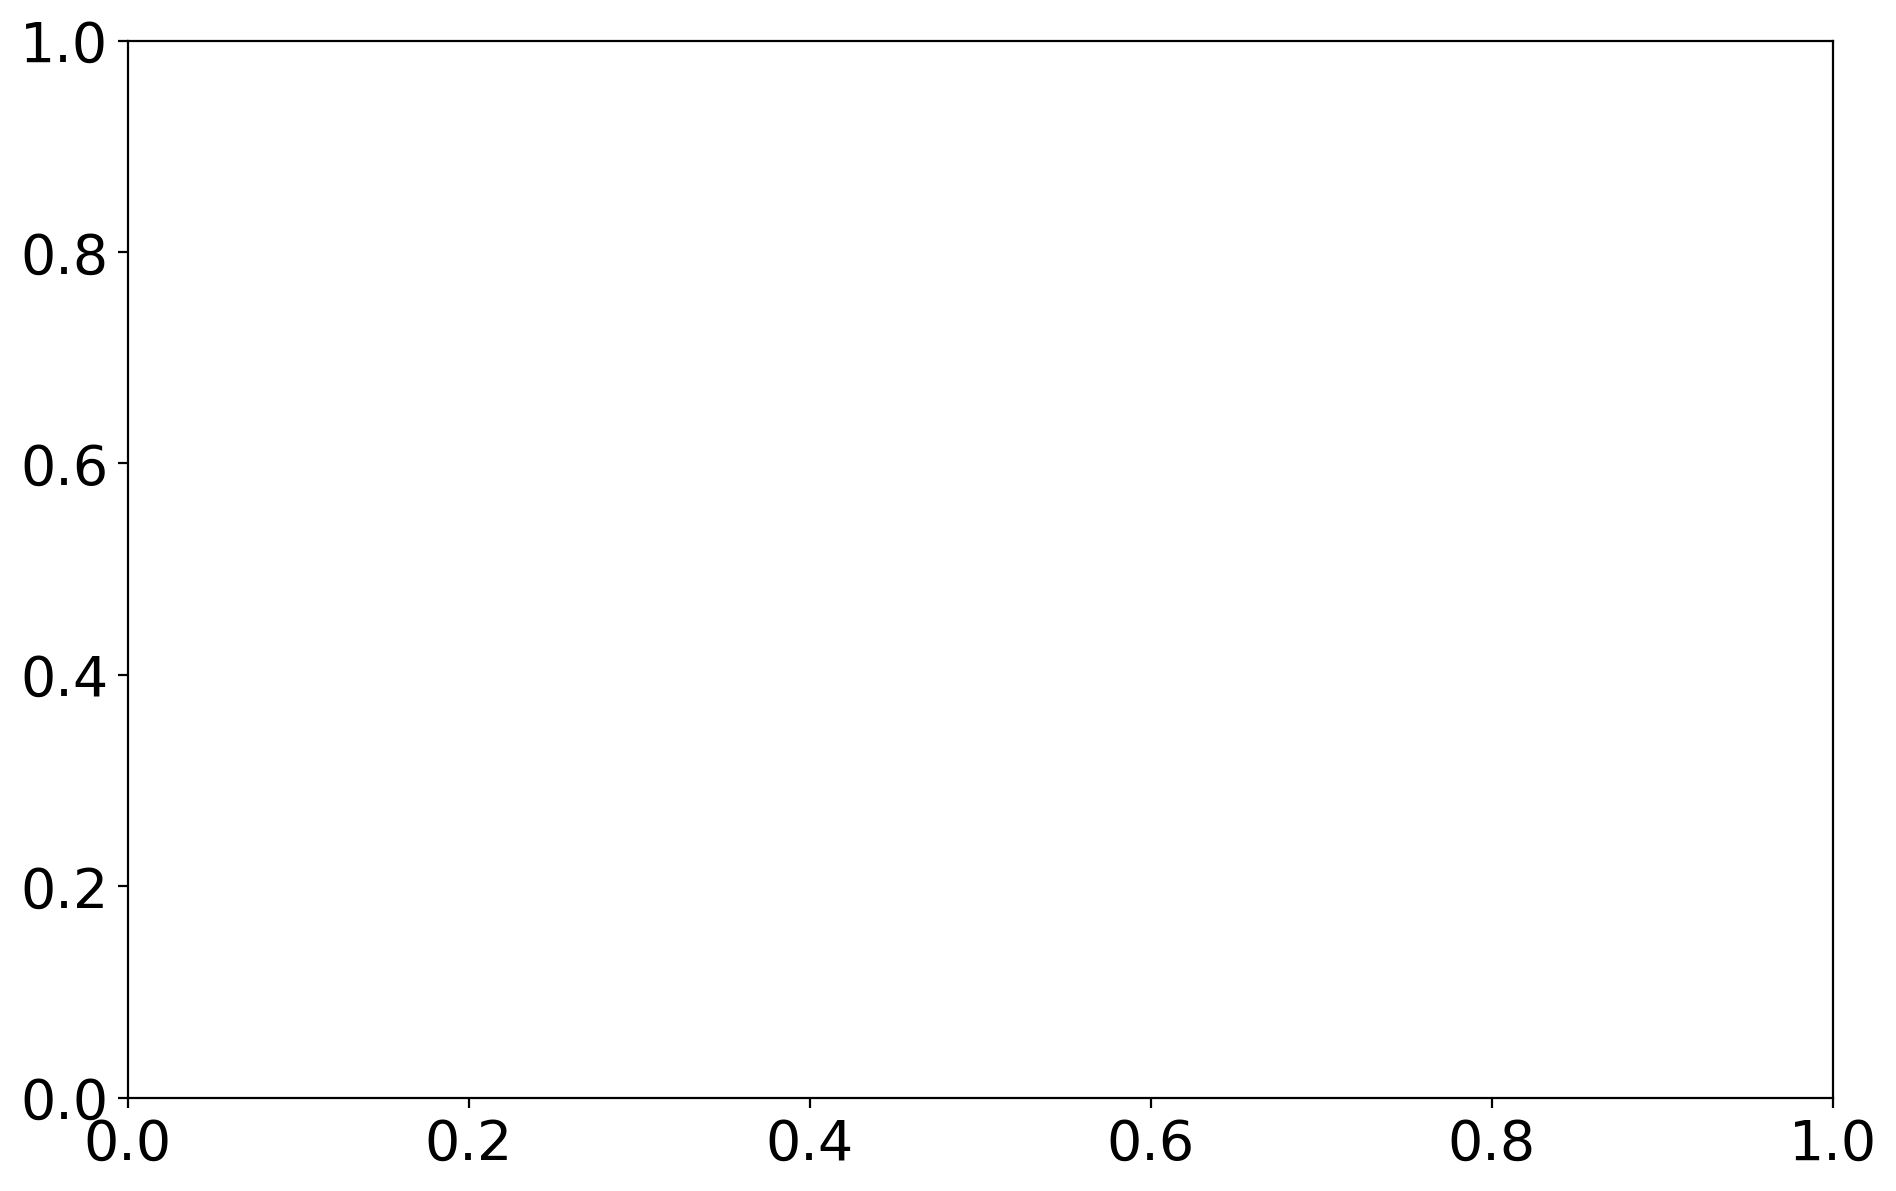

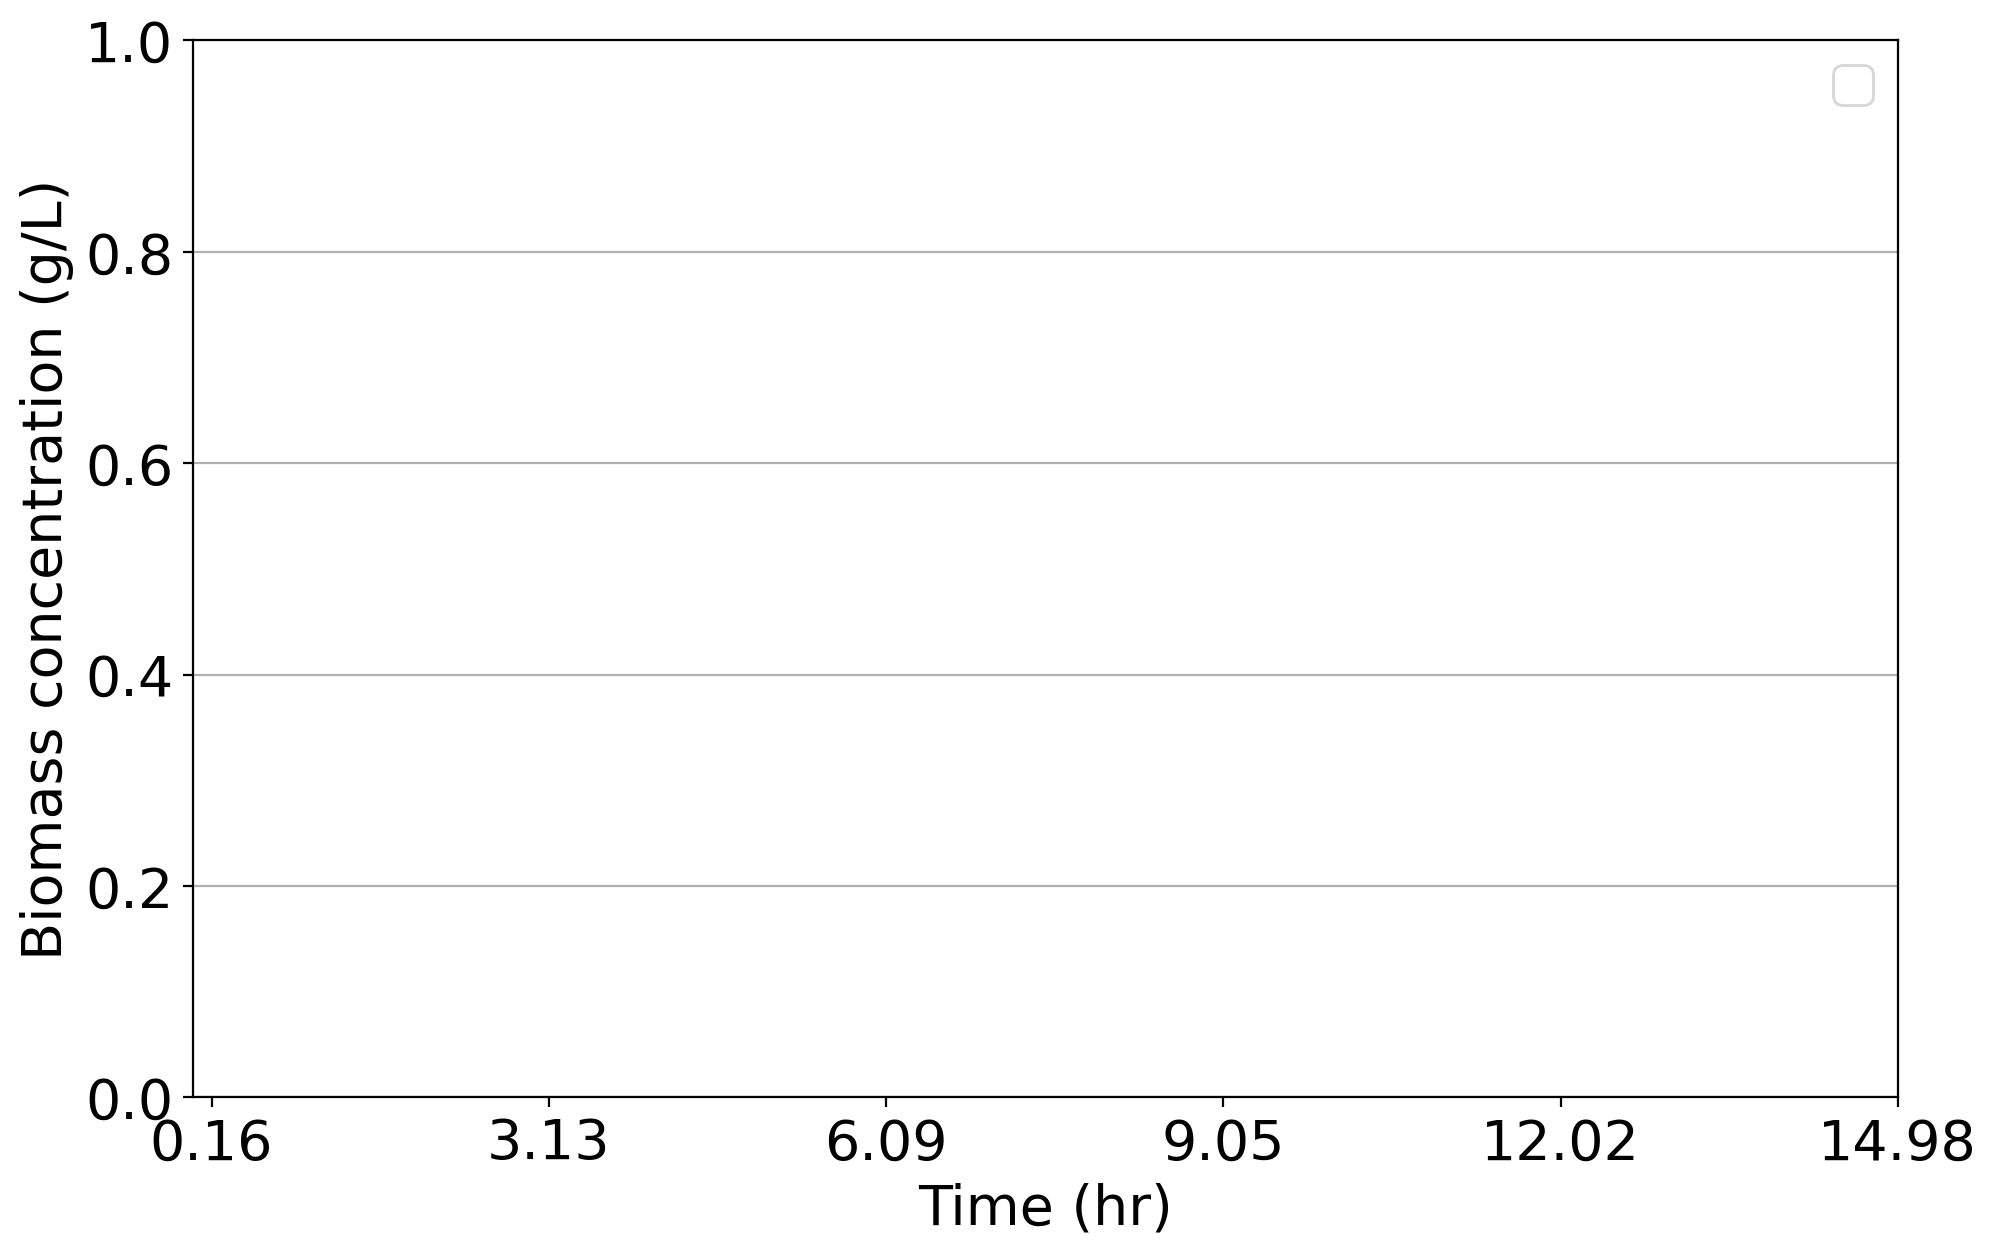

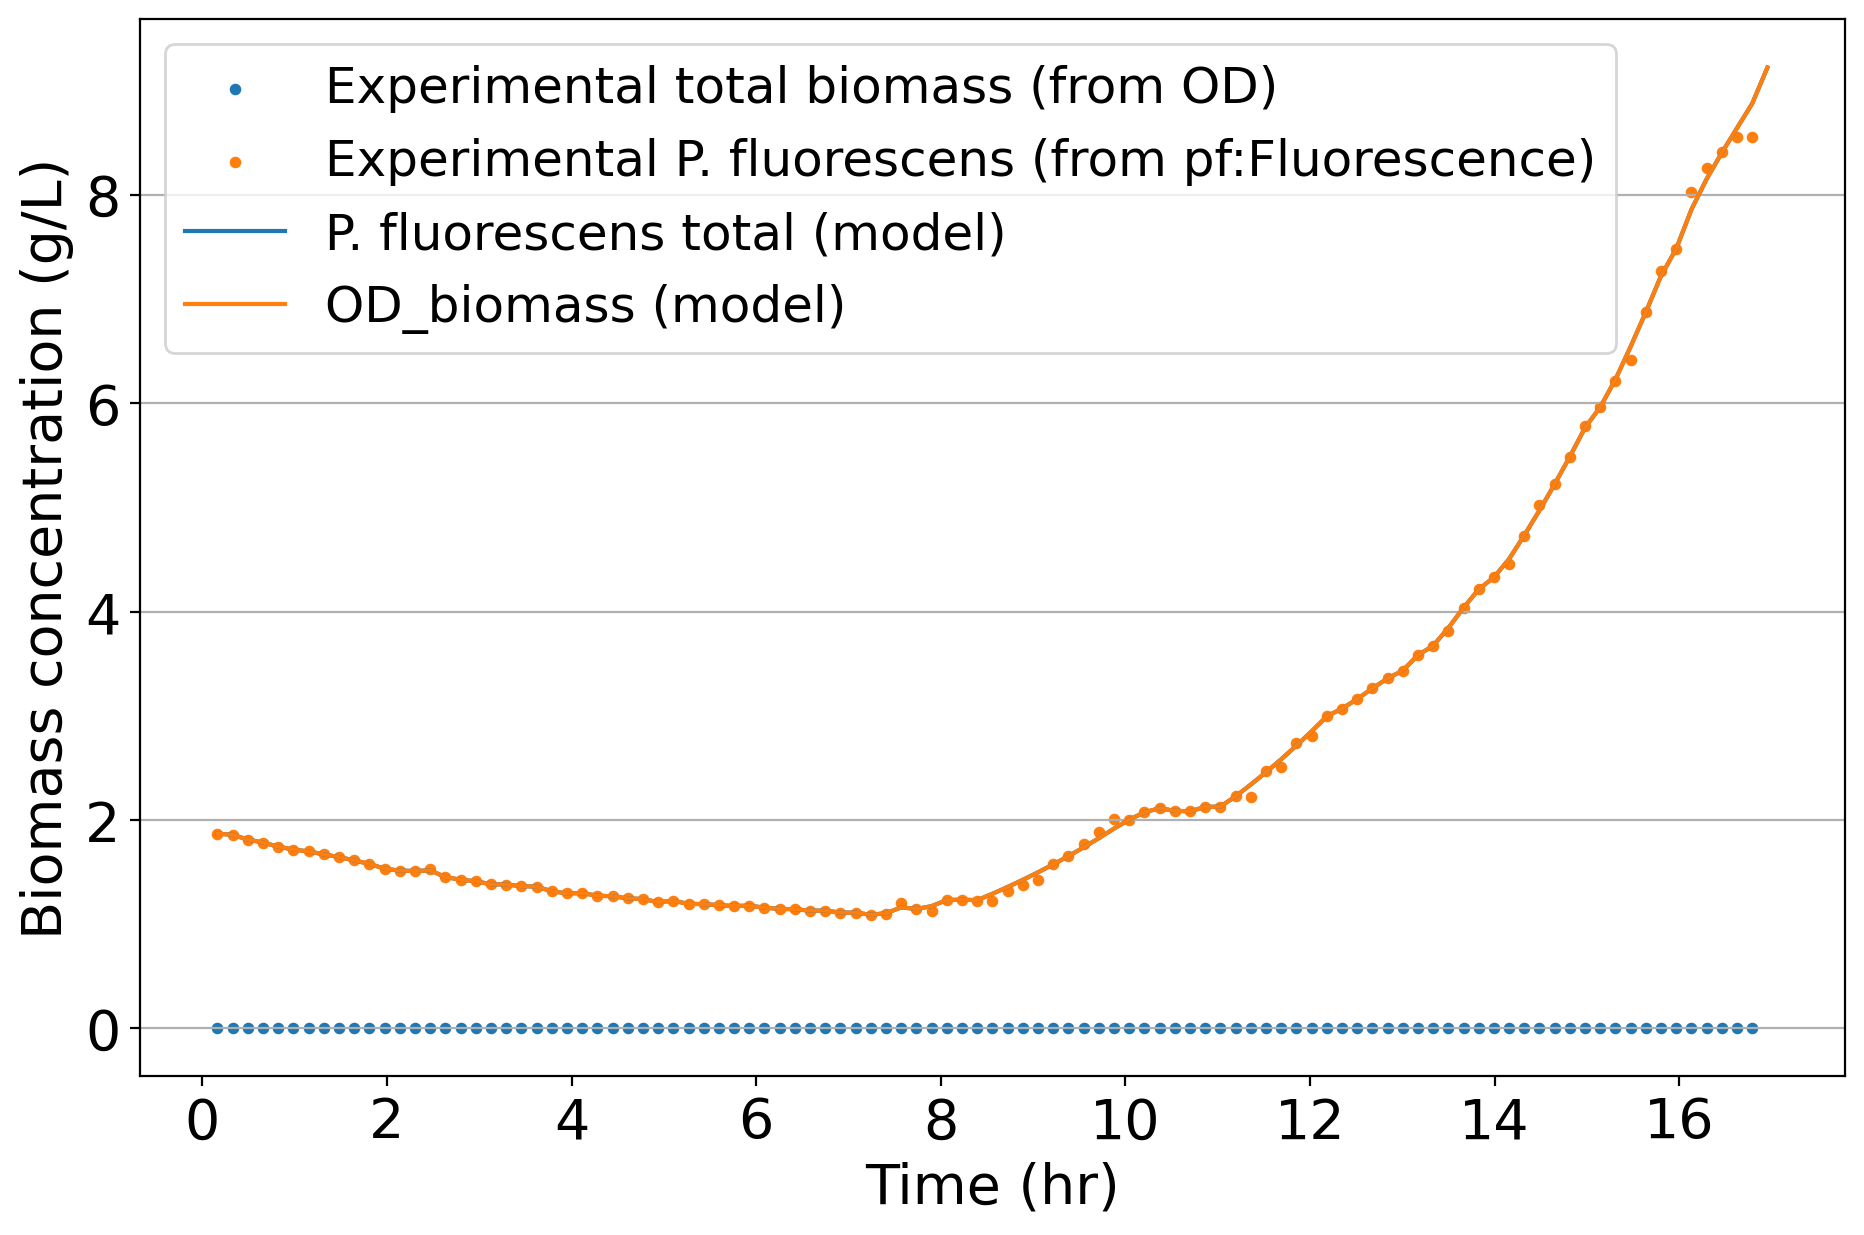

In [20]:
%run ../mscommfitting.py

acetate_commfit = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, growth_df, experimental_metadata)
acetate_commfit.fit(
    parameters={
        'v':.3,
        'cvmin': .1,
        'bcv': 0.0001,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00029"],
       graphs = update_graphs("G26", None), 
     rel_final_conc = {"cpd00029":0.2},
    msdb_path='../../../../ModelSEED/ModelSEEDDatabase',
    publishing=True,
    export_lp="acetate_pf.lp")

#### E. coli

In [21]:
%run ../data/standardized_data/datastandardization.py
growth_data_path="../data/Jeffs_data/PF-EC-PFEC on Acetate 6-17-22.xlsx"
time1 = process_time()
experimental_metadata, growth_df, fluxes_df, standardized_carbon_conc, trial_name_conversion, data_timestep_hr, simulation_timestep, media_conc = GrowthData.process(
    community_members = {
        ecoli: {
            'name': 'ecoli', 
            'phenotypes': {
                'acetate': {"consumed":["cpd00029"]}, #kbase_api.get_from_ws('93465/13/1'), 
                'malt': {"consumed":["cpd00179"],
                         "excreted":["cpd00029"]} #kbase_api.get_from_ws("93465/23/1")} #'93465/9/1')}   # !!! The phenotype name must align with the experimental IDs for the graphs to find the appropriate data
                }
        }
    },
    data_paths = {'path':growth_data_path, 'Raw OD(590)':'OD','Fluorescence 1':'ecoli'},
    species_abundances = {num:{"ecoli":1, "pf":1} for num in range(1,13)},
    carbon_conc_series = {'columns': {'cpd00029': {2:100, 3: 50, 4: 25, 5: 12.5, 6: 6.25, 7: 3}}},
    ignore_trials = {'rows': ['C', 'E', 'D', 'F'], 'columns': [1,2,4,5,6,7,8,9,10,11,12]},
    species_identities_rows = {
        1:{"ecoli":"mRuby"},
        2:{"ecoli":"ACS"},
        3:{"pf":""},
        4:{"ecoli":"mRuby"},
        5:{"ecoli":"ACS"},
    },
    significant_deviation=None
)
print(f"{(process_time()-time1)/60} minutes")

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\data\standardized_data\datastandardization.py:112: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


The ['B2', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements per the ignore_trials parameter.
The ['B2', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the ecoli measurements per the ignore_trials parameter.
0.10208333333333333 minutes

C:\Users\Andrew Freiburger\Documents\Argonne\ProjectNotebooks\CommunityModeling\CommFitting\mscommfitting.py:79: DeprecationWarning: invalid escape sequence \_
  met_id = re.sub('(\_\w\d+)', '', met)


Done with concentrations and biomass loops: 0.0005208333333333333 min
Done with DCC loop: 0.0 min
Done with the dbc & diffc loop: 0.0015625 min
Solver: <class 'optlang.glpk_interface.Model'>
Done with loading the variables, constraints, and objective: 0.04895833333333333 min
Done exporting the content: 0.009114583333333334 min
graph_0
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'acetate', 'malt', 'stationary', '4HB'},
 'species': ['pf', 'ecoli'],
 'trial': 'G2'}
graph_1
{'content': 'conc',
 'experimental_data': False,
 'mets': ['cpd00179'],
 'trial': 'G2'}
graph_2
{'content': 'biomass',
 'experimental_data': False,
 'phenotype': {'acetate', 'malt', 'stationary'},
 'species': ['ecoli'],
 'trial': 'G2'}
graph_3
{'content': 'total_biomass',
 'experimental_data': True,
 'species': ['pf', 'ecoli'],
 'trial': 'G2'}


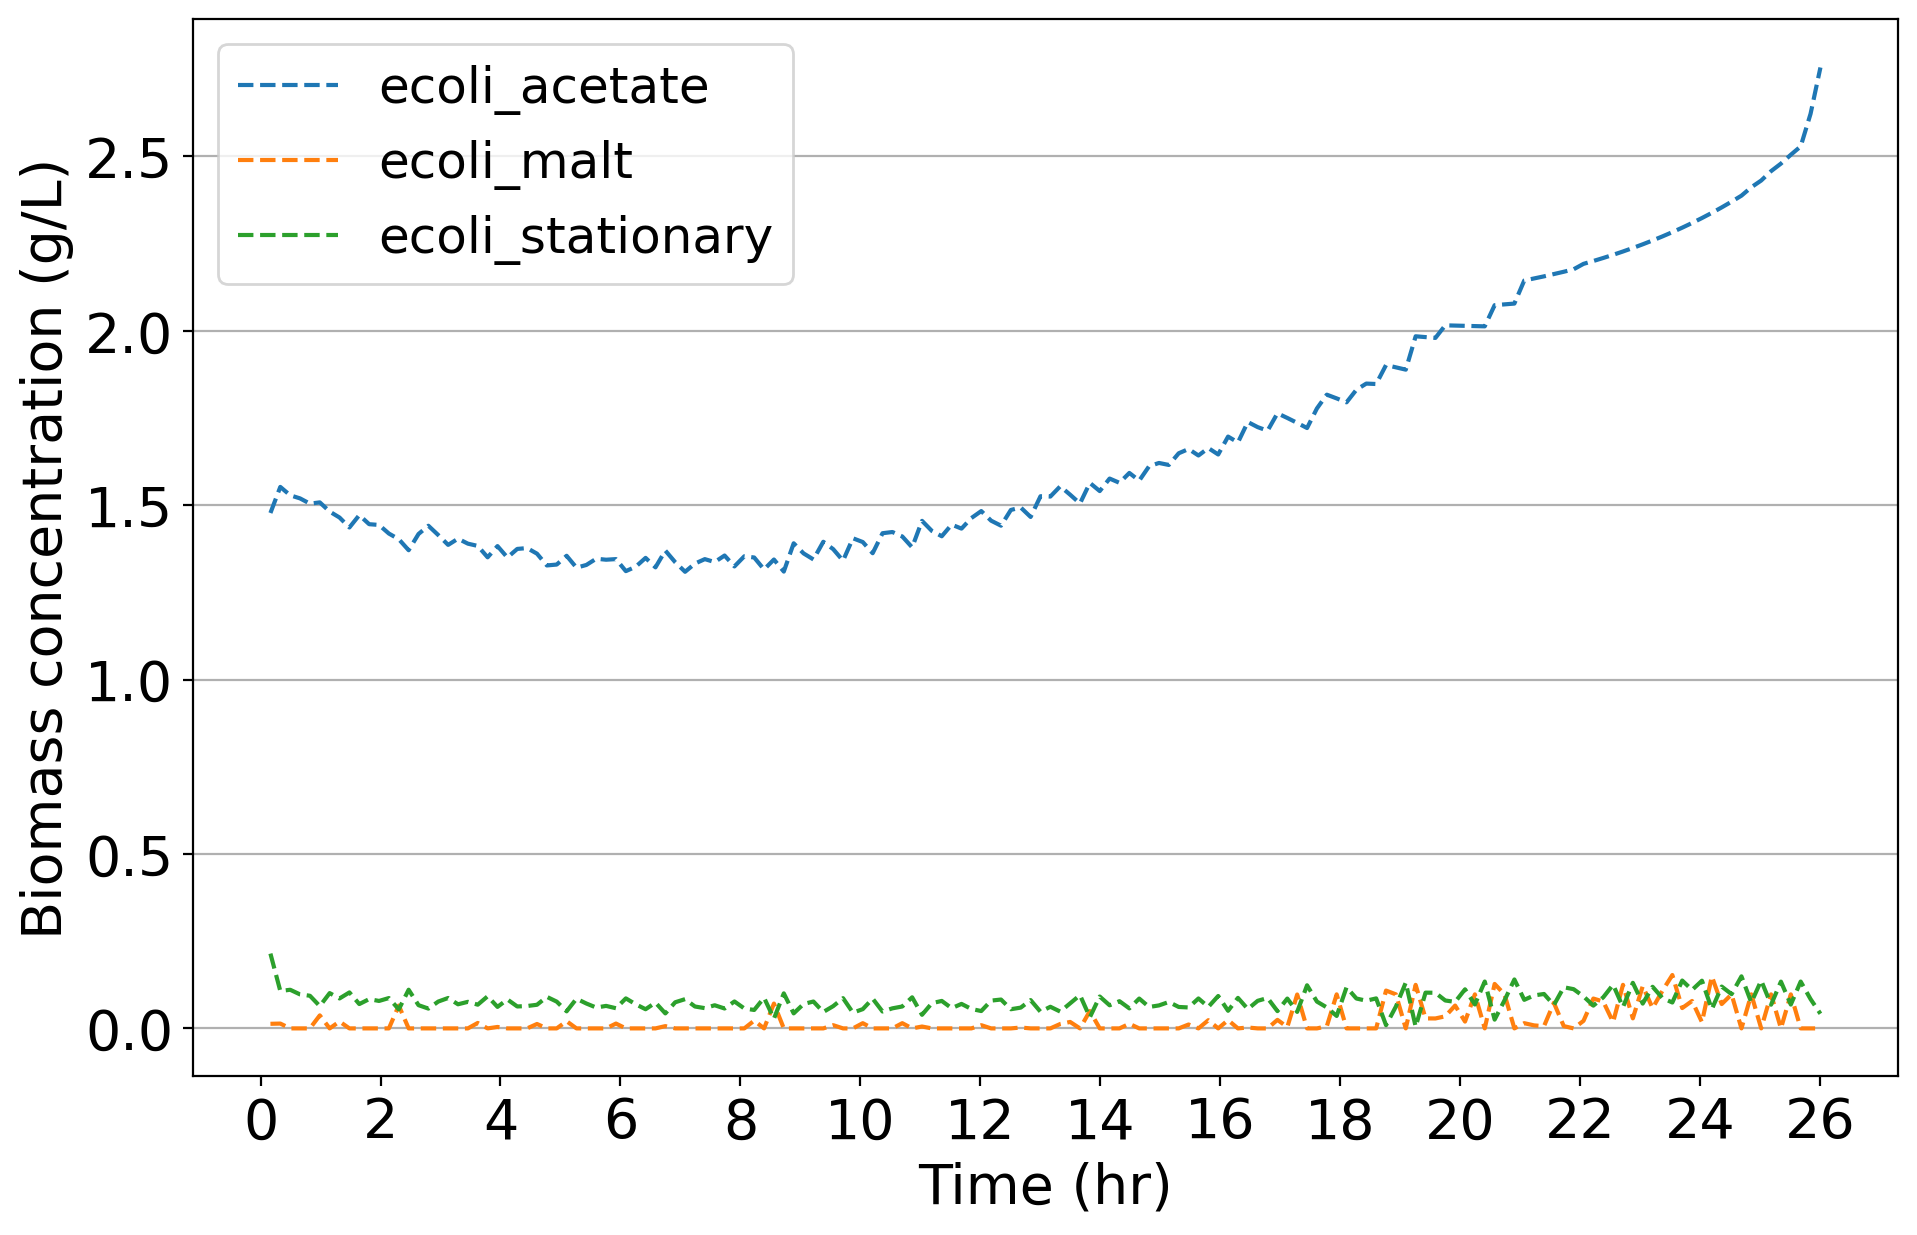

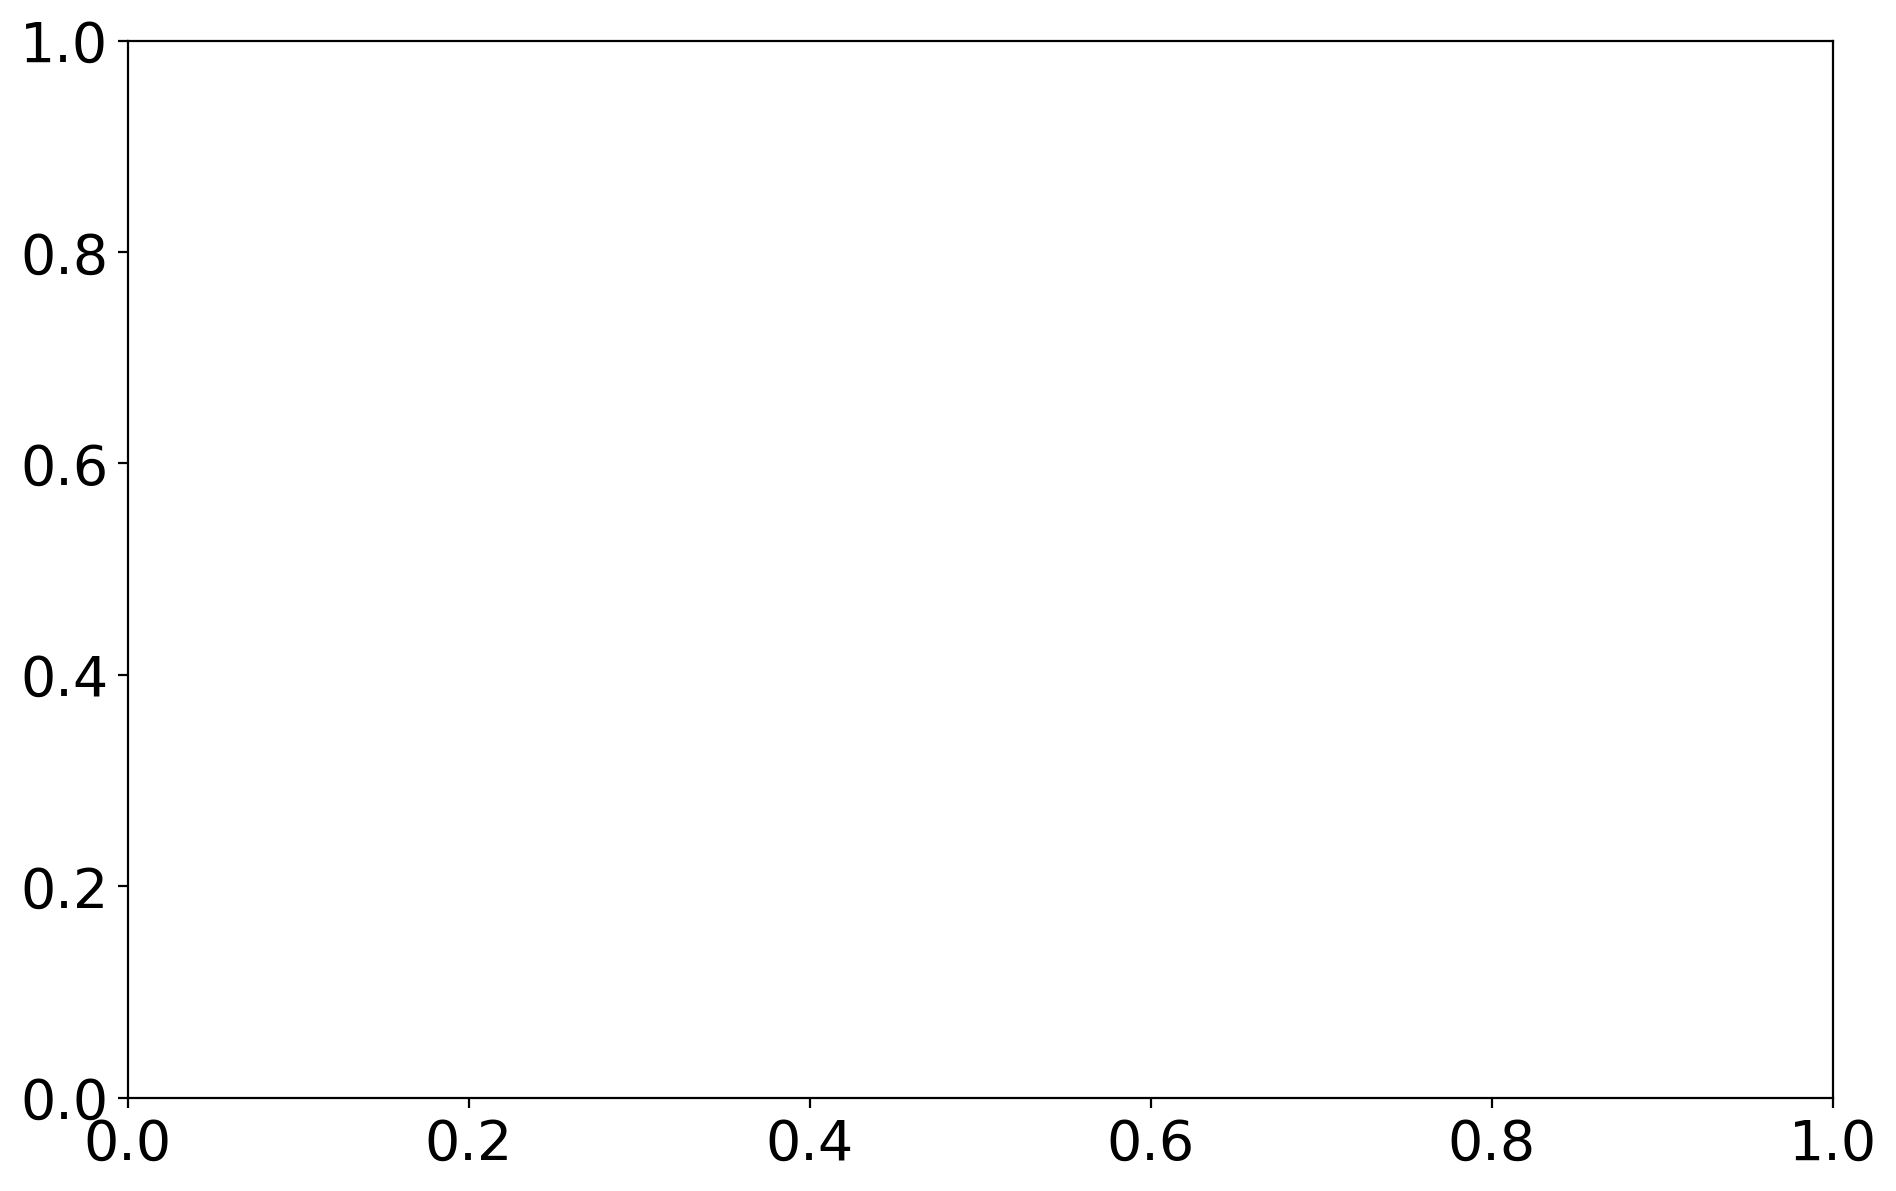

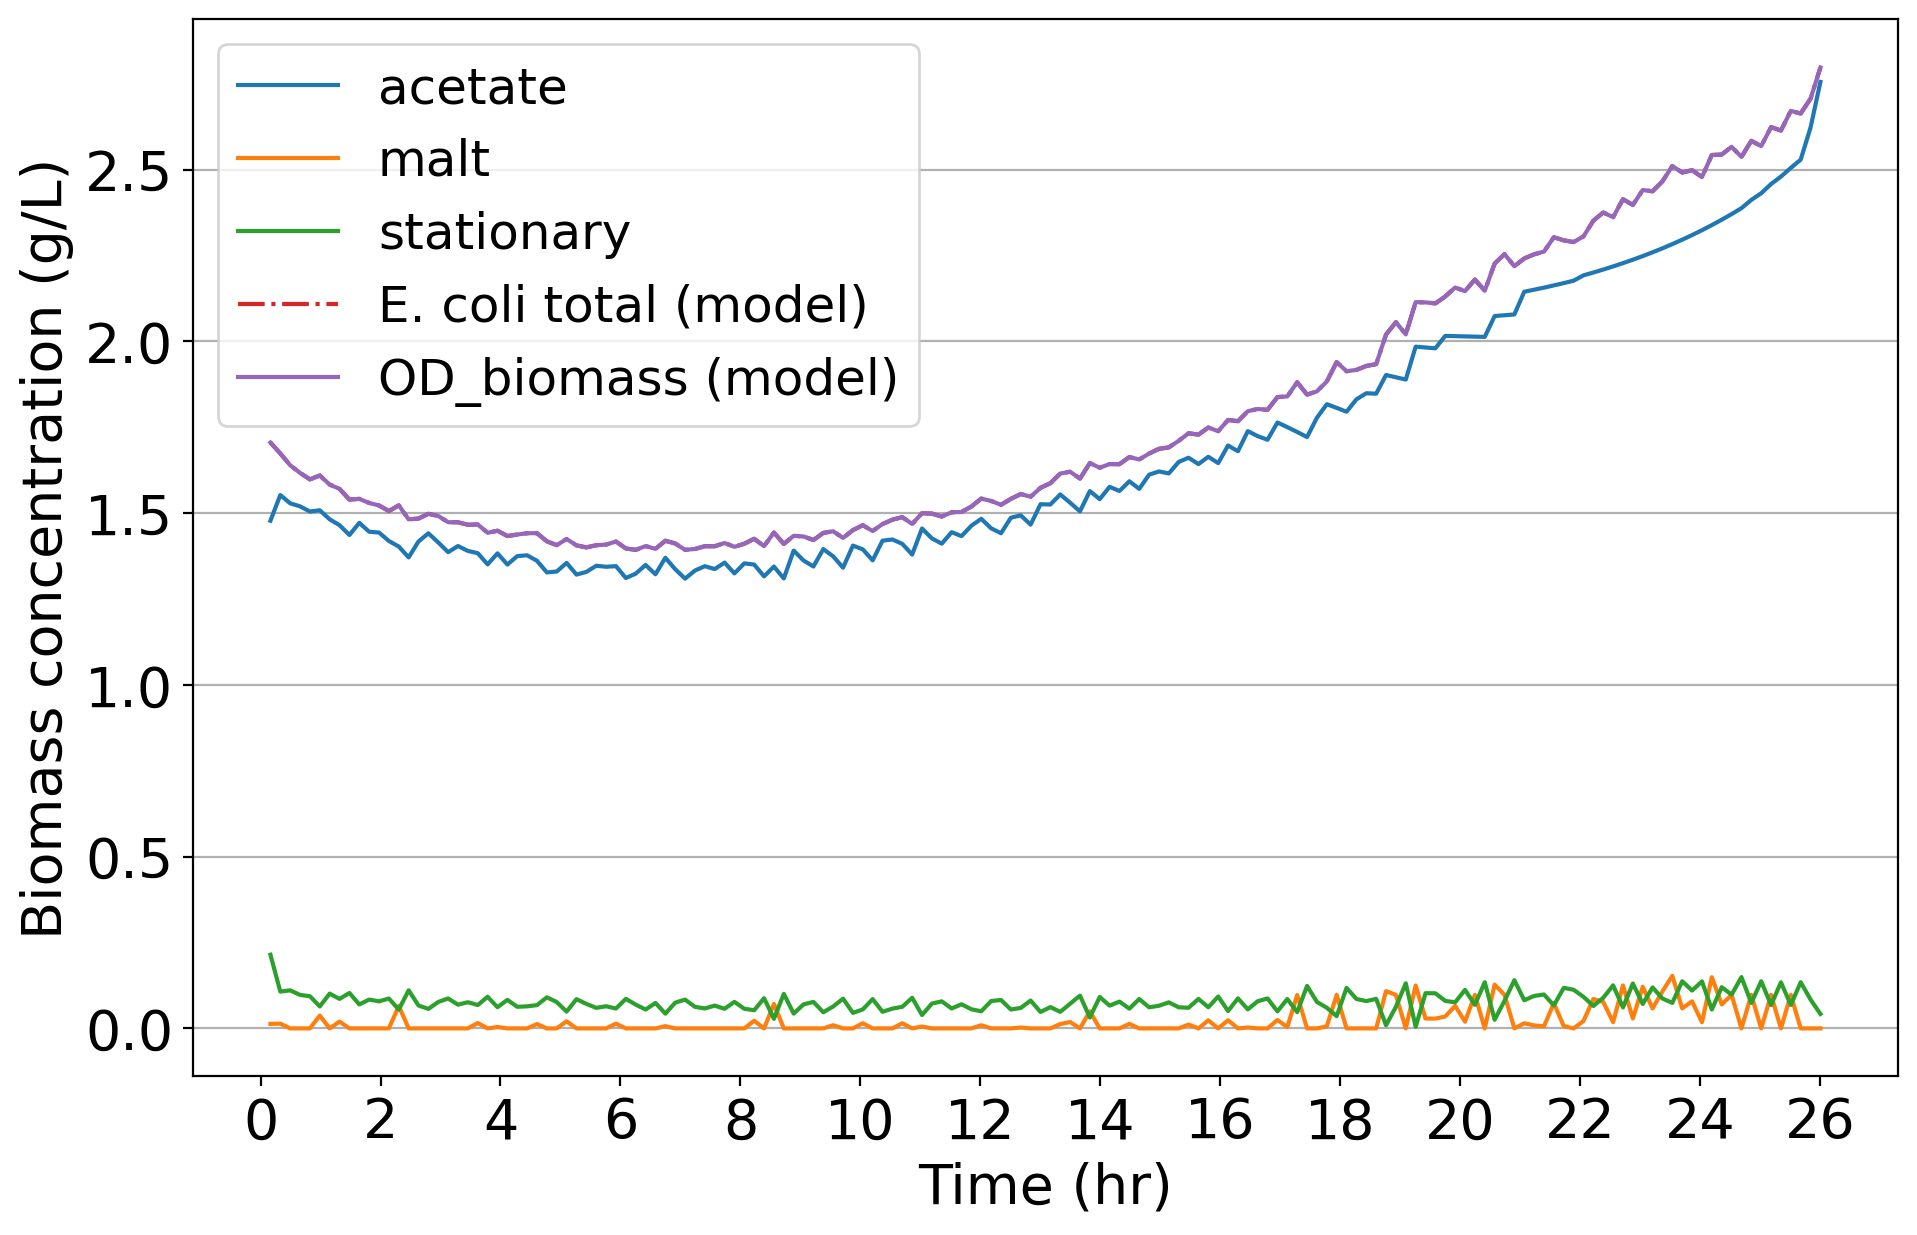

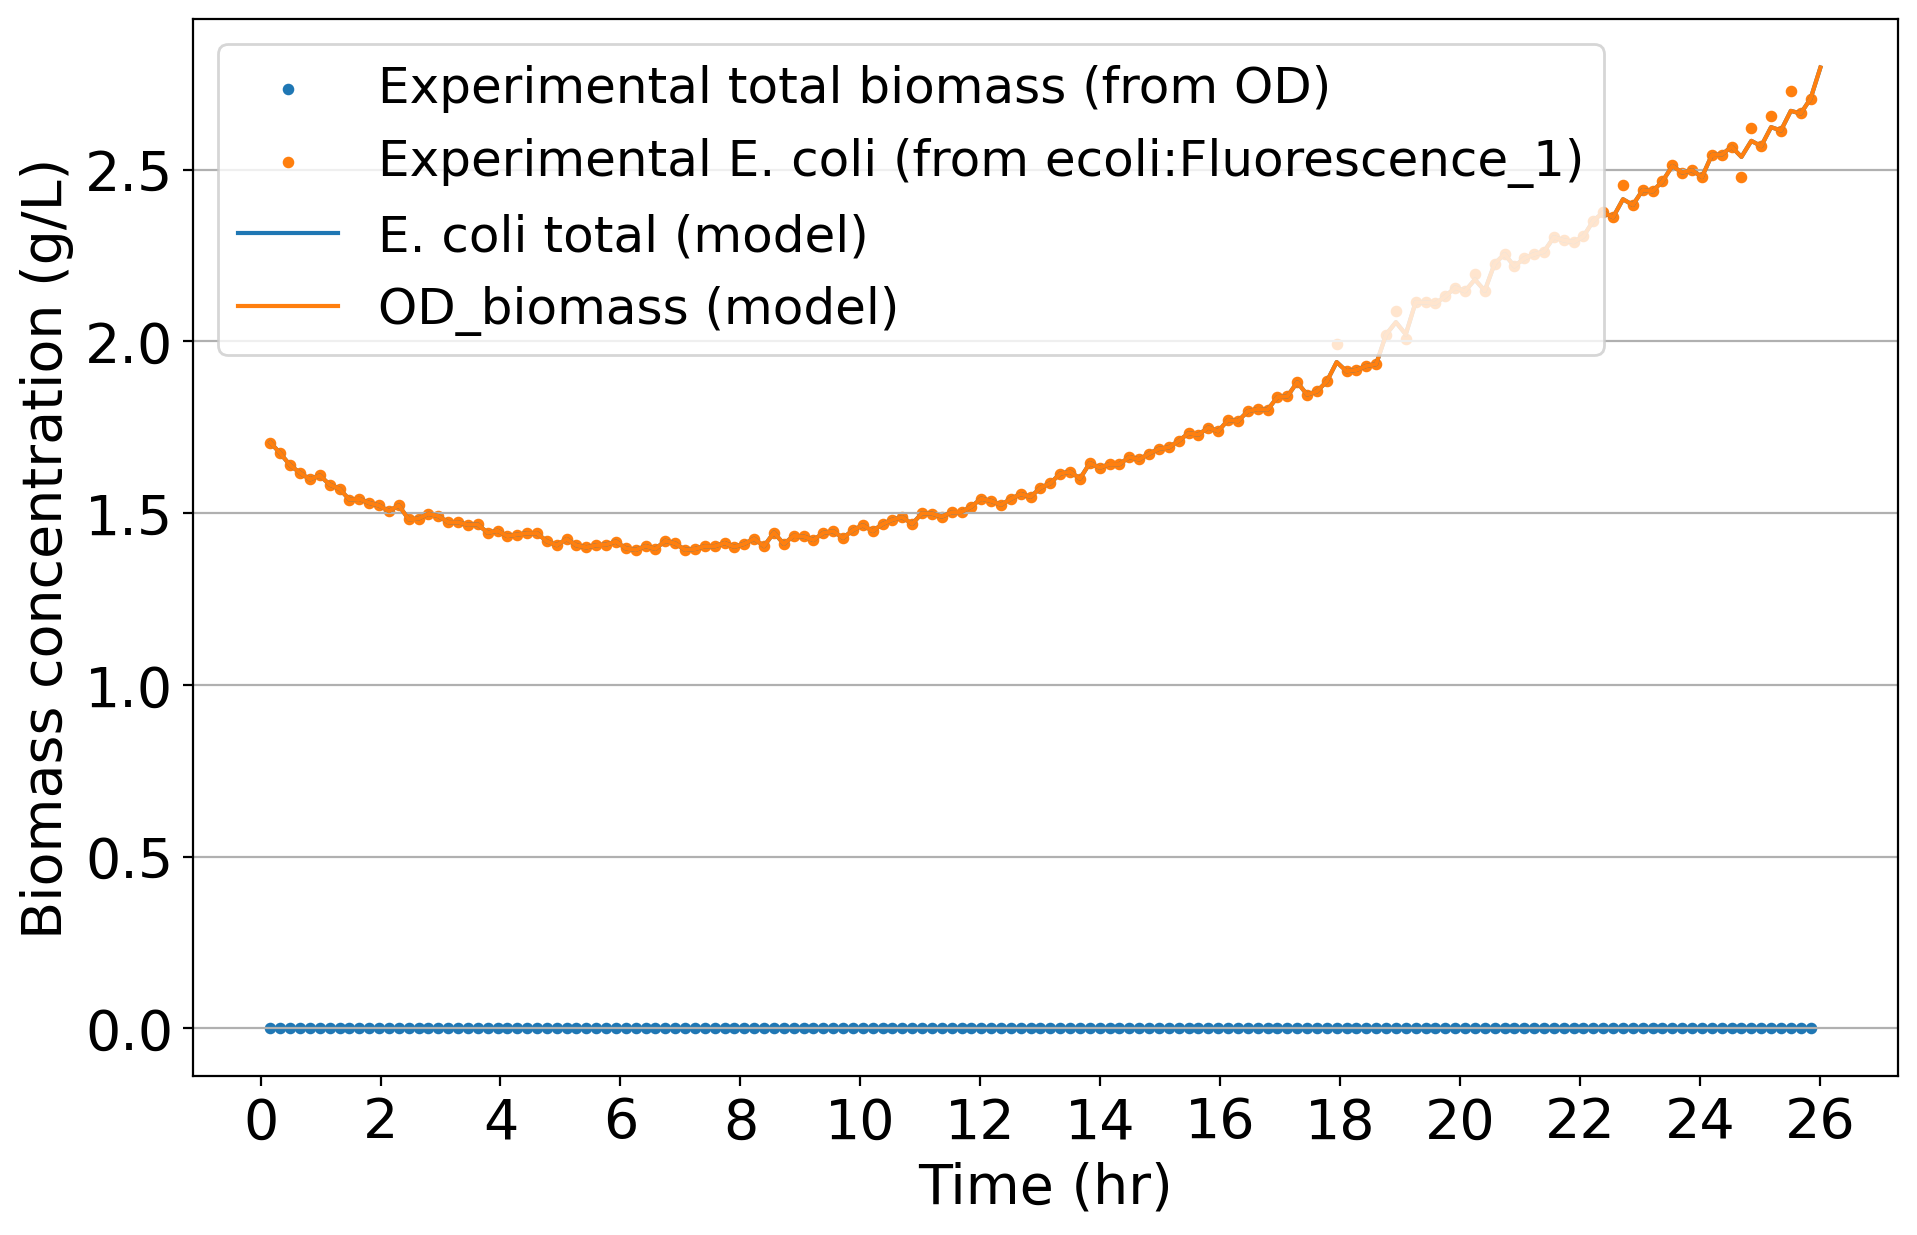

In [22]:
%run ../mscommfitting.py

acetate_commfit = CommPhitting(fluxes_df, standardized_carbon_conc, media_conc, growth_df, experimental_metadata)
acetate_commfit.fit(
    parameters={
        'v':.3,
        'cvmin': .1,
        'bcv': 0.0001,
        'diffpos': 100,
        'diffneg': 100
        }, 
     mets_to_track = ["cpd00029"],
       graphs = update_graphs("G2", None), 
     rel_final_conc = {"cpd00029":0.2},
    msdb_path='../../../../ModelSEED/ModelSEEDDatabase',
    publishing=True,
    export_lp="acetate_ecoli.lp")

# SteadyCom

In [ ]:
# import the models
from cobra.io import load_json_model
ecoli = load_json_model("../ecoli.json")
pf = load_json_model("../pf.json")

In [ ]:
%run ../../../../ModelSEED/ModelSEEDpy/modelseedpy/community/mssteadycom.py
